# Regression on the tabular data. 
### General Machine Learning

You have a dataset (train.csv) that contains 53 anonymized features and a target column. Your task is to build a model that predicts a target based on the proposed features. Please provide predictions for the hidden_test.csv file. Target metric is RMSE. The main goal is to provide github repository that contains:

- ● jupyter notebook with exploratory data analysis;
- ● train.py python script for model training;
- ● predict.py python script for model inference on test data;
- ● file with prediction results;
- ● readme file that contains instructions about project setup and general guidance
around project;
- ● requirements.txt file.

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# параметри виведення
pd.set_option("display.max_columns", 500)  # кількість колонок
pd.set_option("display.max_rows", 1000)  # кількість рядків
pd.set_option("display.max_colwidth", 300)  # ширина колонок
pd.set_option("display.precision", 7)  # кількість знаків після коми

# вимикаємо зайві попередження
import warnings

warnings.filterwarnings("ignore")

# друк всіх результатів в одній комірці а не тільки останнього
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.describe()

0             1             2             3             4  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.423944    250.236267    248.637289    249.736600    249.436178   
std      144.336393    144.022200    144.107577    144.284945    143.941581   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      125.000000    126.000000    124.000000    125.000000    125.000000   
50%      250.000000    251.000000    248.000000    250.000000    250.000000   
75%      374.000000    375.000000    374.000000    375.000000    373.000000   
max      499.000000    499.000000    499.000000    499.000000    499.000000   

                  5             6             7             8             9  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean     249.656167     -0.011402      0.498548      0.499189    249.842033   
std      144.329168      7.038171      0.288682      0.500002    144.612718   
min        0.000000     -9.949874      0.000014      0.000000      0.000000   
25%      124.000000     -7.071068      0.248932      0.000000    124.000000   
50%      250.000000      0.000000      0.497136      0.000000    250.000000   
75%      374.000000      7.000000      0.747513      1.000000    376.000000   
max      499.000000      9.949874      0.999987      1.000000    499.000000   

       ...            44            45            46            47  \
count  ...  90000.000000  90000.000000  90000.000000  90000.000000   
mean   ...      7.475155      7.523962      7.508397      7.473322   
std    ...      4.330410      4.321537      4.331761      4.335692   
min    ...      0.000019      0.000040      0.000154      0.000083   
25%    ...      3.707544      3.797002      3.760627      3.715721   
50%    ...      7.474127      7.533987      7.505259      7.459774   
75%    ...     11.216585     11.276349     11.261971     11.215637   
max    ...     14.999900     14.999528     14.999733     14.999478   

                 48            49            50            51            52  \
count  90000.000000  90000.000000  90000.000000  90000.000000  90000.000000   
mean       7.490658      7.474578      7.509206      7.487159      7.513316   
std        4.332122      4.323035      4.326364      4.324876      4.333080   
min        0.000367      0.000014      0.000160      0.000147      0.000125   
25%        3.739358      3.715298      3.773381      3.743536      3.776322   
50%        7.494167      7.477270      7.512575      7.476564      7.506812   
75%       11.239232     11.210070     11.268156     11.234414     11.277835   
max       14.999869     14.999928     14.999948     14.999364     14.999775   

             target  
count  90000.000000  
mean      50.033981  
std       28.897243  
min        0.002634  
25%       25.091903  
50%       50.030705  
75%       75.059454  
max       99.999482  

[8 rows x 54 columns]

In [7]:
# вывести типы колонок
df.dtypes

0           int64
1           int64
2           int64
3           int64
4           int64
5           int64
6         float64
7         float64
8           int64
9           int64
10          int64
11          int64
12          int64
13        float64
14        float64
15        float64
16        float64
17        float64
18        float64
19        float64
20        float64
21        float64
22        float64
23        float64
24        float64
25        float64
26        float64
27        float64
28        float64
29        float64
30        float64
31        float64
32        float64
33        float64
34        float64
35        float64
36        float64
37        float64
38        float64
39        float64
40        float64
41        float64
42        float64
43        float64
44        float64
45        float64
46        float64
47        float64
48        float64
49        float64
50        float64
51        float64
52        float64
target    float64
dtype: object

In [66]:
df.head()

0    1    2    3    4    5          6          7  8    9   10   11   12  \
0  236  488   16  221  382   97 -4.4721360  0.1074717  0  132  281  336   99   
1  386  206  357  232    1  198  7.8102497  0.7637133  1  143  109  123  130   
2  429   49  481  111  111  146  8.6023253  0.6511620  1  430  488  138   80   
3  414  350  481  370  208  158  8.3066239  0.4246454  1  340  111   38  177   
4  318  359   20  218  317  301  8.1240384  0.7673039  1  212  141  417  343   

           13          14          15          16          17          18  \
0   3.8800981   1.7975024   3.2524755  12.1319808   3.0913607   5.6303189   
1  12.0997704  10.6705501  14.1371114   0.2170367   1.4268805   0.9166174   
2   2.9474787  12.6713521  13.2799176  13.1633384   9.0518259  11.6058218   
3   5.3682517   6.7659465   0.5444150   7.1755729  14.5150959   1.9017429   
4  14.5922184   6.4836288   9.1593127   5.0830463   8.7720150   7.6872420   

           19          20          21          22          23          24  \
0   4.4663729   2.5112034   5.9827240   4.5411593  12.7404763  12.6349291   
1   8.1682543   0.4323187   5.8722176  10.4014012  12.8433009   7.5299919   
2  11.0941610  10.4618128   9.8277134   2.2060194   9.9147890   4.4484817   
3   9.2312631   9.6008102  10.0588437   5.6800208   8.2384731   0.2727600   
4  11.1069262  13.9263581   0.9142952   1.4181236   4.5042233   6.1584747   

           25          26          27          28          29          30  \
0   4.0502939  11.8272453   3.5683207  13.4205371   8.2518067   2.2879004   
1  12.5253348   8.6553437   8.4995873   5.6025524   4.1877383  13.2059816   
2   8.8648100  10.8374757  14.1678724  13.4568567  14.8555112   7.5960950   
3  11.8927432   4.0305667  14.9467493   7.1216324   6.5075718  12.4626883   
4   1.7909234   7.0496144  14.4098075  11.6158374   5.6757904   9.1361457   

           31          32          33         34          35          36  \
0  14.8344300   0.0822532   2.9755609  5.2237527   1.2122867   7.3027966   
1   5.4326668  12.3792755  11.9384199  6.0572823   2.5812799  11.7854558   
2   4.9280327   2.4399299   6.7911648  8.7095356   1.3630868   4.9809751   
3  12.2225224   0.3185281   5.3503210  3.1433585  10.2918042  13.1051704   
4  10.6404318  14.0511216   2.2404173  3.2718279   5.0614551   3.6798801   

           37          38          39          40         41          42  \
0   7.0831492   3.6103499   7.7675118   7.8296573  8.3953561   1.5837112   
1   4.4455637  11.1413463   0.8397305   1.4819077  8.9206532   4.4503785   
2   2.1823719  14.6736145   8.0832893   6.6014722  6.7891999  12.9820347   
3  10.1590998   3.6714878  11.0871977   1.2890540  0.2493748   2.9671326   
4   2.9486154   6.4195765  14.8730997  14.8068868  9.9925449   3.7019589   

           43          44         45          46          47          48  \
0  10.1250197  13.3408737  0.8705417   1.9629370   7.4666662  11.5477942   
1  10.5848024  12.4848820  7.1686804   2.8854146  12.4139735  10.2604937   
2  10.2731140  14.0302570  0.3949701   8.1606247  12.5920594   8.9375767   
3   6.8851786   2.7895773  6.4167081  10.5498135  11.4564372   6.4680988   
4  11.1626855   1.8865604  1.9199986   2.2682032   0.1494207   4.1059074   

           49          50          51          52      target  
0   8.8229165   9.0464244   7.8955352  11.0106774  20.1074717  
1  10.0913505   9.2708885   3.1739939  13.9218712  61.7637133  
2   2.2651906  11.2557207  12.7948408  12.0809505  74.6511620  
3   2.5190494   0.2582838   9.3176961   5.3830975  69.4246454  
4  10.4162912   6.8162172   8.5869596   4.5124188  66.7673039

In [67]:
df.shape

(90000, 54)

In [85]:
# для каждой фичи df статистика количества уникальных значений

for f in df.columns:
    #если фича int 
         # вывести название фичи и количество уникальных значений
    print(f, df[f].nunique())


0 500
1 500
2 500
3 500
4 500
5 500
6 199
7 90000
8 2
9 500
10 500
11 500
12 500
13 90000
14 90000
15 90000
16 90000
17 90000
18 90000
19 90000
20 90000
21 90000
22 90000
23 90000
24 90000
25 90000
26 90000
27 90000
28 90000
29 90000
30 90000
31 90000
32 90000
33 90000
34 90000
35 90000
36 90000
37 90000
38 90000
39 90000
40 90000
41 90000
42 90000
43 90000
44 90000
45 90000
46 90000
47 90000
48 90000
49 90000
50 90000
51 90000
52 90000
target 90000


In [86]:
df['52'].value_counts().sort_index()

0.0001250     1
0.0001447     1
0.0001628     1
0.0002004     1
0.0002209     1
             ..
14.9984264    1
14.9986670    1
14.9989739    1
14.9990973    1
14.9997750    1
Name: 52, Length: 90000, dtype: int64

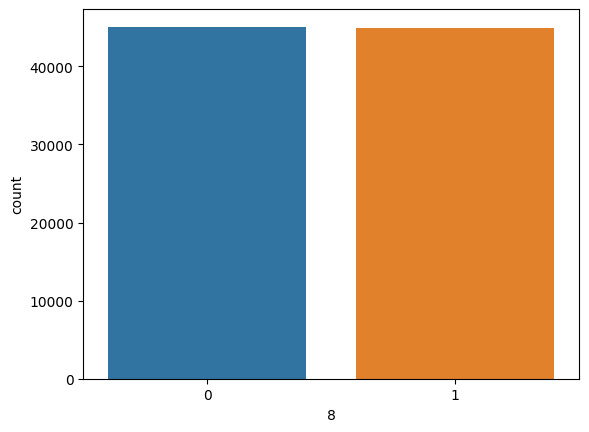

In [89]:
sns.countplot(x='8', data=df);

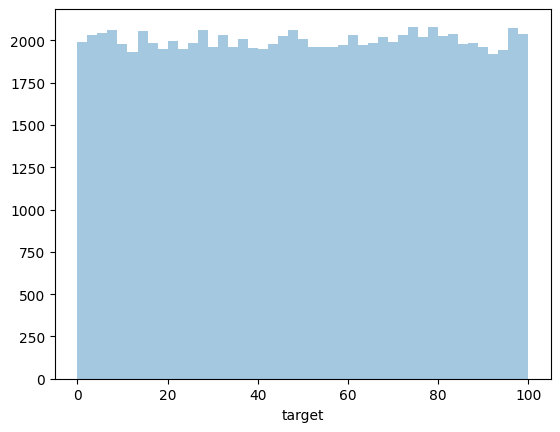

In [90]:
sns.distplot(df.target, kde=False);

<AxesSubplot: xlabel='0'>

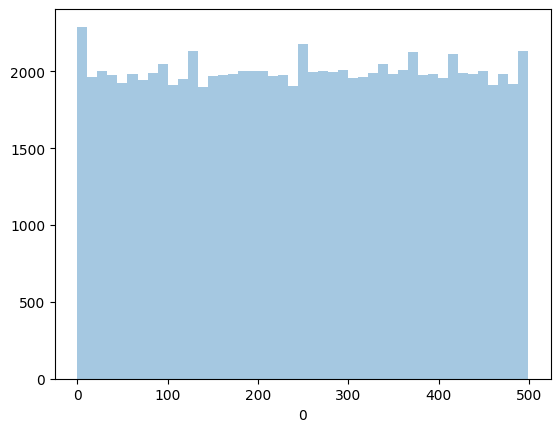

<AxesSubplot: xlabel='1'>

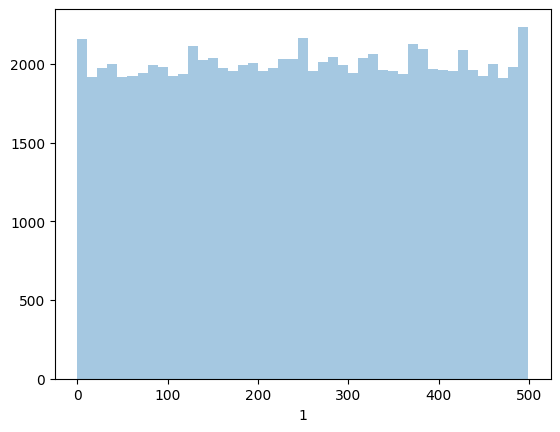

<AxesSubplot: xlabel='2'>

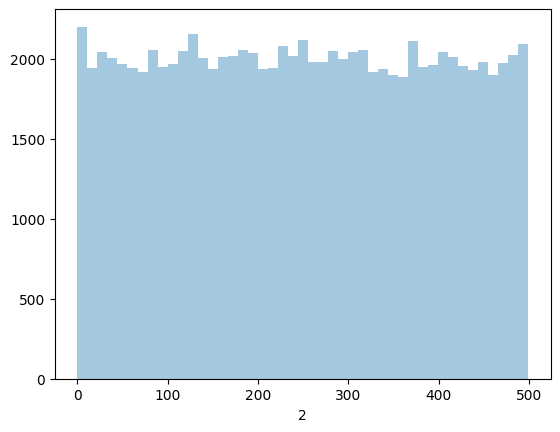

<AxesSubplot: xlabel='3'>

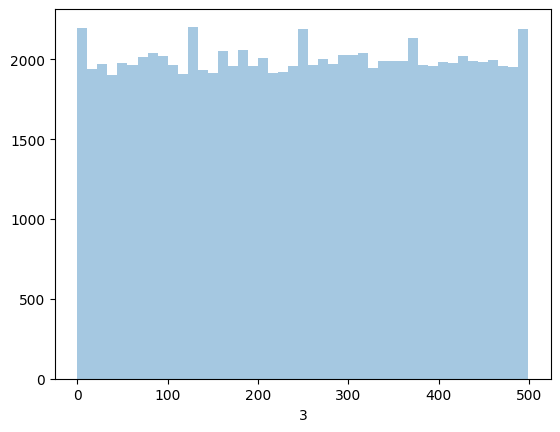

<AxesSubplot: xlabel='4'>

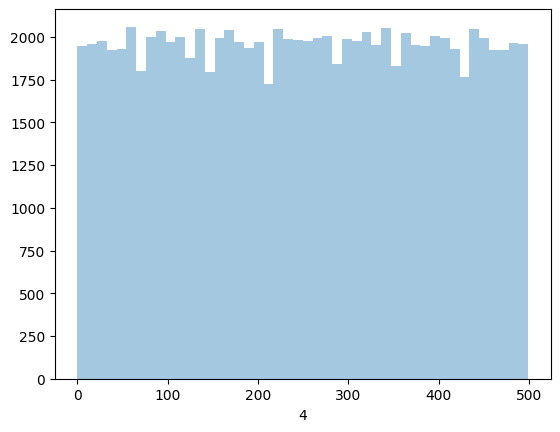

<AxesSubplot: xlabel='5'>

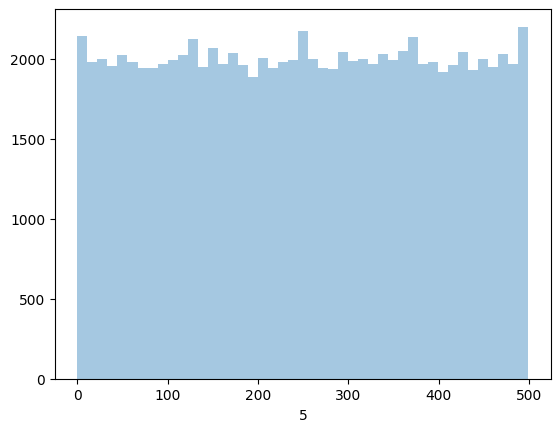

<AxesSubplot: xlabel='6'>

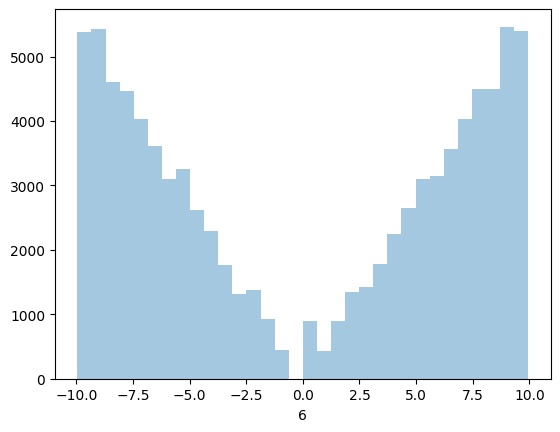

<AxesSubplot: xlabel='7'>

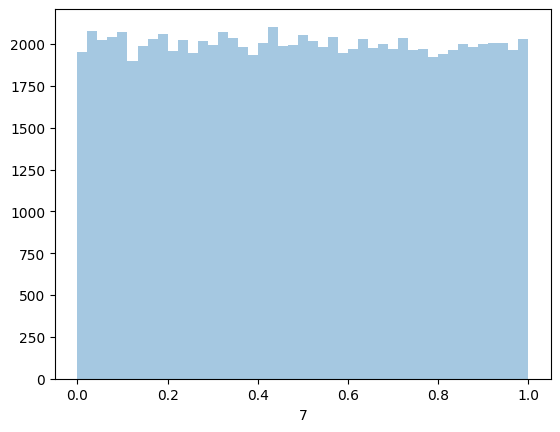

<AxesSubplot: xlabel='8'>

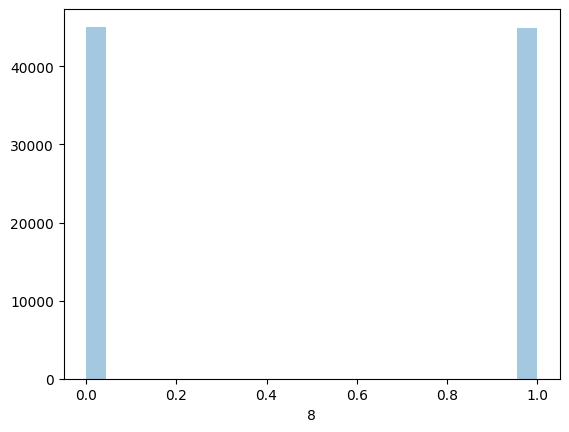

<AxesSubplot: xlabel='9'>

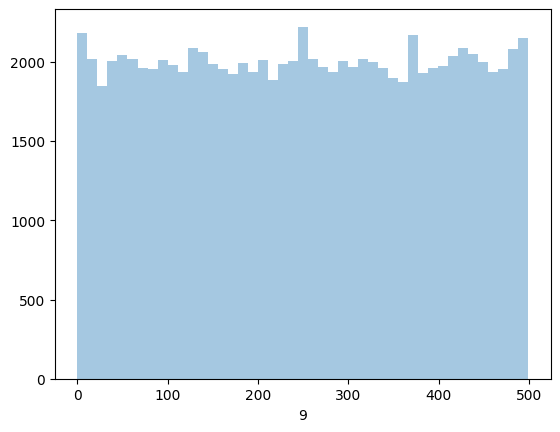

<AxesSubplot: xlabel='10'>

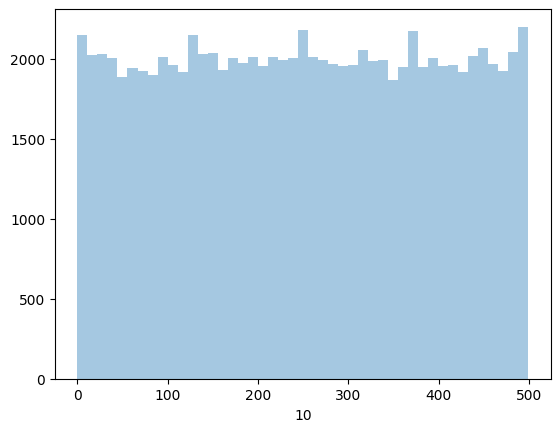

<AxesSubplot: xlabel='11'>

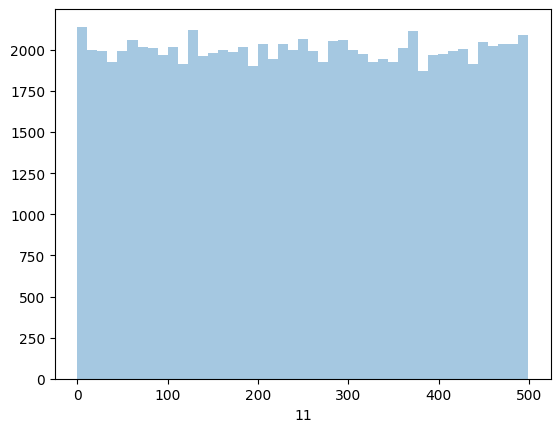

<AxesSubplot: xlabel='12'>

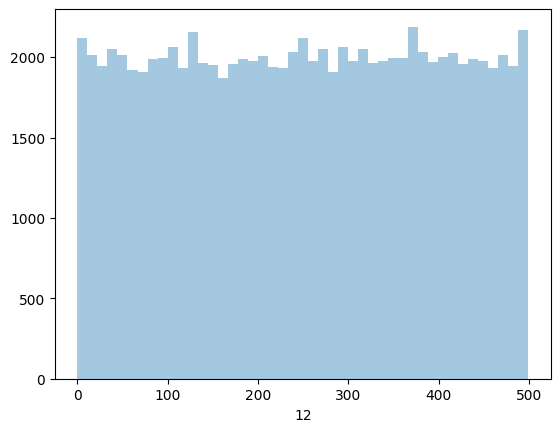

<AxesSubplot: xlabel='13'>

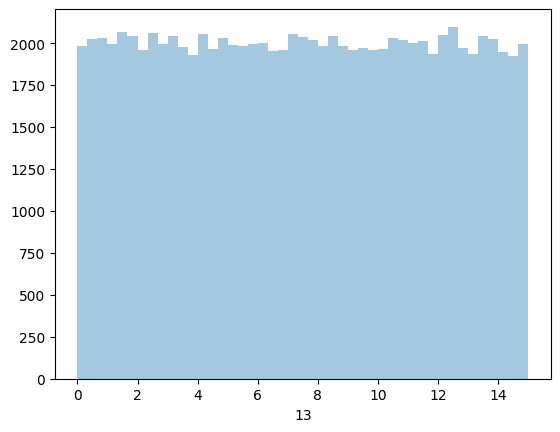

<AxesSubplot: xlabel='14'>

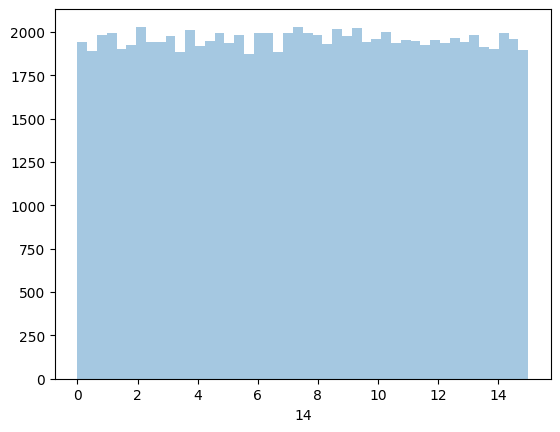

<AxesSubplot: xlabel='15'>

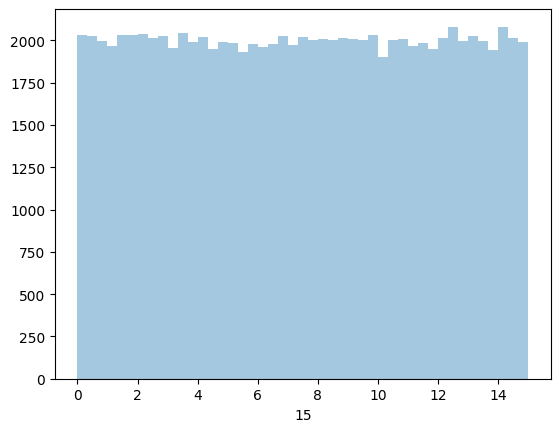

<AxesSubplot: xlabel='16'>

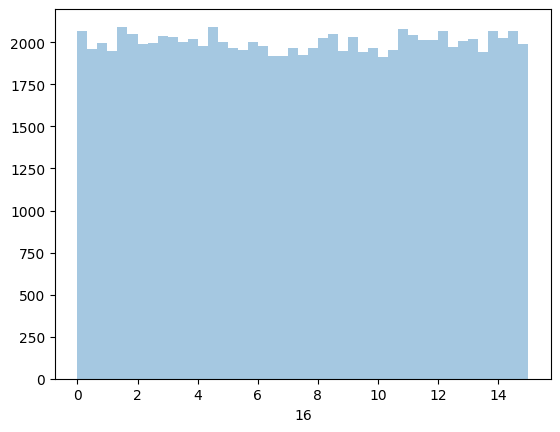

<AxesSubplot: xlabel='17'>

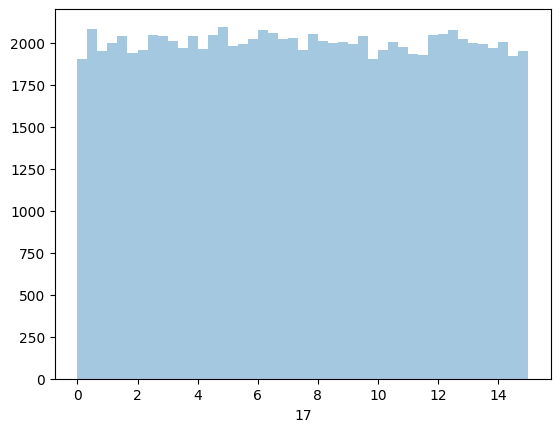

<AxesSubplot: xlabel='18'>

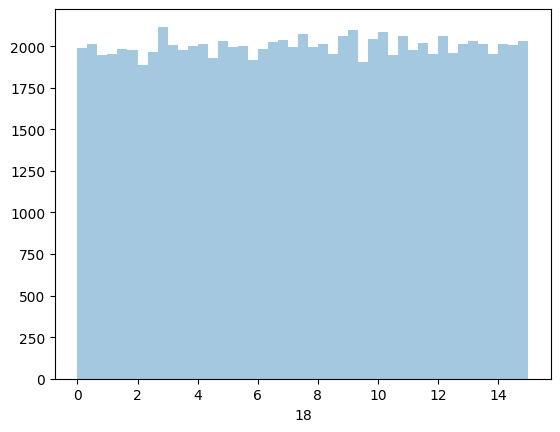

<AxesSubplot: xlabel='19'>

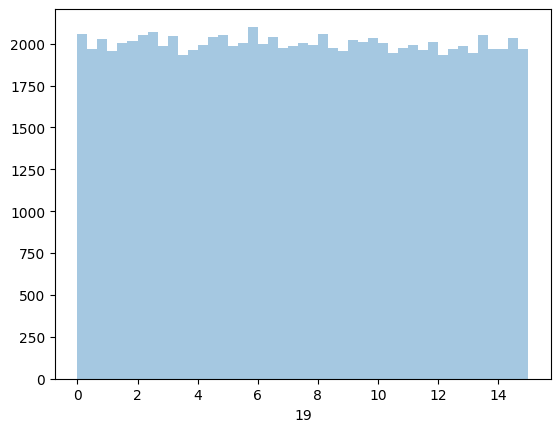

<AxesSubplot: xlabel='20'>

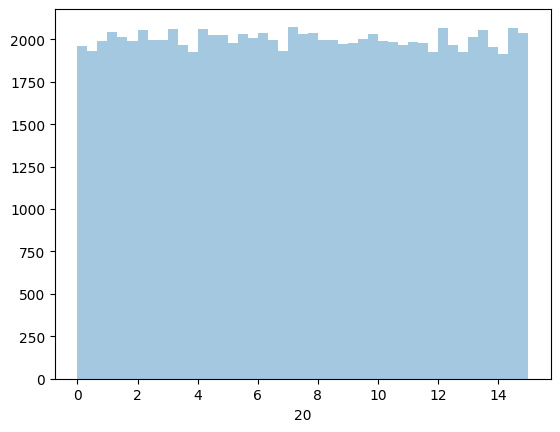

<AxesSubplot: xlabel='21'>

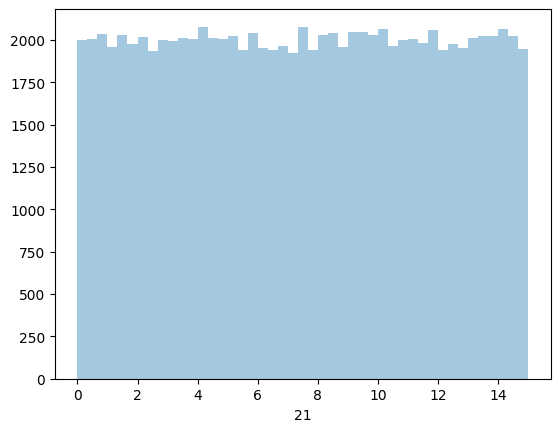

<AxesSubplot: xlabel='22'>

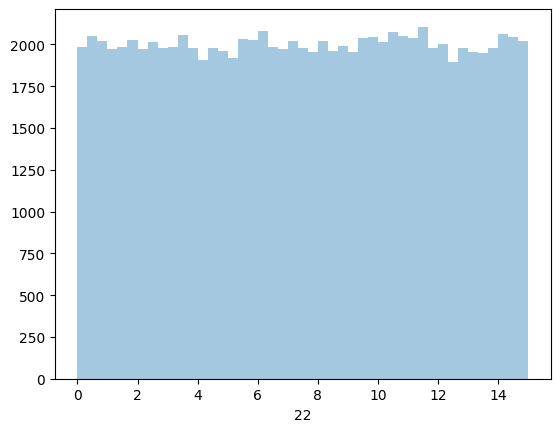

<AxesSubplot: xlabel='23'>

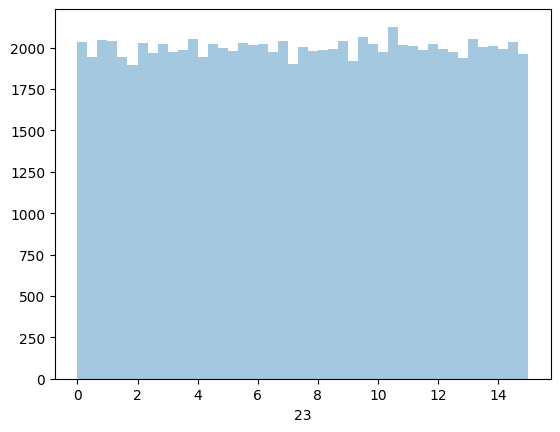

<AxesSubplot: xlabel='24'>

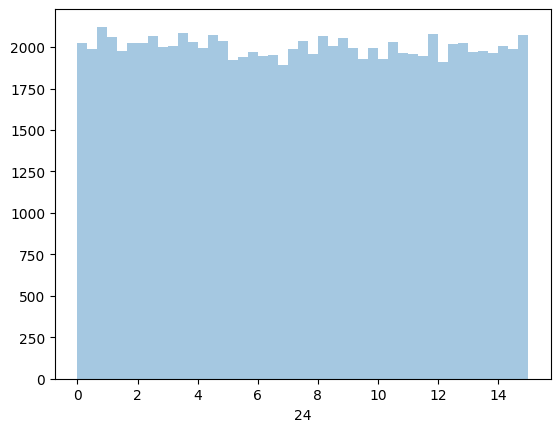

<AxesSubplot: xlabel='25'>

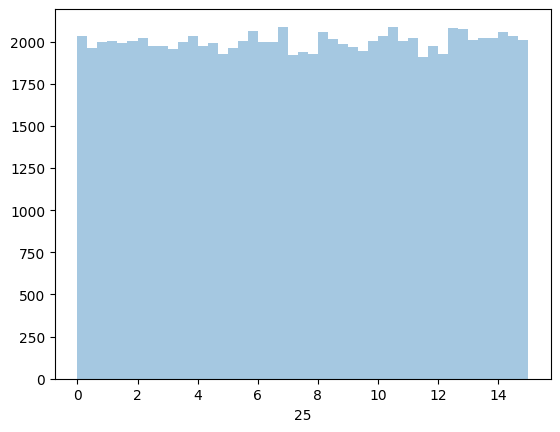

<AxesSubplot: xlabel='26'>

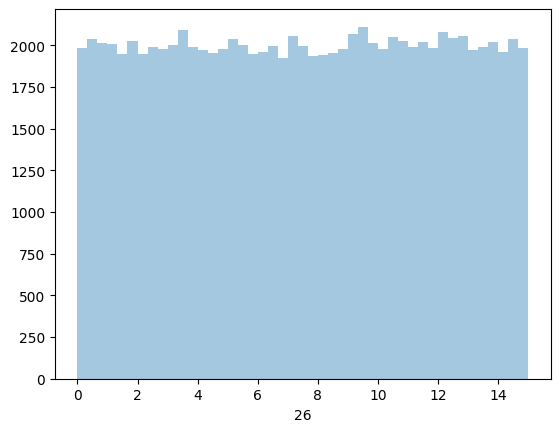

<AxesSubplot: xlabel='27'>

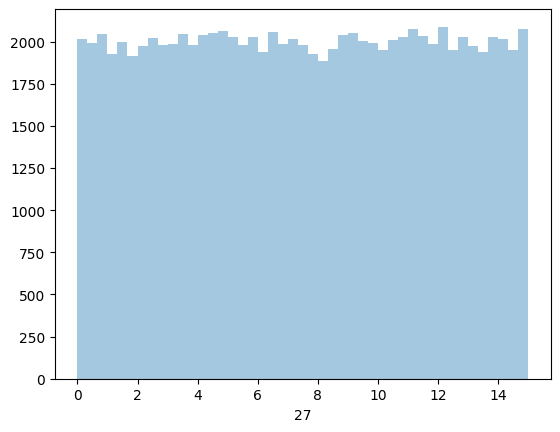

<AxesSubplot: xlabel='28'>

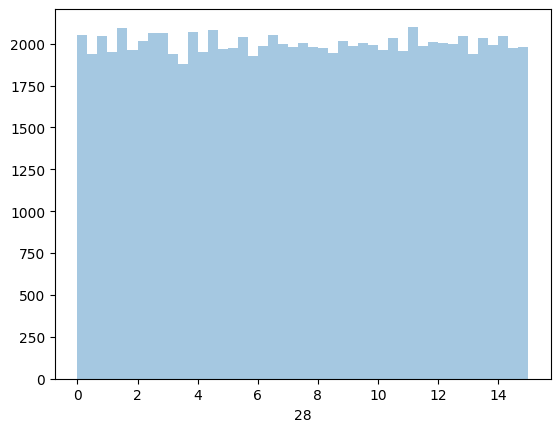

<AxesSubplot: xlabel='29'>

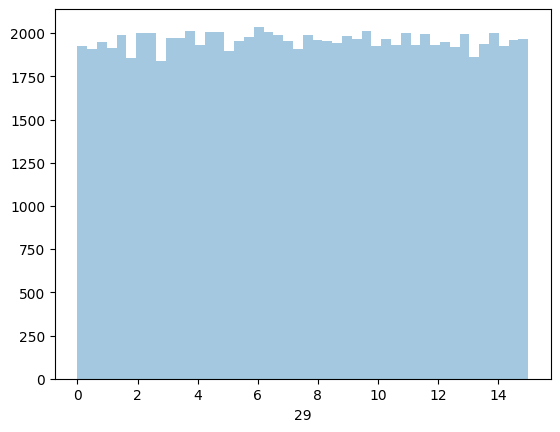

<AxesSubplot: xlabel='30'>

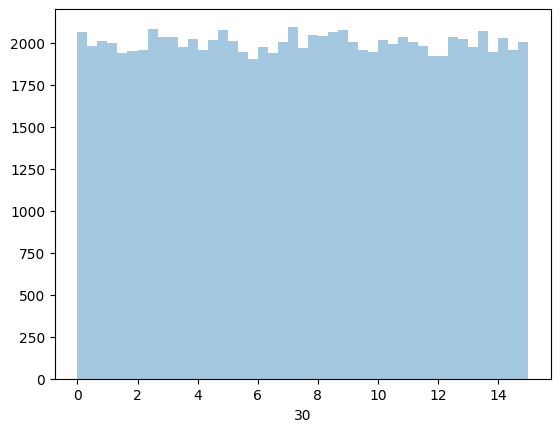

<AxesSubplot: xlabel='31'>

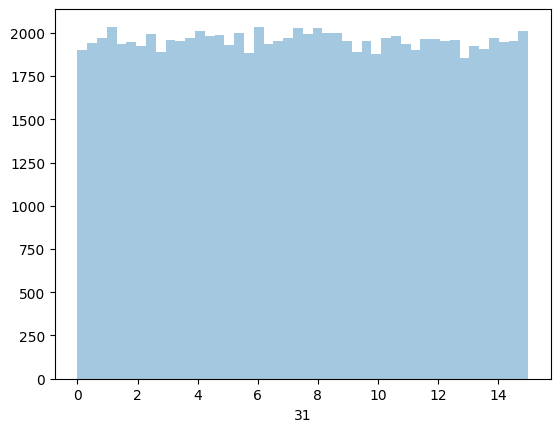

<AxesSubplot: xlabel='32'>

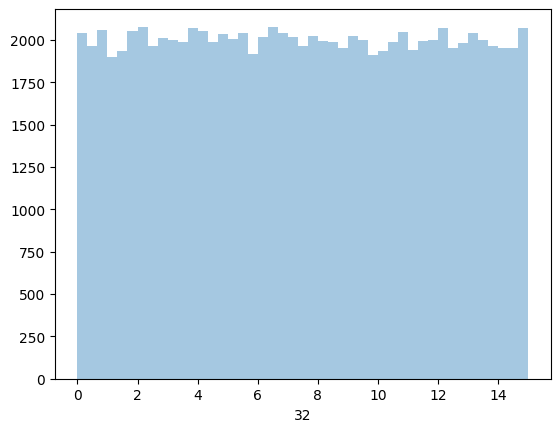

<AxesSubplot: xlabel='33'>

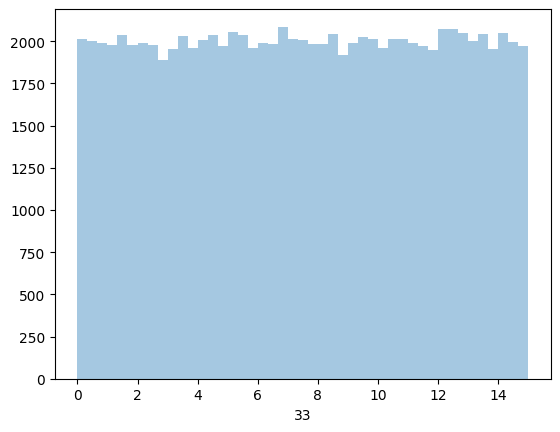

<AxesSubplot: xlabel='34'>

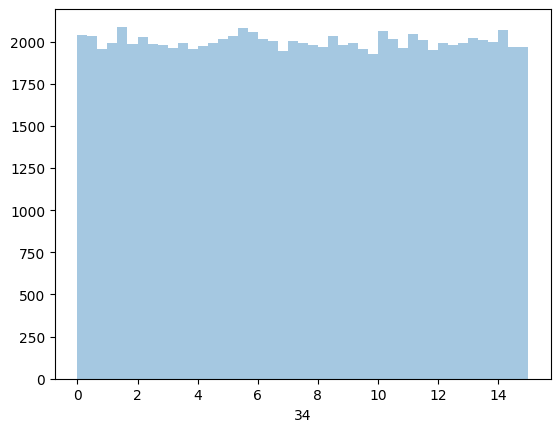

<AxesSubplot: xlabel='35'>

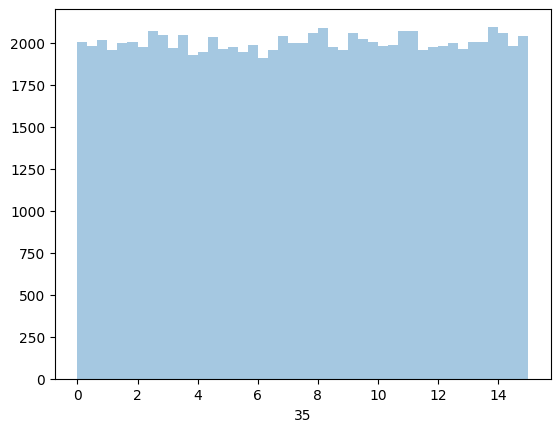

<AxesSubplot: xlabel='36'>

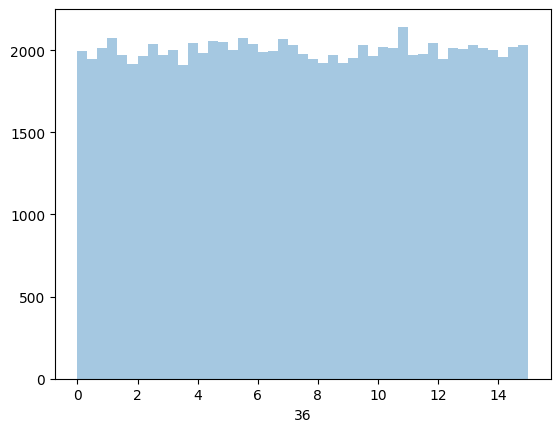

<AxesSubplot: xlabel='37'>

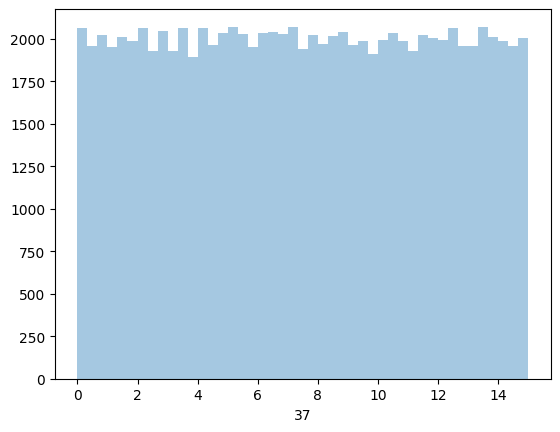

<AxesSubplot: xlabel='38'>

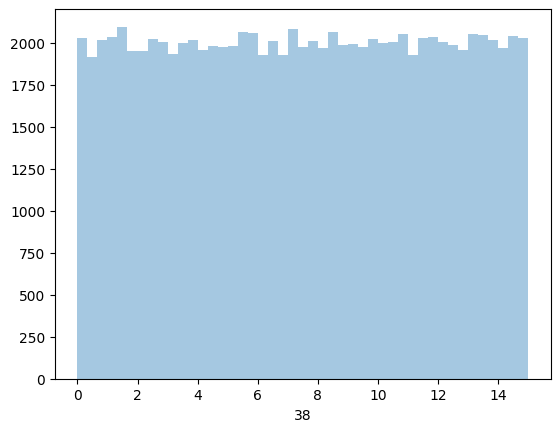

<AxesSubplot: xlabel='39'>

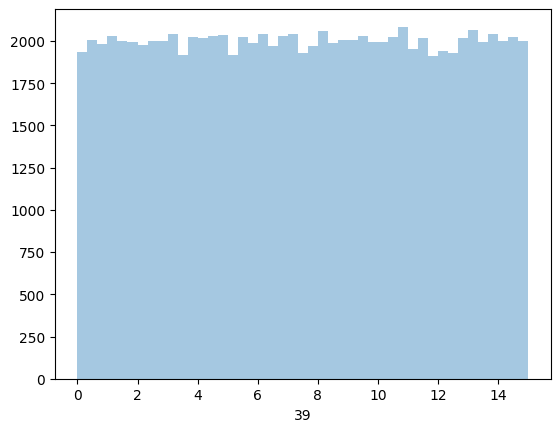

<AxesSubplot: xlabel='40'>

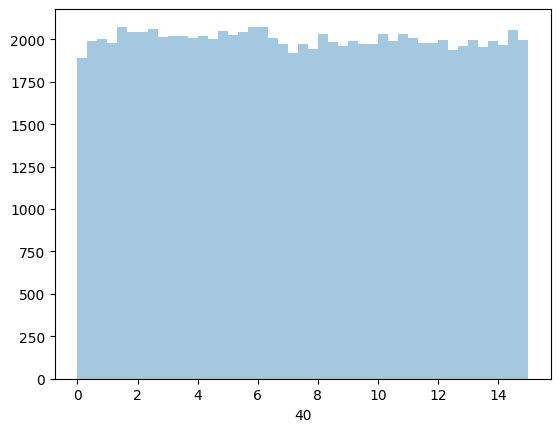

<AxesSubplot: xlabel='41'>

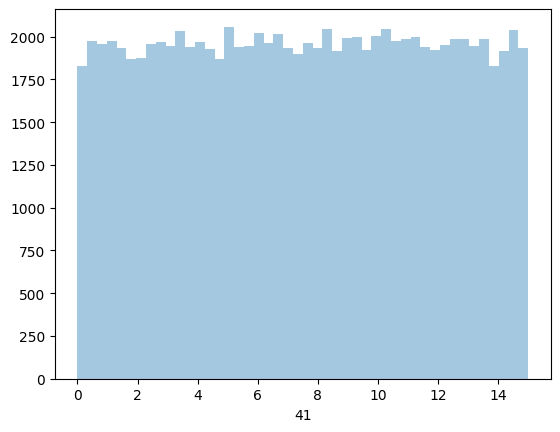

<AxesSubplot: xlabel='42'>

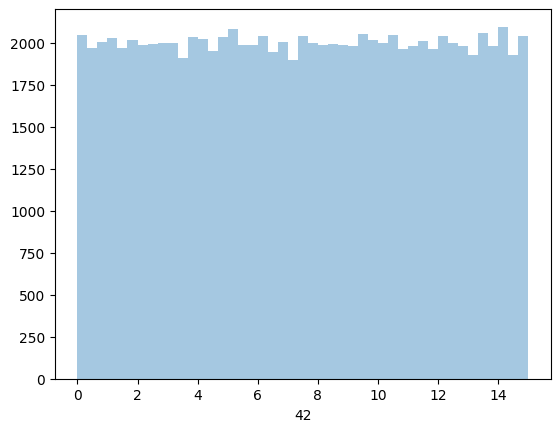

<AxesSubplot: xlabel='43'>

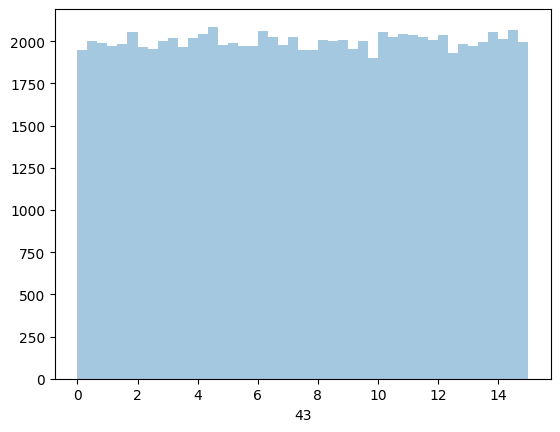

<AxesSubplot: xlabel='44'>

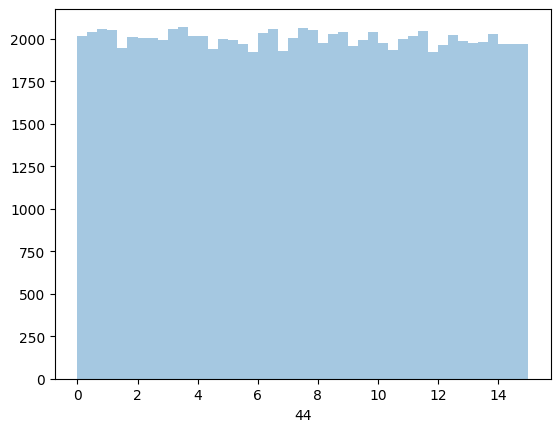

<AxesSubplot: xlabel='45'>

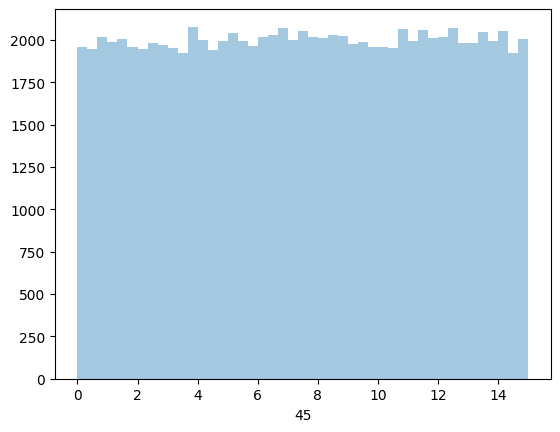

<AxesSubplot: xlabel='46'>

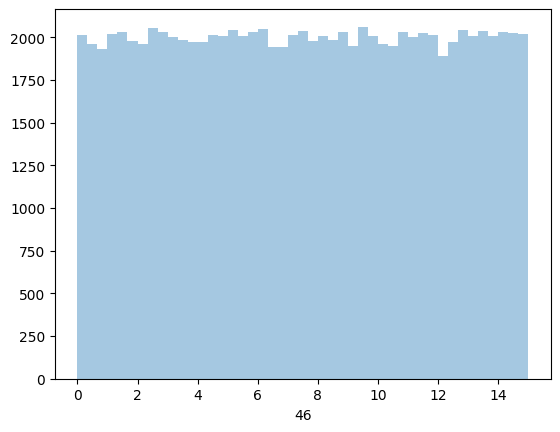

<AxesSubplot: xlabel='47'>

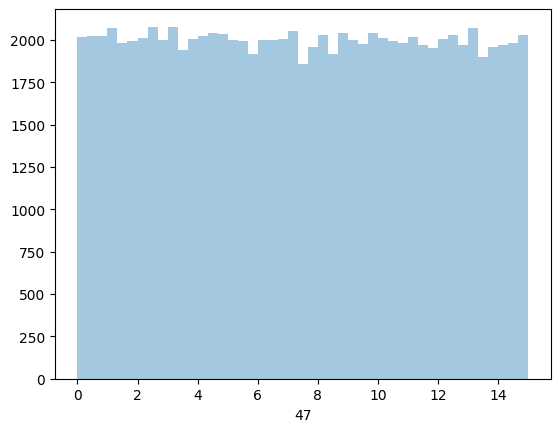

<AxesSubplot: xlabel='48'>

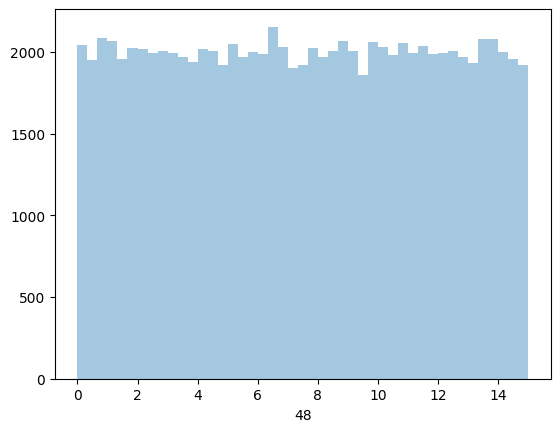

<AxesSubplot: xlabel='49'>

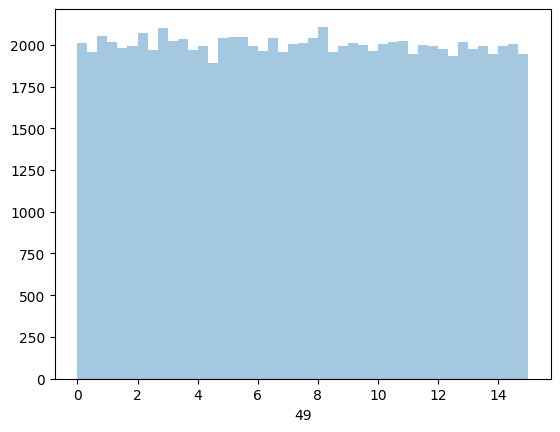

<AxesSubplot: xlabel='50'>

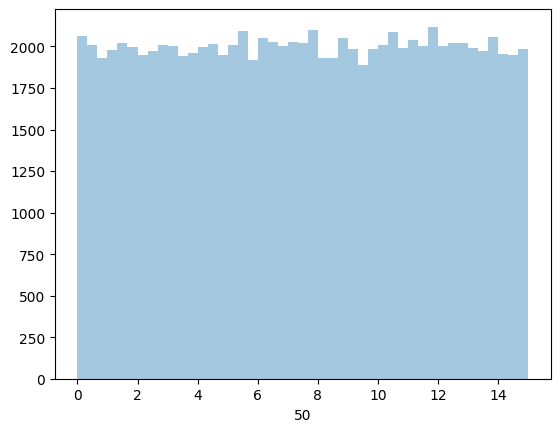

<AxesSubplot: xlabel='51'>

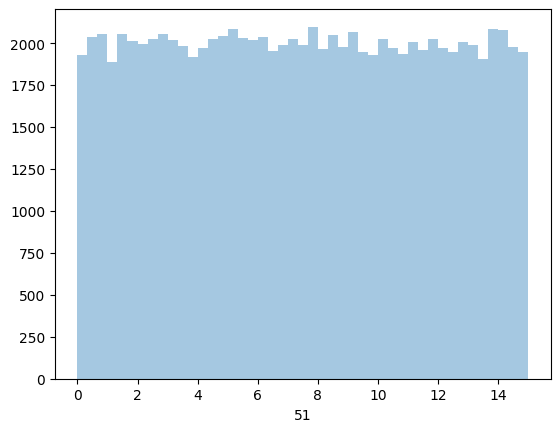

<AxesSubplot: xlabel='52'>

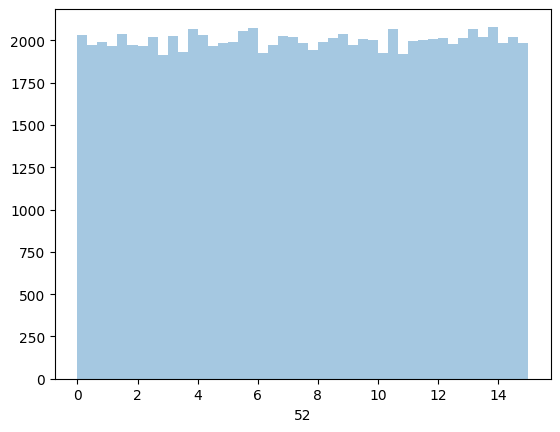

<AxesSubplot: xlabel='target'>

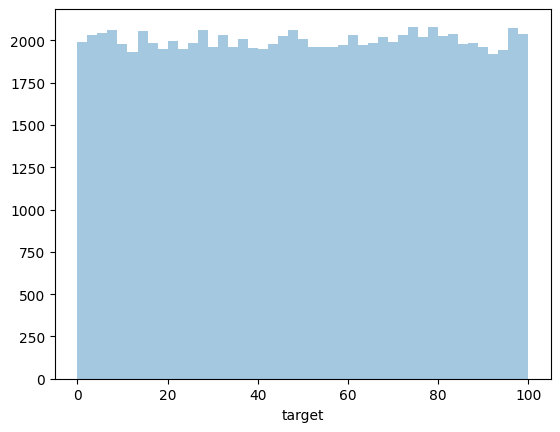

In [91]:
for f in df.columns:
    sns.distplot(df[f], kde=False);
    plt.show();

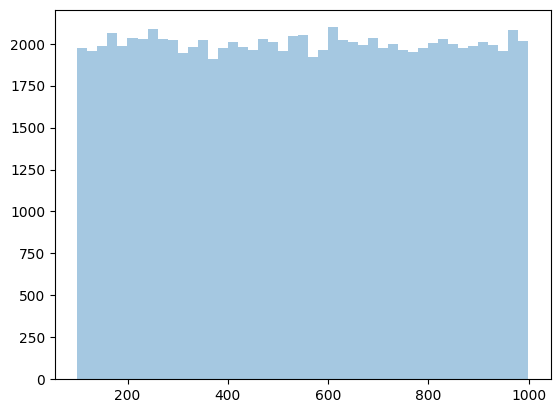

In [99]:
#сгенерировать 90000 случайных чисел от 0 до 100
rand_check= np.random.randint(100, 1000, 90000)

sns.distplot(rand_check, kde=False);

In [100]:
sns.pairplot(df, hue='target');

: 

In [8]:
print("columns in Overdrafters data")
print(
    "--------------------------------------------------------------------------------"
)
cat_data = [i for i in df.select_dtypes(include=np.object_).columns]
num_data = [i for i in df.select_dtypes(include=np.number).columns]
print("categorical columns in Overdrafters data", cat_data)
print(
    "--------------------------------------------------------------------------------"
)
print("numerical columns in Overdrafters data", num_data)

columns in Overdrafters data
--------------------------------------------------------------------------------
categorical columns in Overdrafters data []
--------------------------------------------------------------------------------
numerical columns in Overdrafters data ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', 'target']


In [9]:
empty_columns = []
for col in df.columns:
    if len(df[col].unique()) <= 1:
        empty_columns.append(col)

print(f"There are {len(empty_columns)} columns with just 1 unique value")
print(empty_columns)
print("Removing these from dataset")


df = df.drop(empty_columns, axis=1)

There are 0 columns with just 1 unique value
[]
Removing these from dataset


In [10]:
threshold = 0.999  # 99% threshold
num_rows = df.shape[0]
empty_columns = []

for col in df.columns:
    missing_values_count = df[col].isnull().sum()

    if (
        missing_values_count / num_rows > threshold
    ):  # Check if the column has more than 95% missing values
        empty_columns.append(col)
    elif len(df[col].unique()) <= 1:  # Check if the column has only one unique value
        empty_columns.append(col)

print(
    f"There are {len(empty_columns)} columns with either just 1 unique value or more than 99% missing values."
)
print(empty_columns)
print("Considering removing these from dataset...")

There are 0 columns with either just 1 unique value or more than 99% missing values.
[]
Considering removing these from dataset...


In [11]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 54)


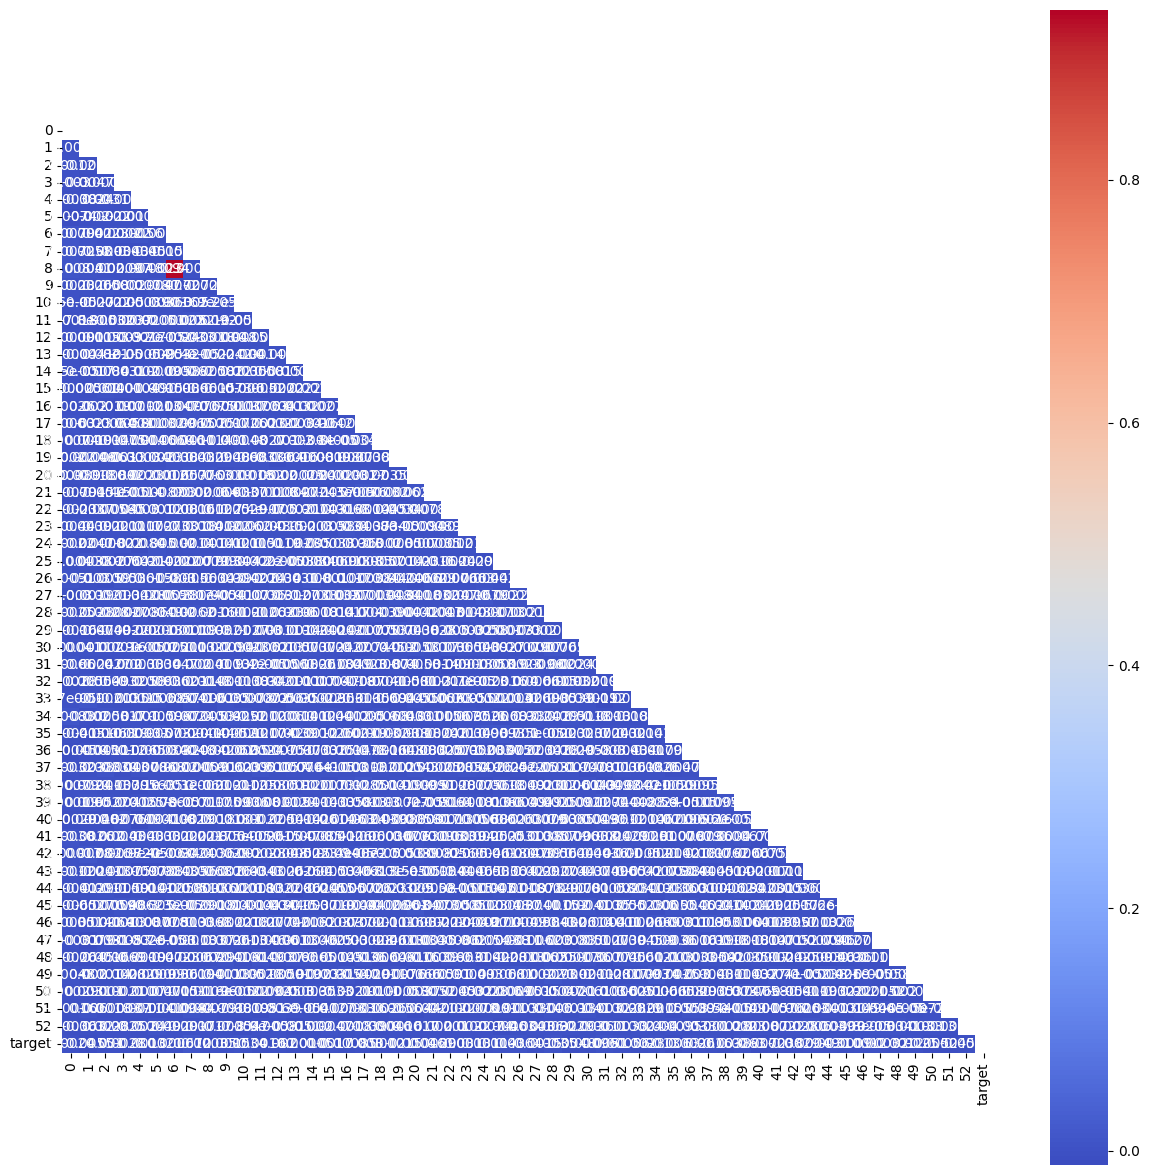

In [24]:
# построю матрицу корреляции между всеми фичами X_train

corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15, 15))
sns.heatmap(corr, mask=mask, square=True, annot=True, cmap="coolwarm")
plt.show()

In [12]:
# проверю корреляции с целевой переменной

corr = df.corr()
abs(corr["target"]).sort_values(ascending=False)


target    1.000000
7         0.012103
40        0.007216
26        0.006370
39        0.006283
35        0.006267
1         0.005545
50        0.005243
31        0.005077
29        0.004785
51        0.004507
25        0.004276
38        0.003845
41        0.003770
28        0.003451
10        0.003396
44        0.003092
17        0.002953
42        0.002876
21        0.002874
3         0.002807
36        0.002624
49        0.002473
0         0.002427
33        0.002301
5         0.002125
12        0.002016
15        0.001653
37        0.001642
11        0.001566
19        0.001520
9         0.001504
27        0.001459
34        0.001331
4         0.001300
23        0.001280
52        0.001203
18        0.001197
48        0.001183
46        0.001160
24        0.001070
13        0.001009
2         0.001003
30        0.000964
45        0.000903
16        0.000853
6         0.000666
32        0.000561
14        0.000513
43        0.000489
20        0.000456
8         0.000347
47        0.

In [46]:
def plot_deciles(decile_stat):
    fig = plt.figure(figsize=(15, 10))
    axis = fig.add_subplot(111) 
    axis.bar(decile_stat.interval, decile_stat["y_true_count"], 0.9, color="#00FF7F") # колір зелений
    # axis.bar(
    #     decile_stat.index,
    #     decile_stat["y_true_sum"],
    #     0.9,
    #     color="#CD5C5C", # колір червоний
    #     #   bottom=decile_stat['y_true_count']
    # )
    axis_2 = fig.add_subplot(111, sharex=axis, frameon=False) # frameon=False - відключає рамку для другої осі 
    axis_2.plot(decile_stat.interval, decile_stat["y_true_mean"], marker="o")
    axis_2.yaxis.tick_right()
    axis_2.yaxis.set_label_position("right")
   
    axis_2.set_xlabel('Диапазоны значений в бинах')
    axis_2.set_ylabel('Кол-во наблюдений')
    axis_2.set_ylabel('Доля целевого действия')

    for index, data in enumerate(decile_stat["y_true_mean"]):
        plt.text(x=index, y=data, s=f"{data}", fontdict=dict(fontsize=10))

    plt.xticks(decile_stat.index)
    axis.legend(("Total ", "Target"), loc="upper left")
    return plt


def get_feature_stat(df, feature_name, bins_cnt):

    _tmp_df = pd.DataFrame(
        {
            "y_true": df.target,  ##################################################################
            "x_value": df[feature_name],
        }
    )

    ser, bins = pd.qcut(
        _tmp_df["x_value"], q=bins_cnt, retbins=True, labels=False, duplicates="drop"
    )


    decile = pd.DataFrame({"lower_boundary": bins})
    decile["upper_boundary"] = decile["lower_boundary"].shift(-1)
    decile.loc[:0, "lower_boundary"] = 0
    decile.loc[9:9, "upper_boundary"] = 1
    decile["lower_boundary"] = decile["lower_boundary"] + 0.000001
    decile.index = decile.index + 1
    decile = decile.iloc[0:10]
    decile["decile"] = decile.index

    _tmp_df["decile"] = (
    pd.cut(
        _tmp_df["x_value"],
        bins=bins,
        labels=False,
        include_lowest=True,
        duplicates="drop",
    )
    + 1
    )
    _tmp_df2 = _tmp_df.groupby(["decile"]).agg(dict(y_true=["count", "sum", "mean"]))
    _tmp_df2.columns = ["_".join(c) for c in _tmp_df2]
    _tmp_df2["y_true_mean"] = (100 * _tmp_df2["y_true_mean"]).apply(lambda x: round(x, 2))
    _tmp_df2['interval'] = round(decile['lower_boundary'],2).astype(str) + ' - ' + round(decile['upper_boundary'],2).astype(str)
    _tmp_df2

    return decile, _tmp_df2

<module 'matplotlib.pyplot' from '/Users/marinalysenko/anaconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

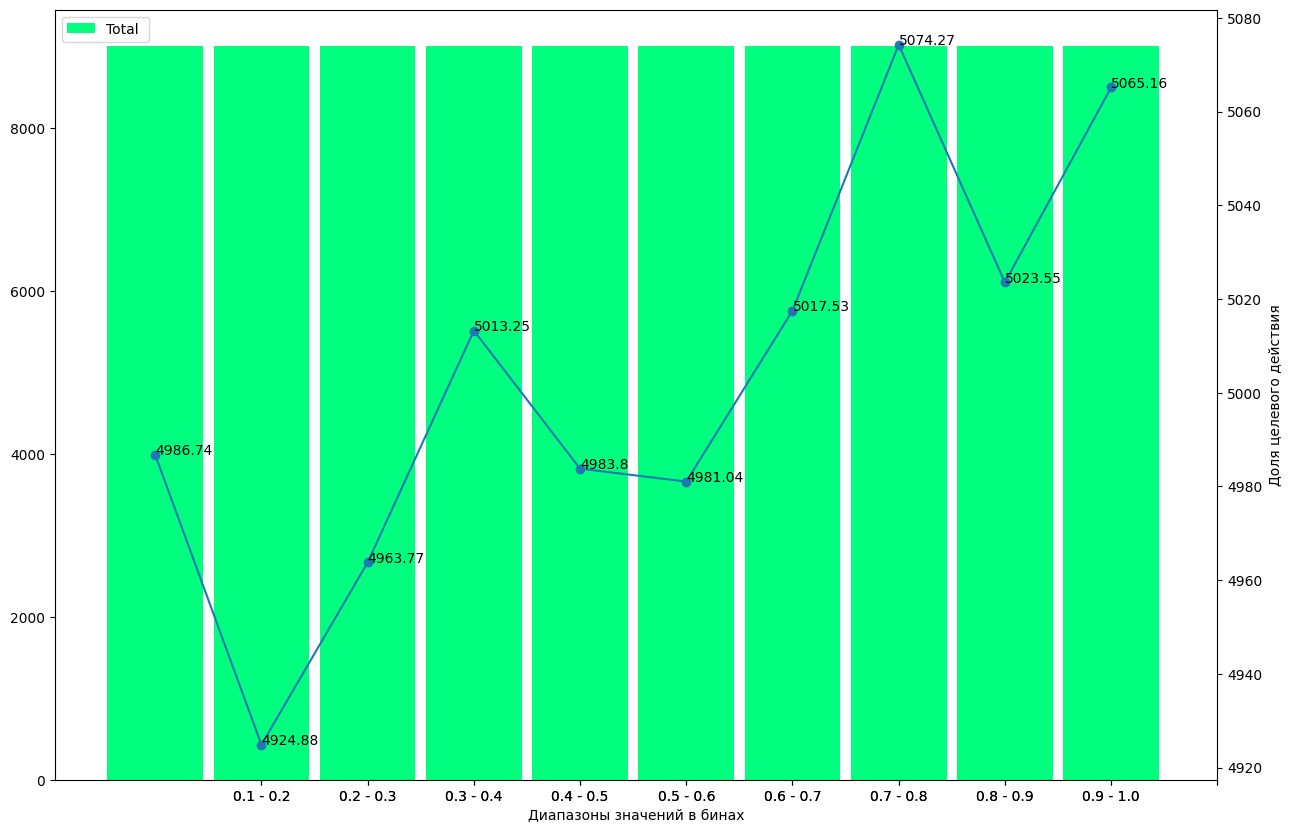

In [52]:
feature_name = "7"
bins_cnt = 10

(decile, _tmp_df2) = get_feature_stat(df, feature_name, bins_cnt)
plot_deciles(_tmp_df2)

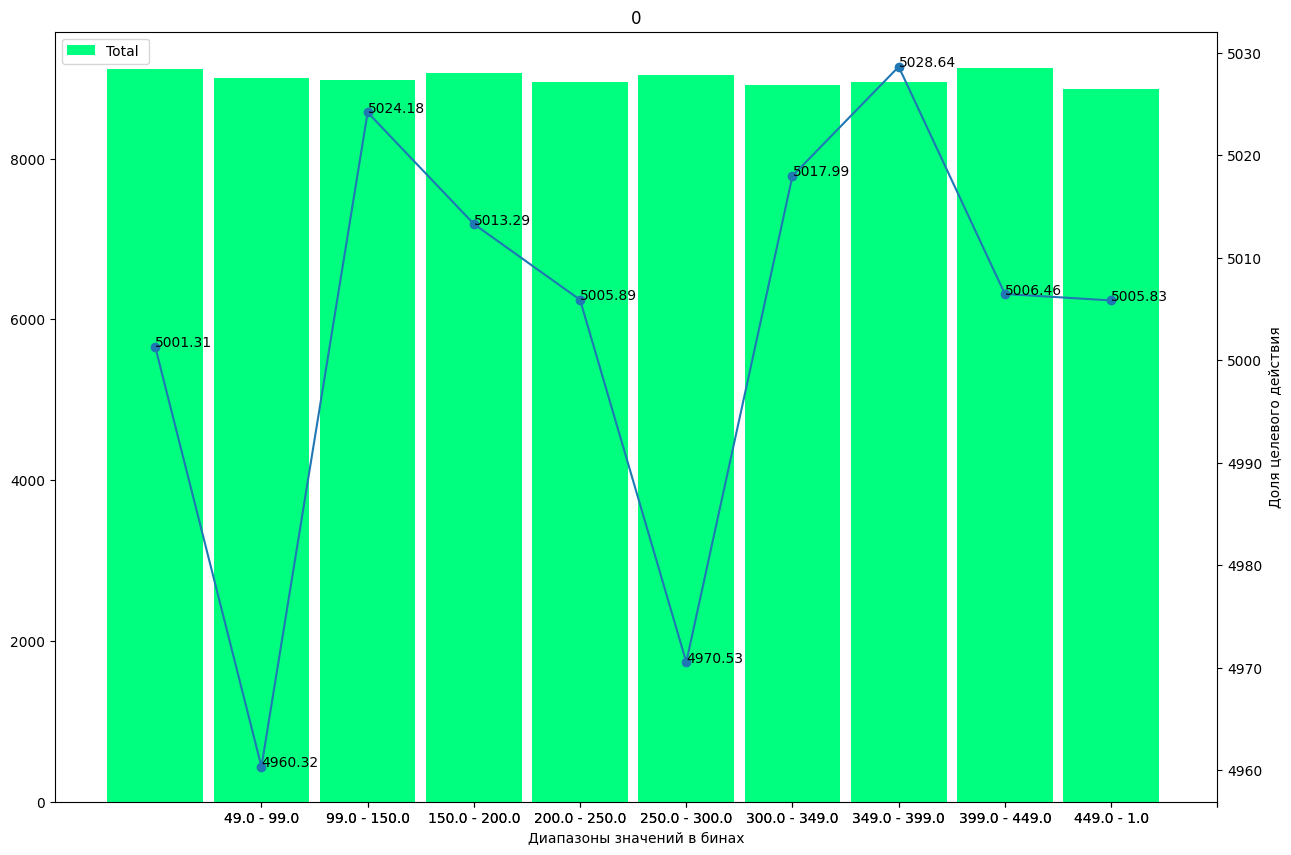

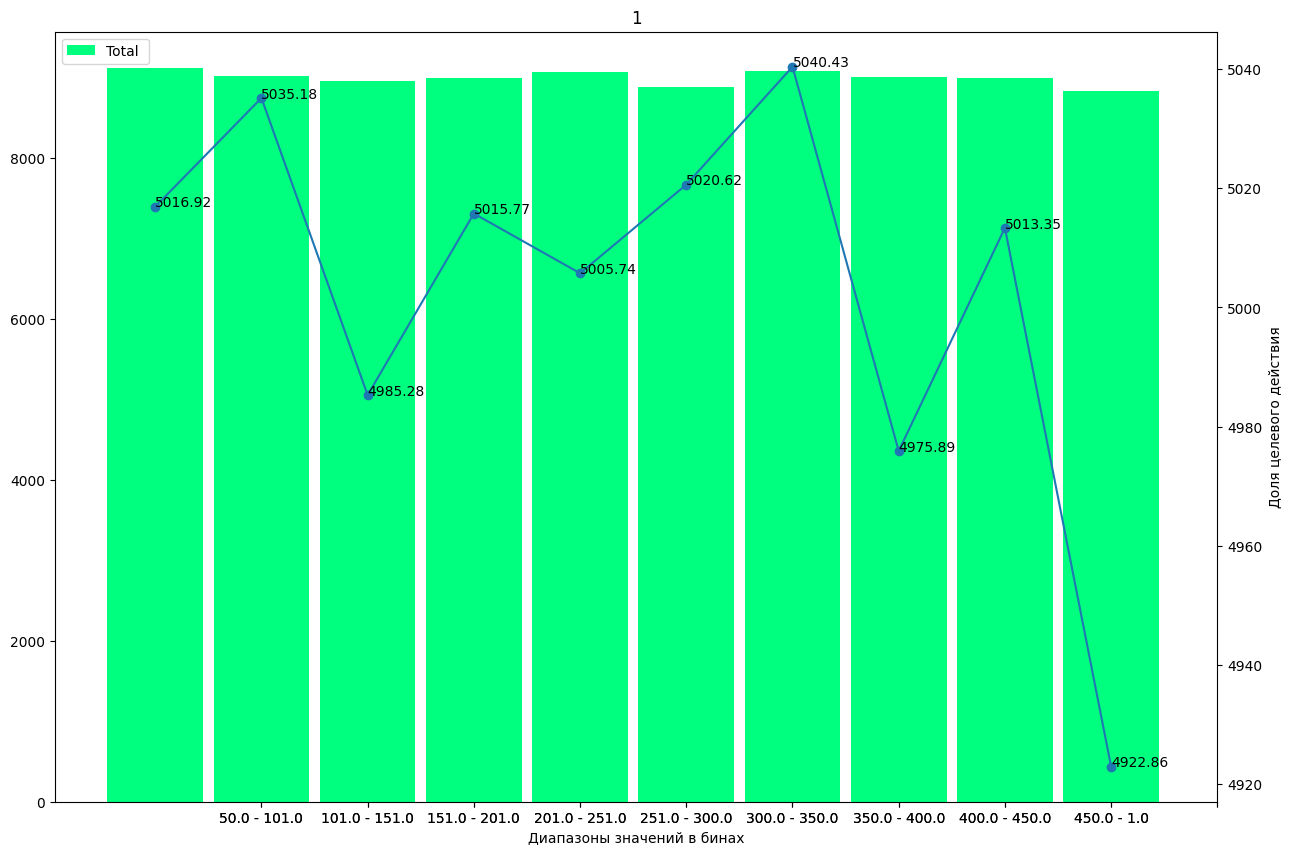

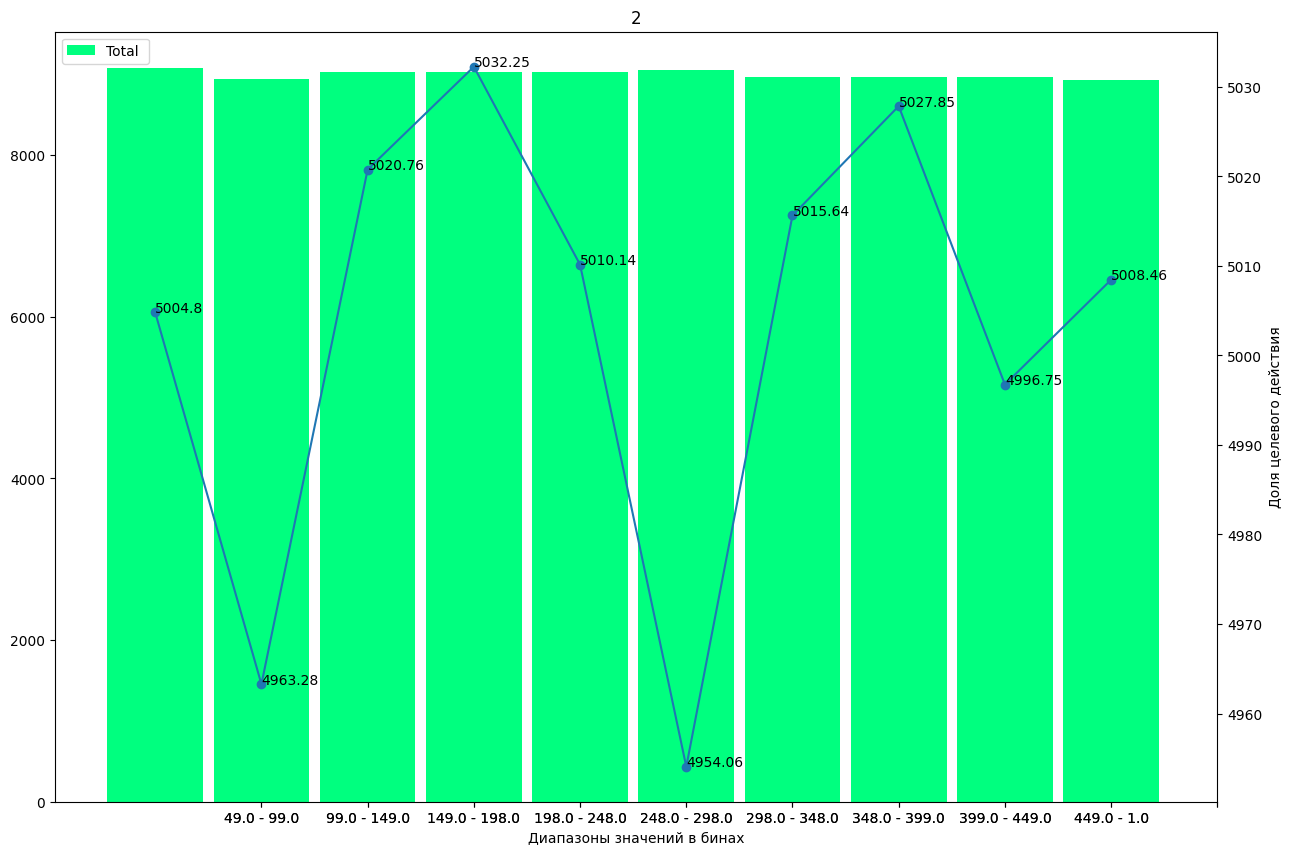

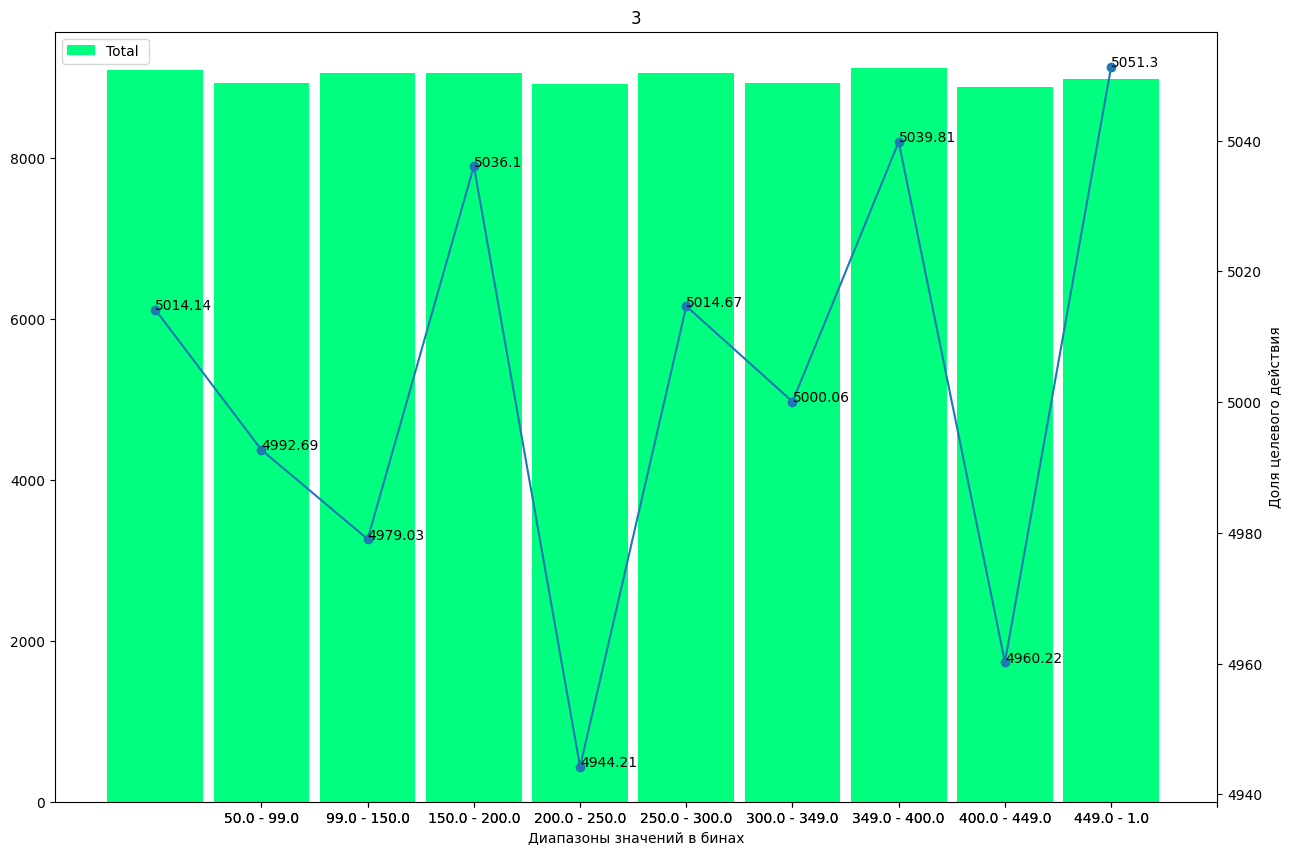

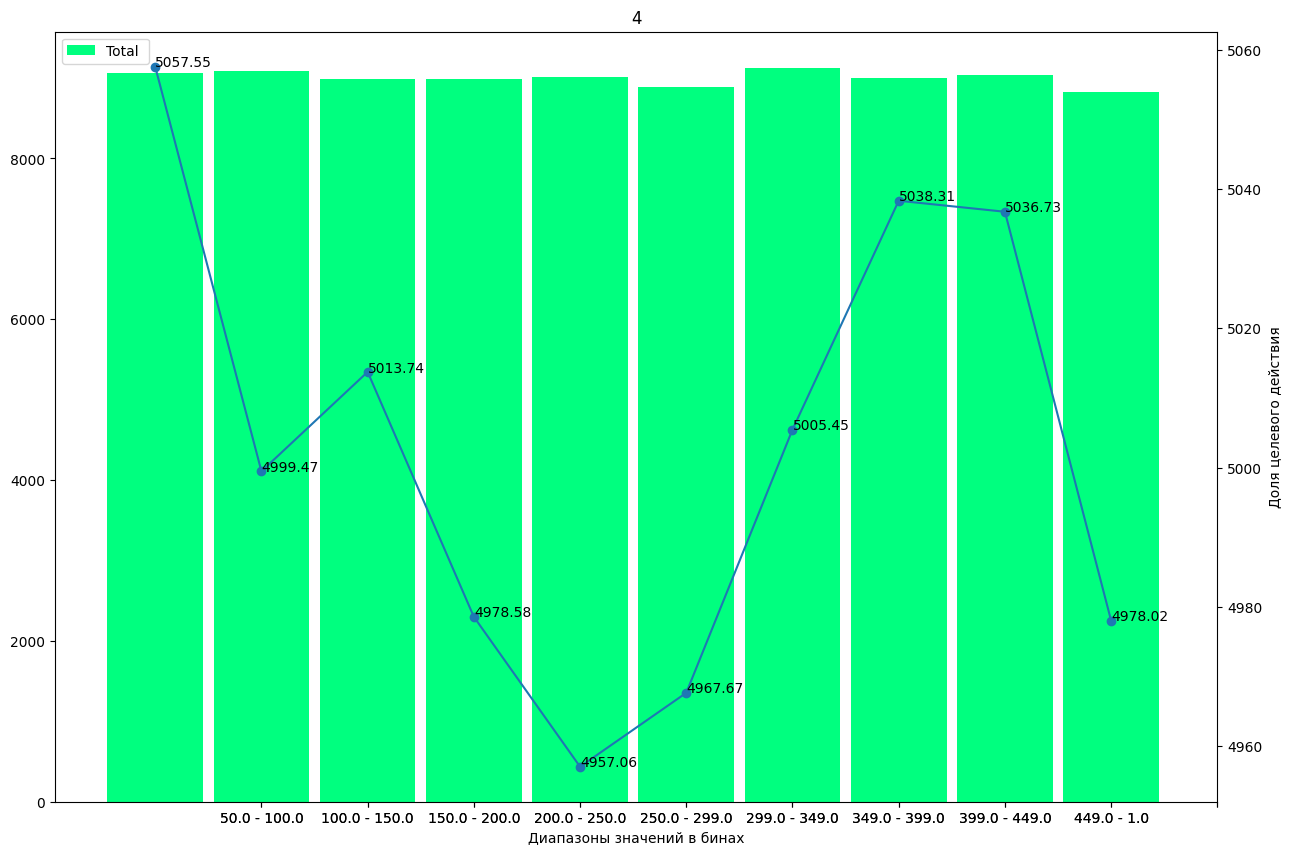

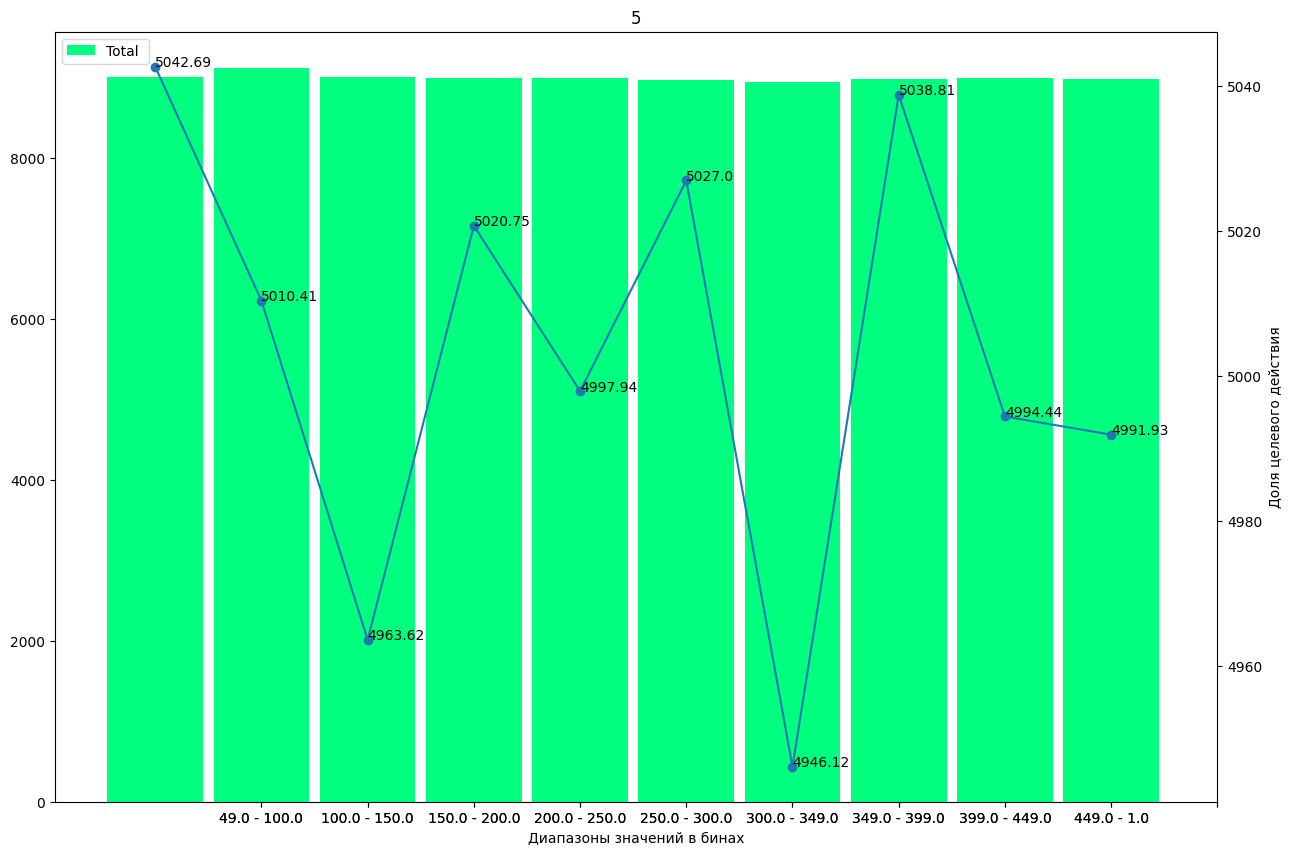

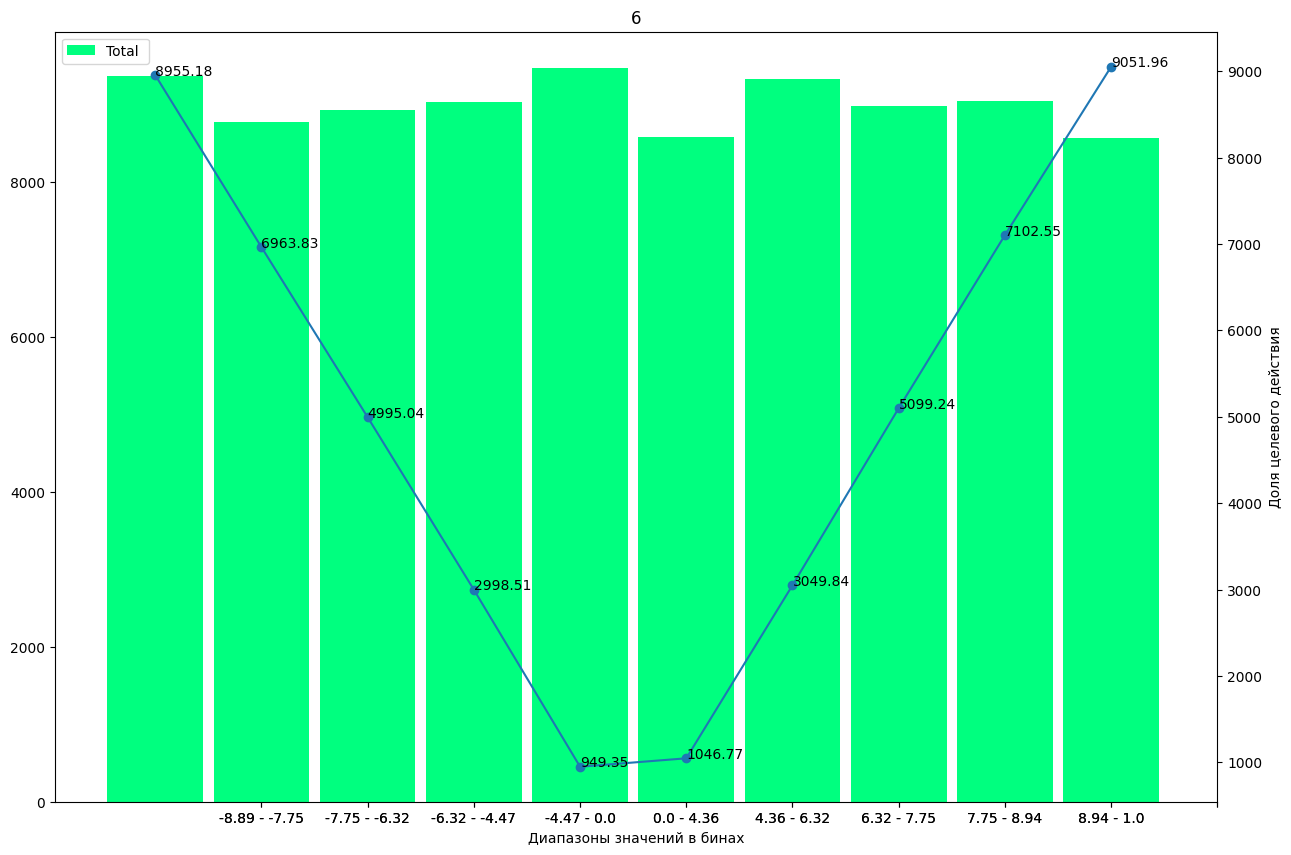

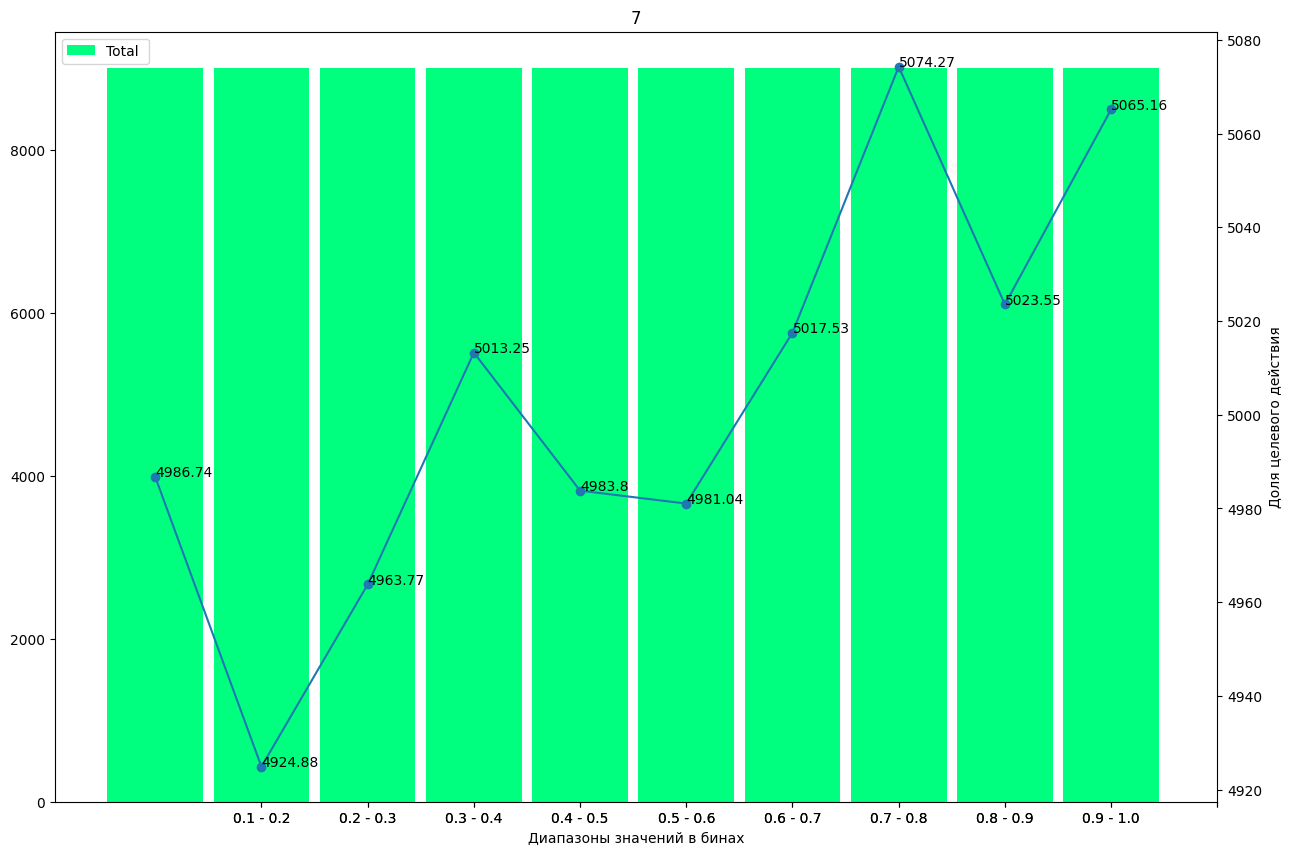

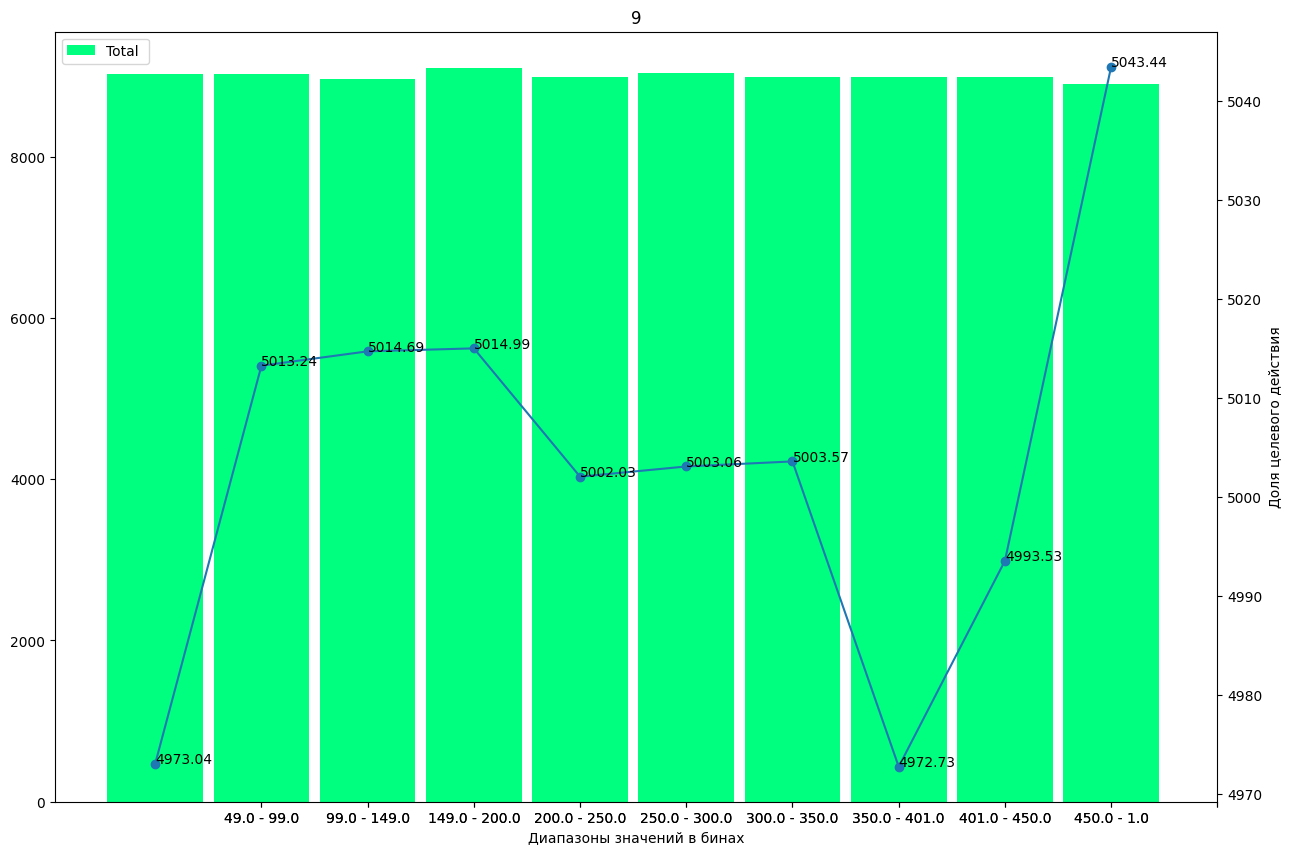

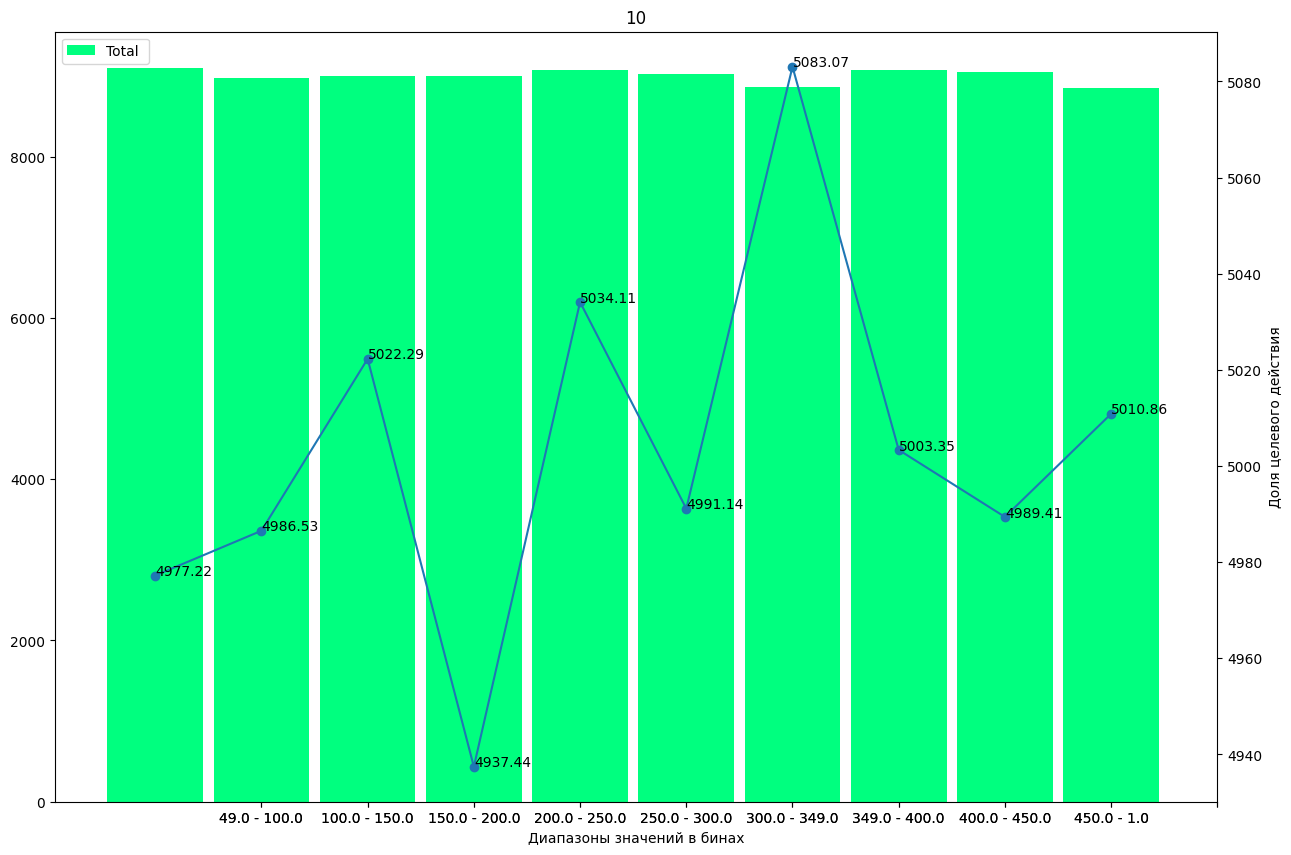

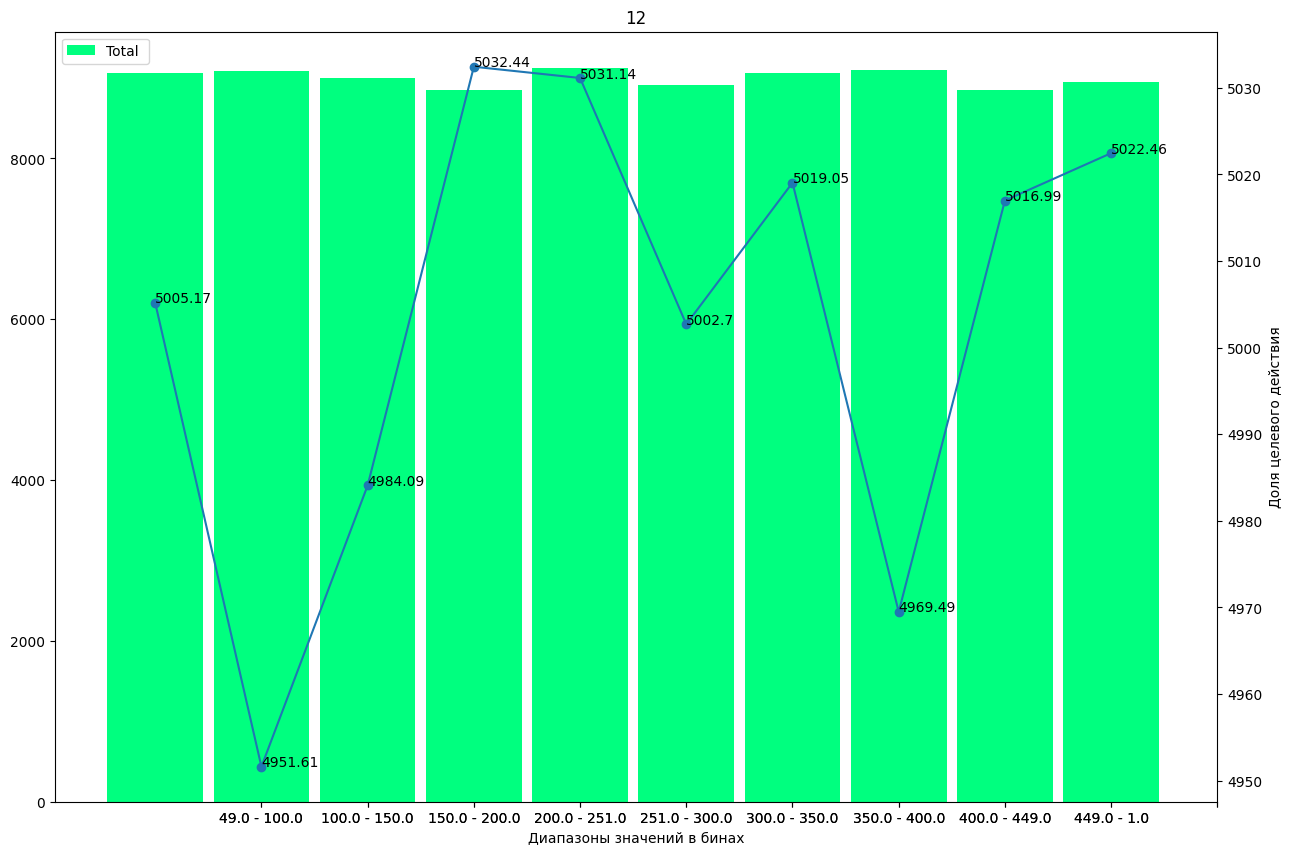

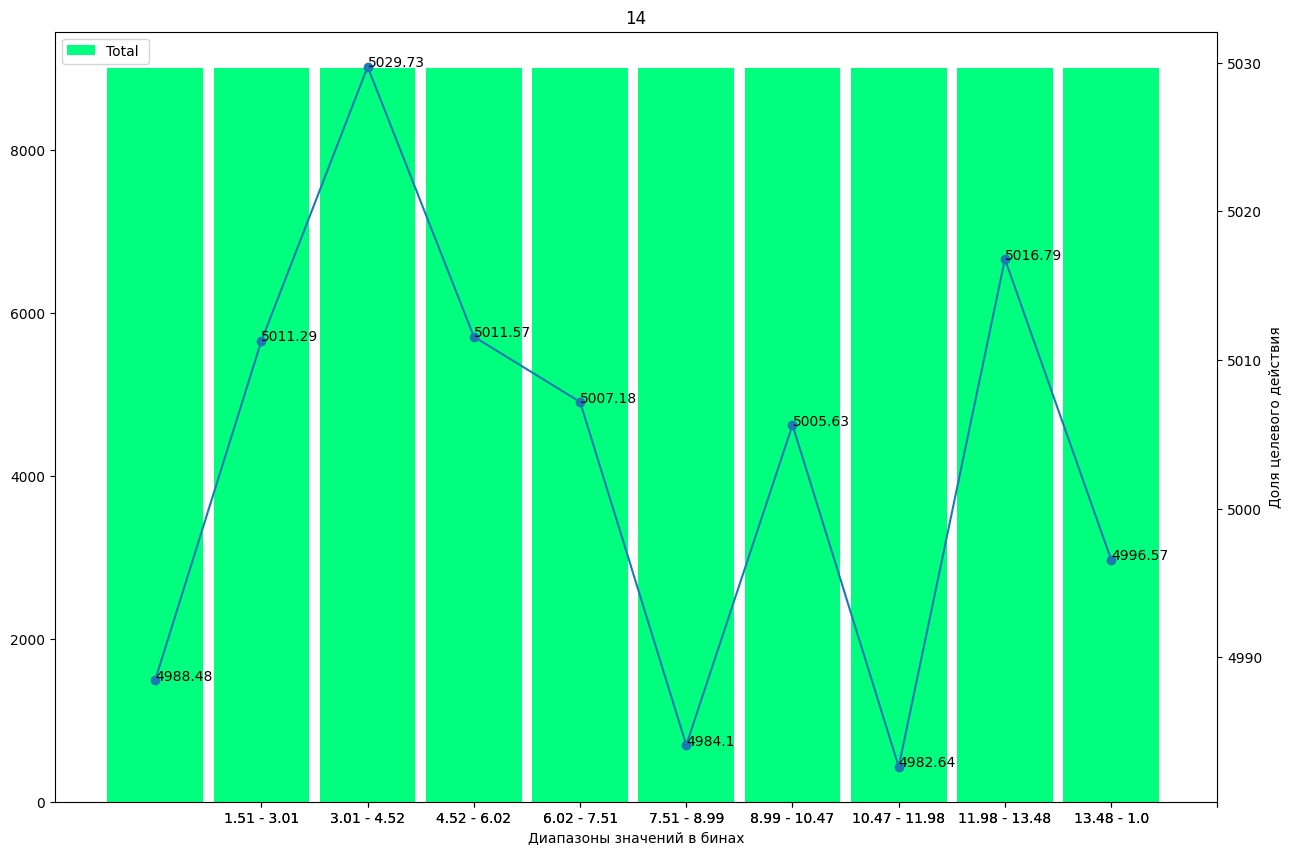

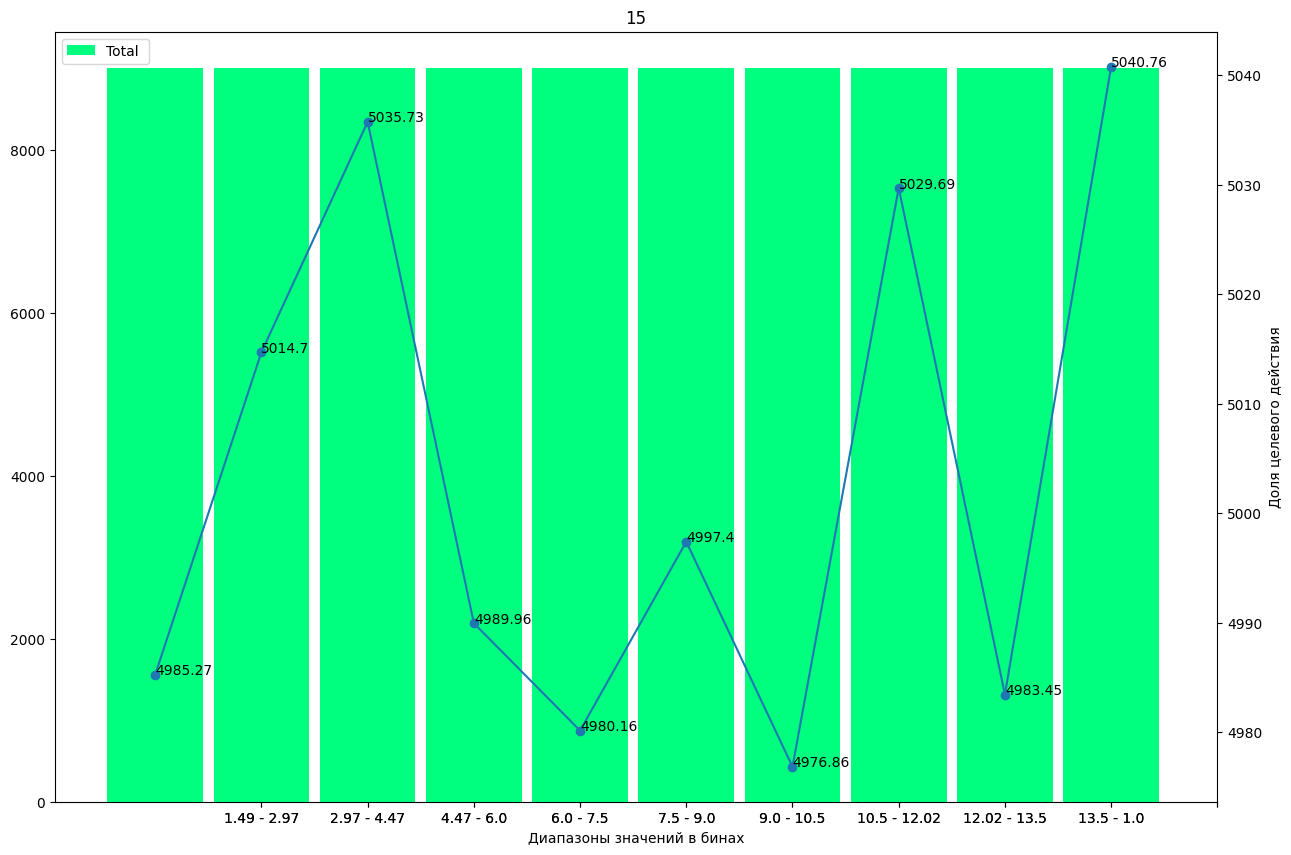

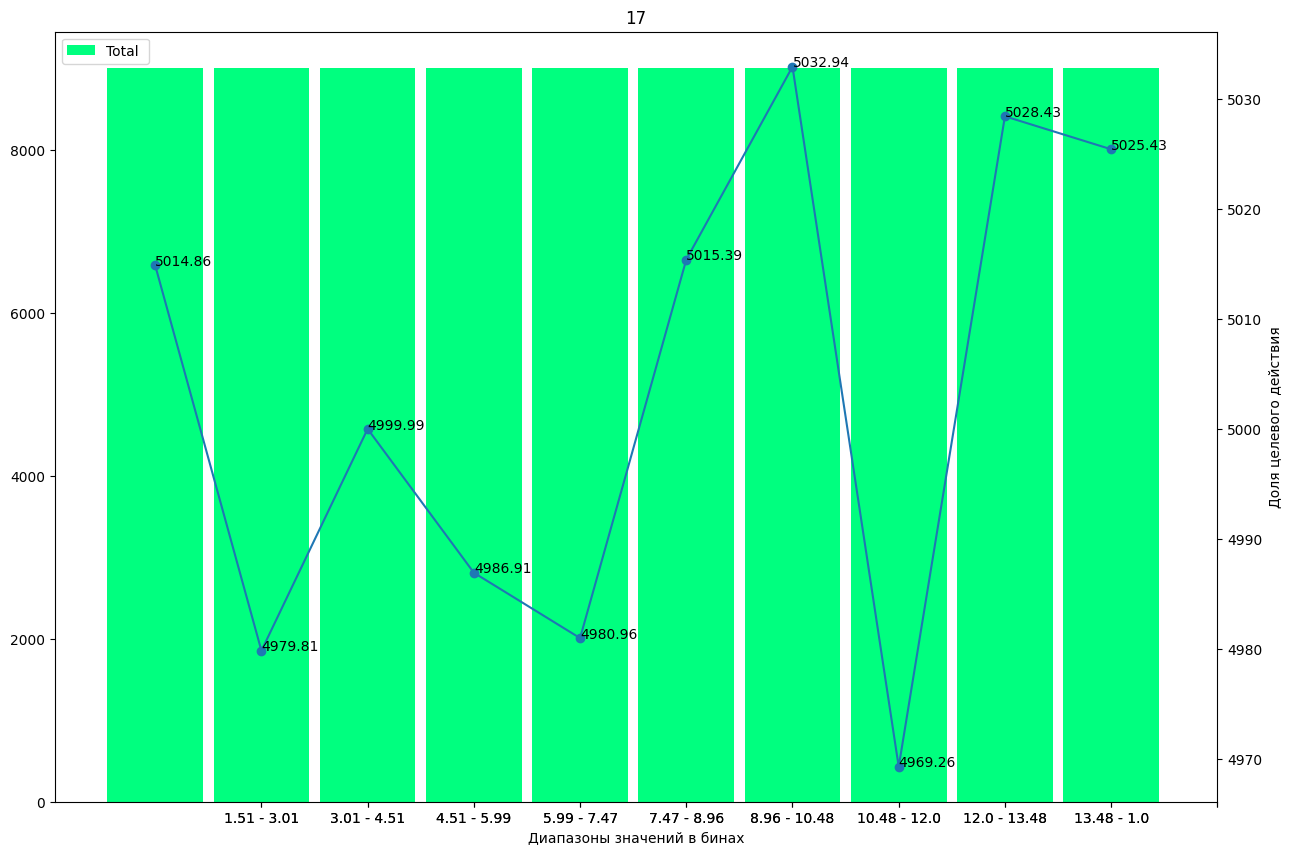

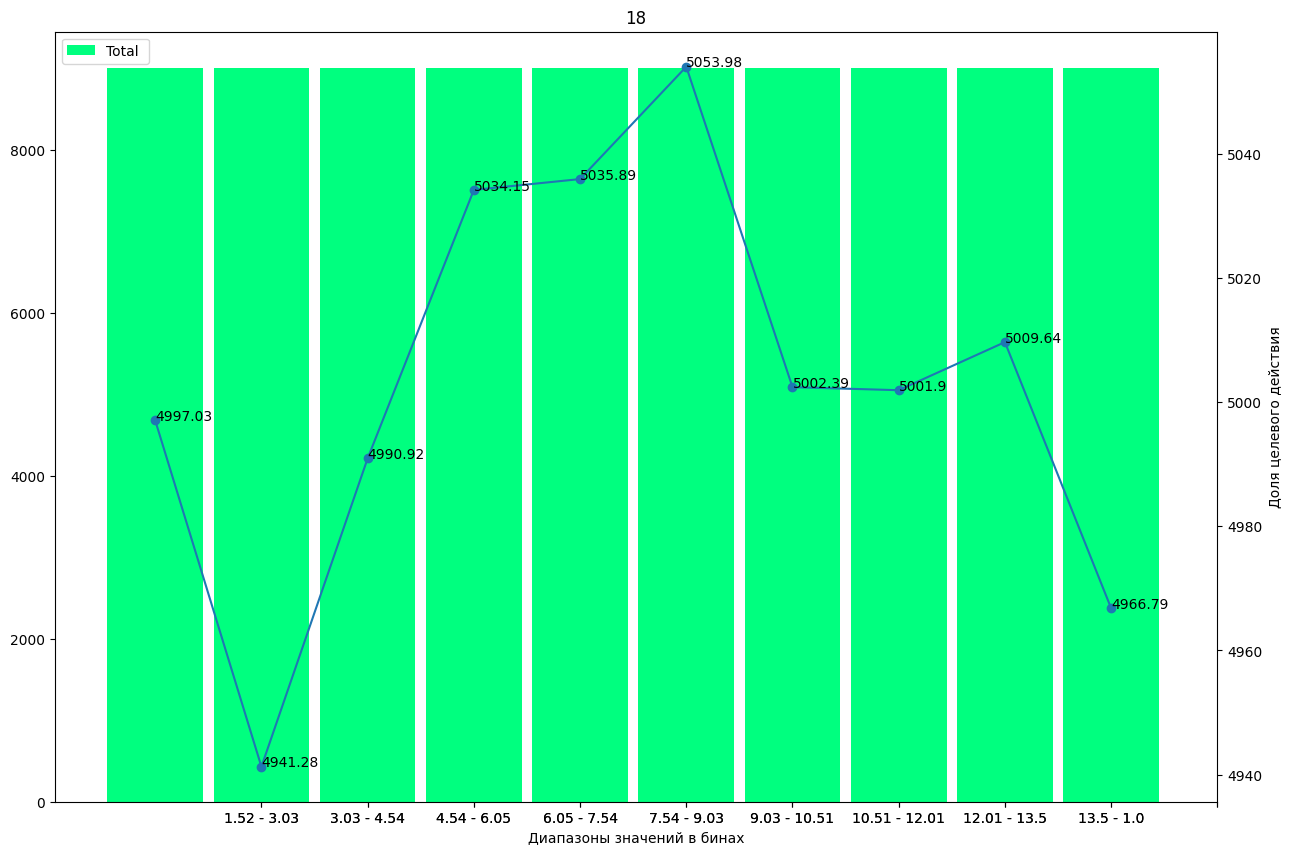

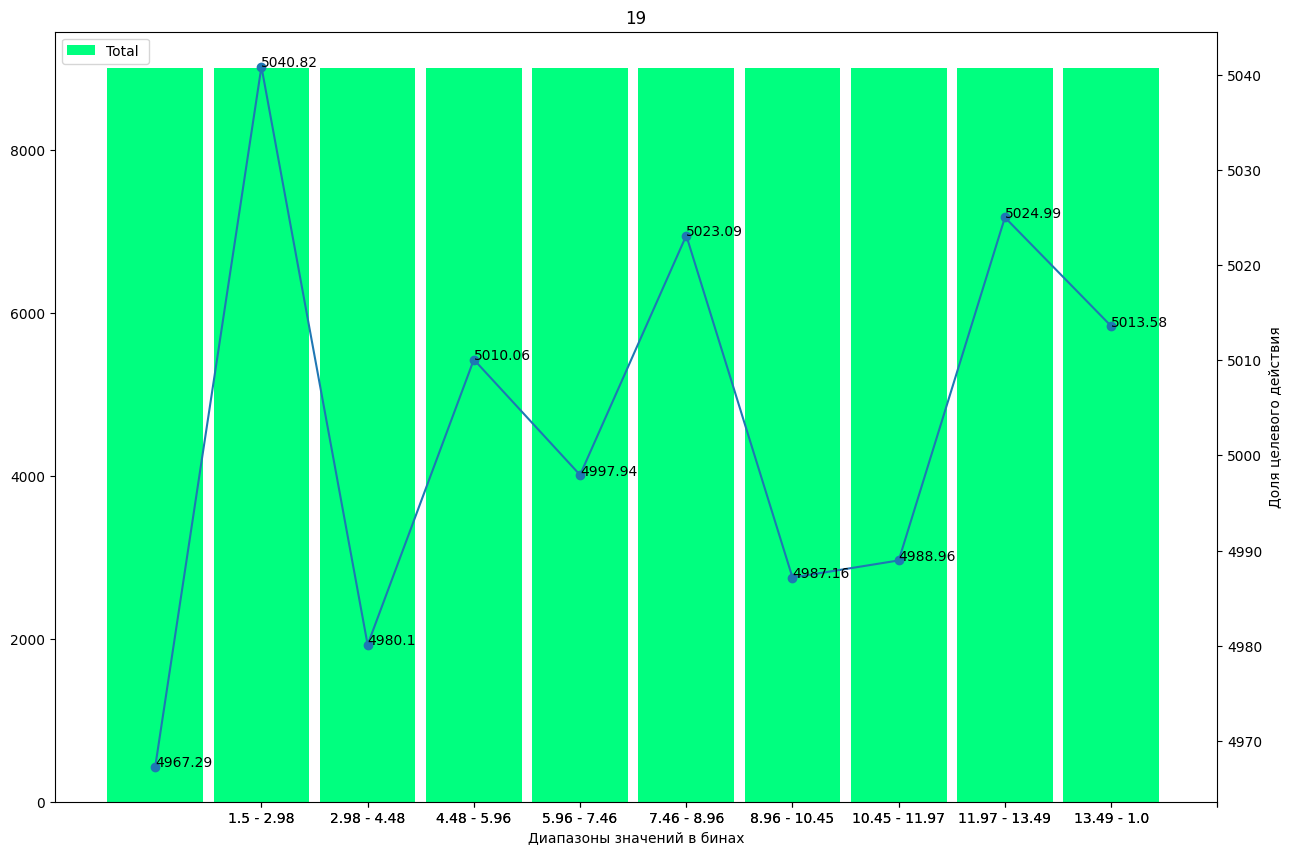

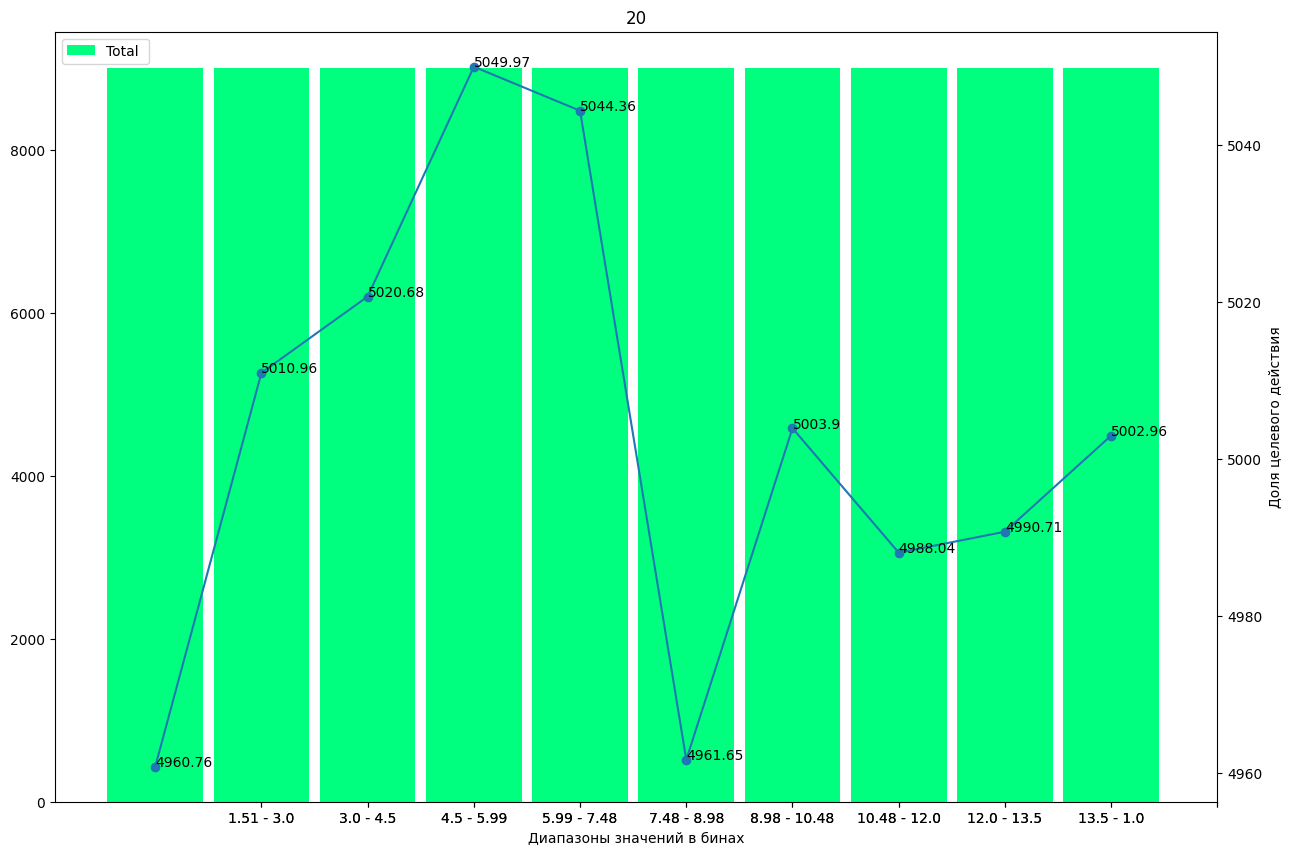

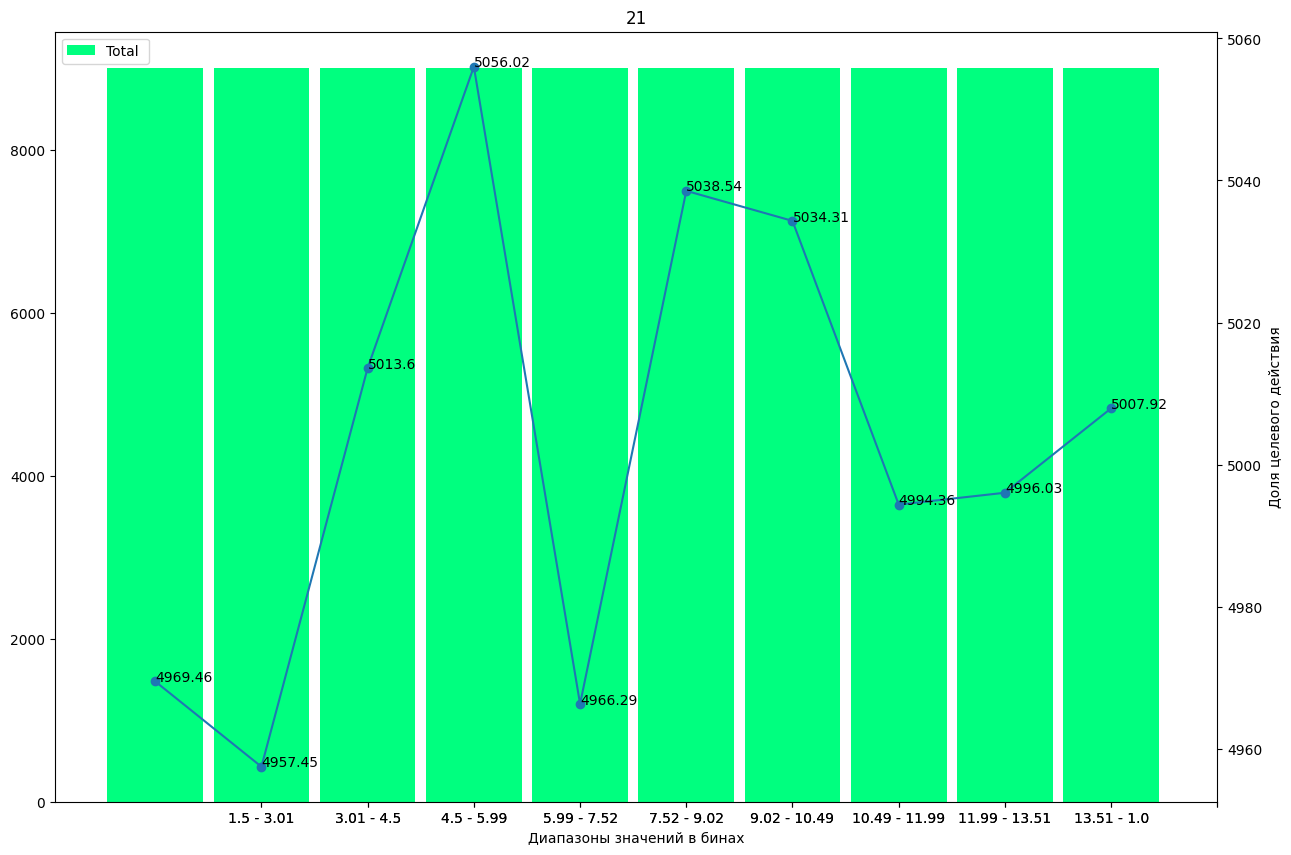

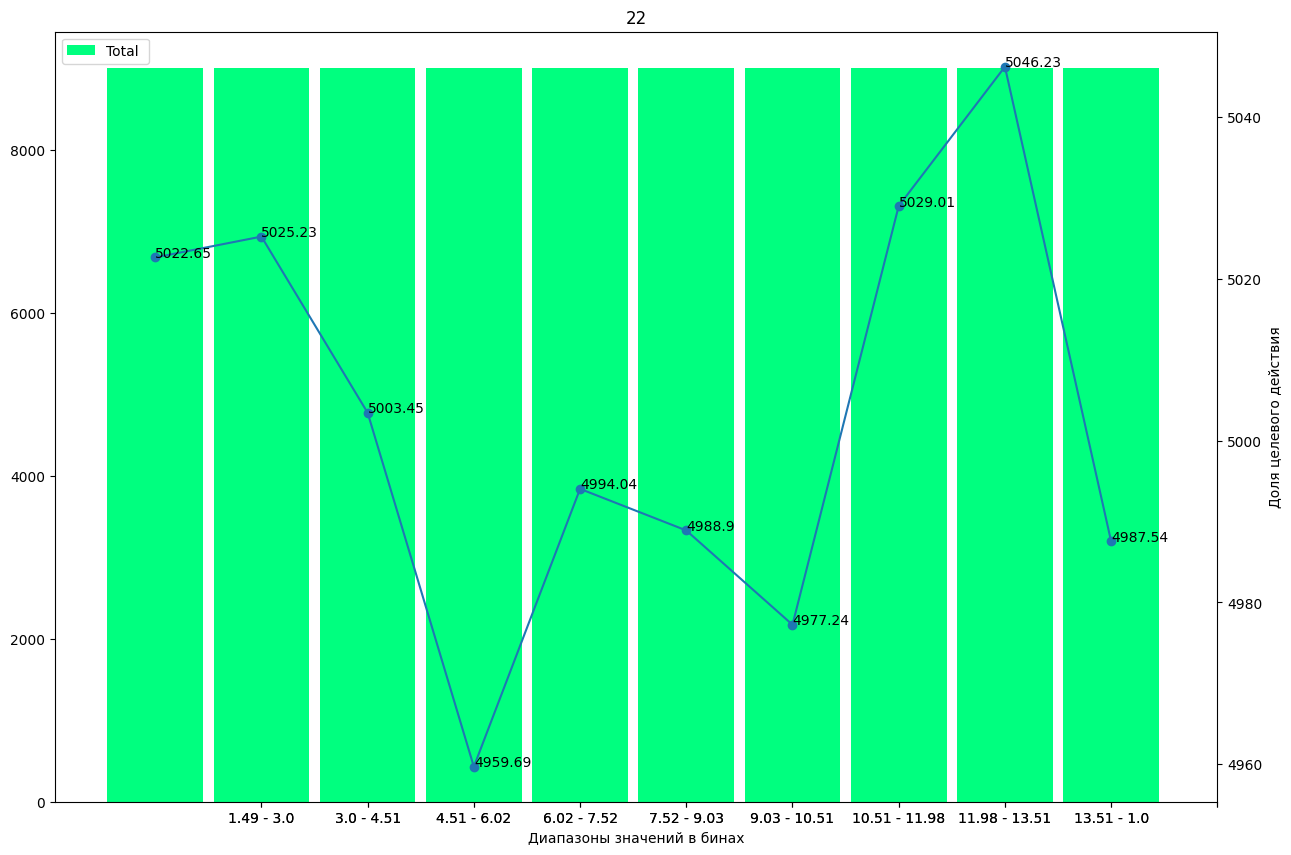

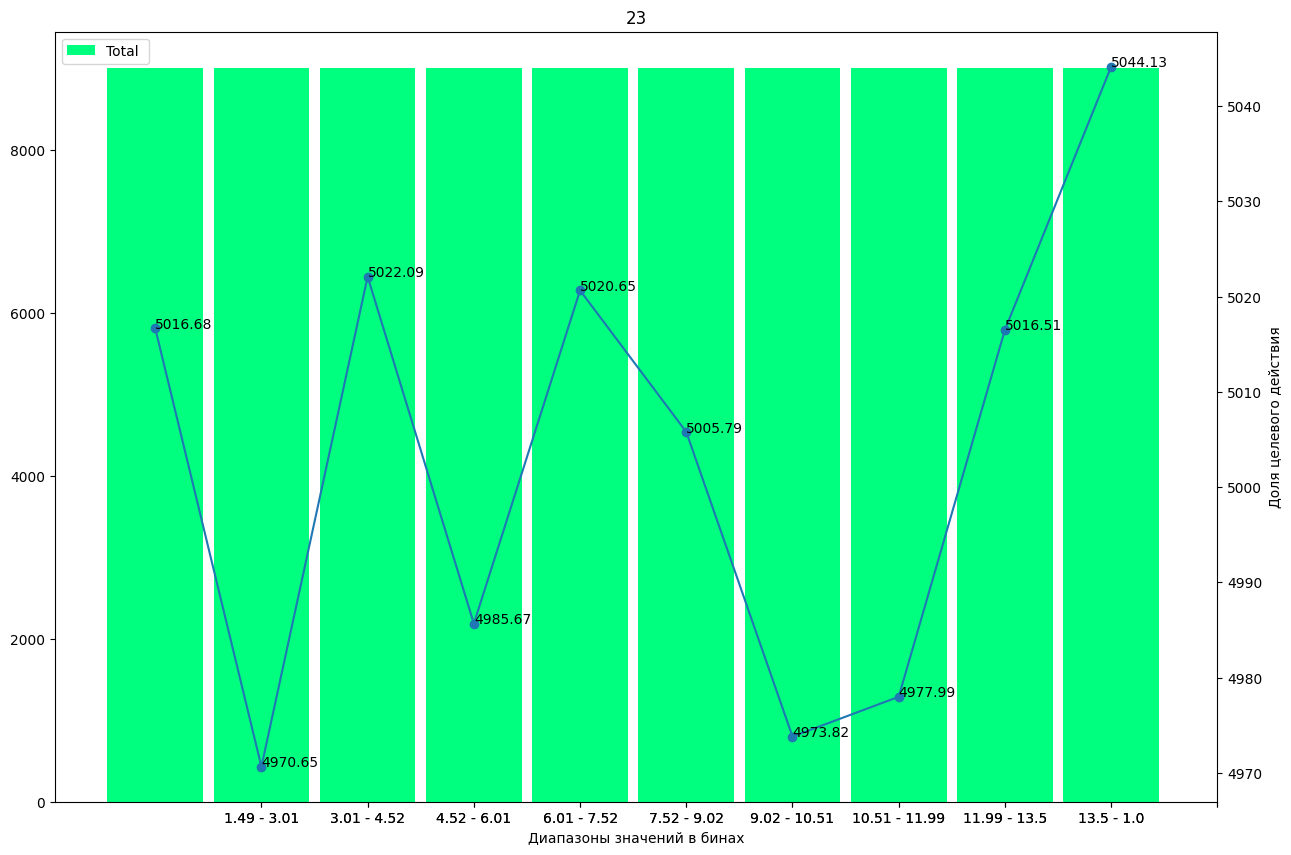

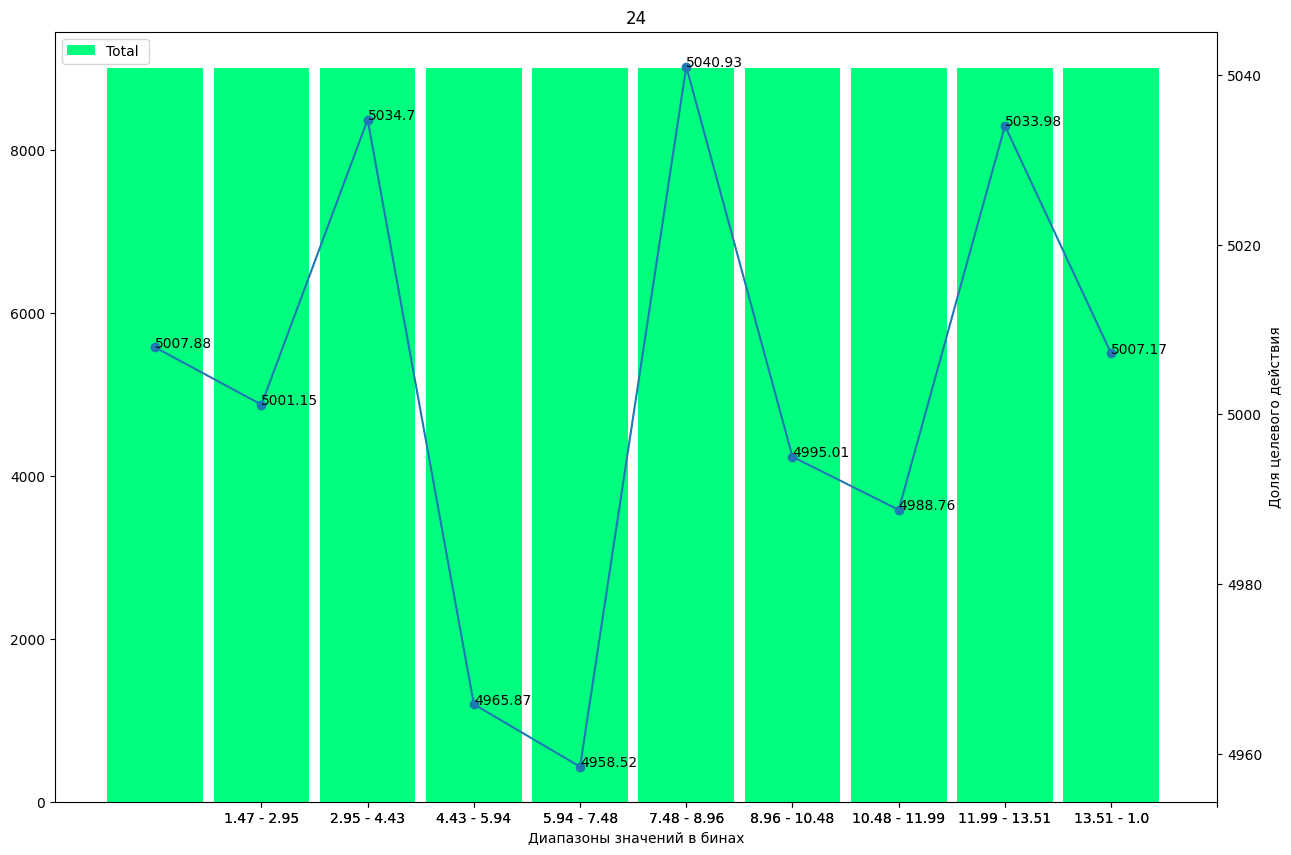

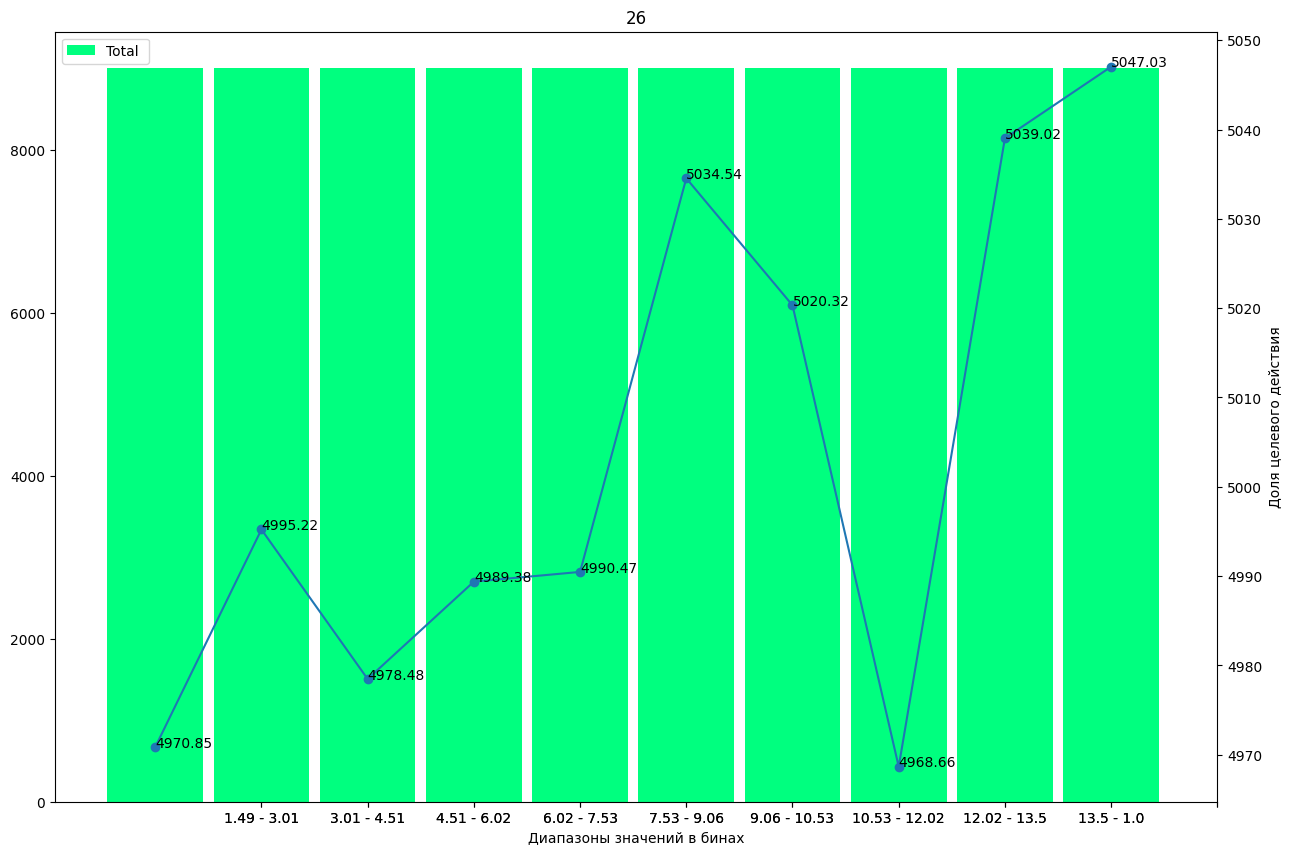

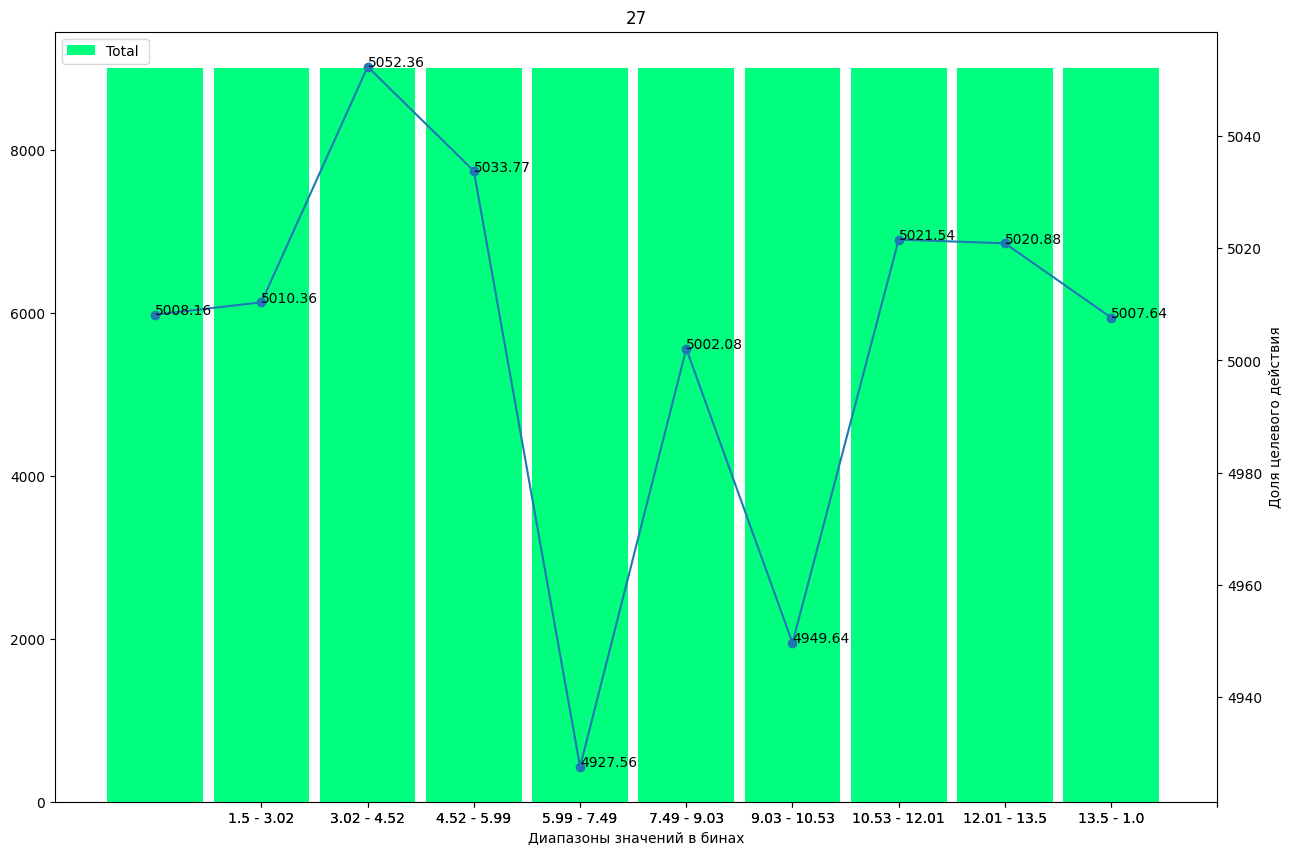

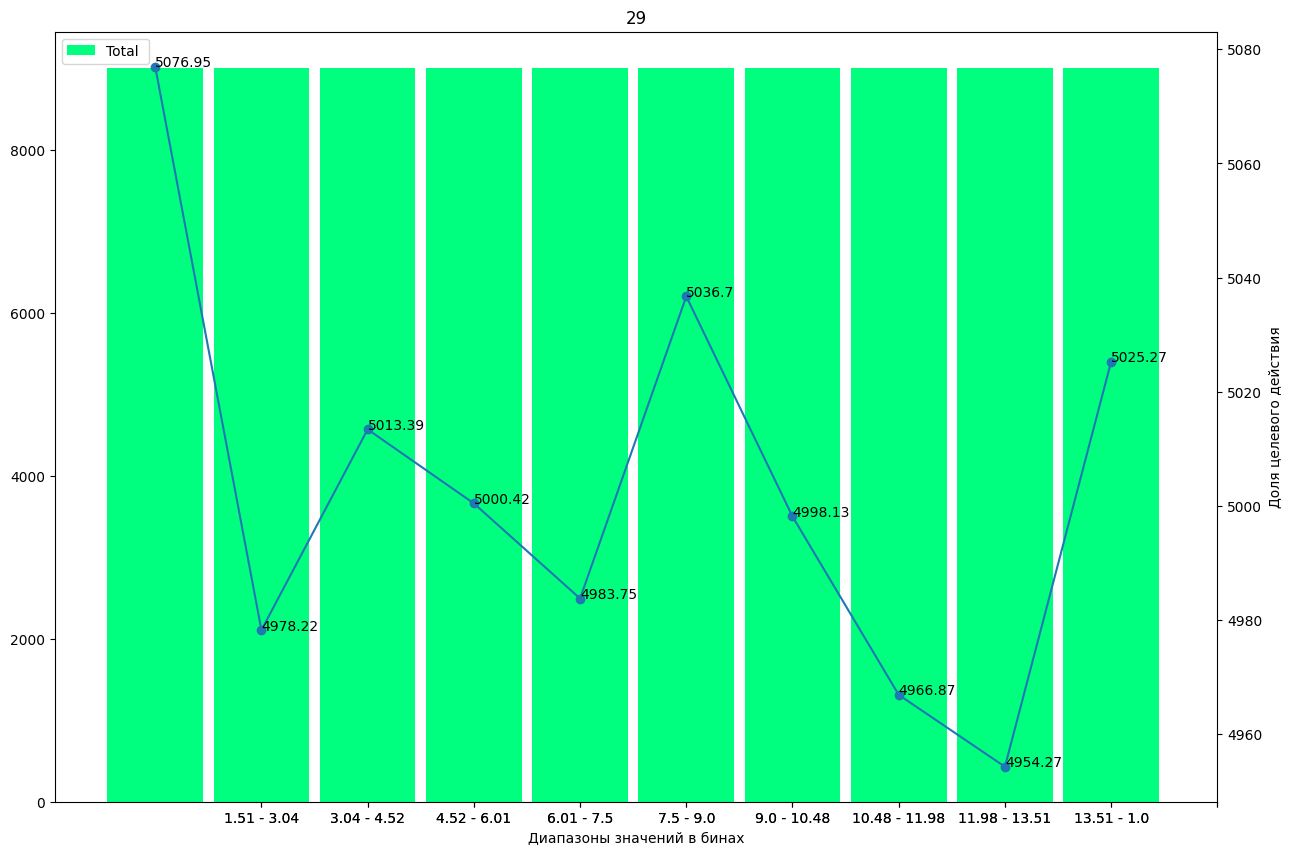

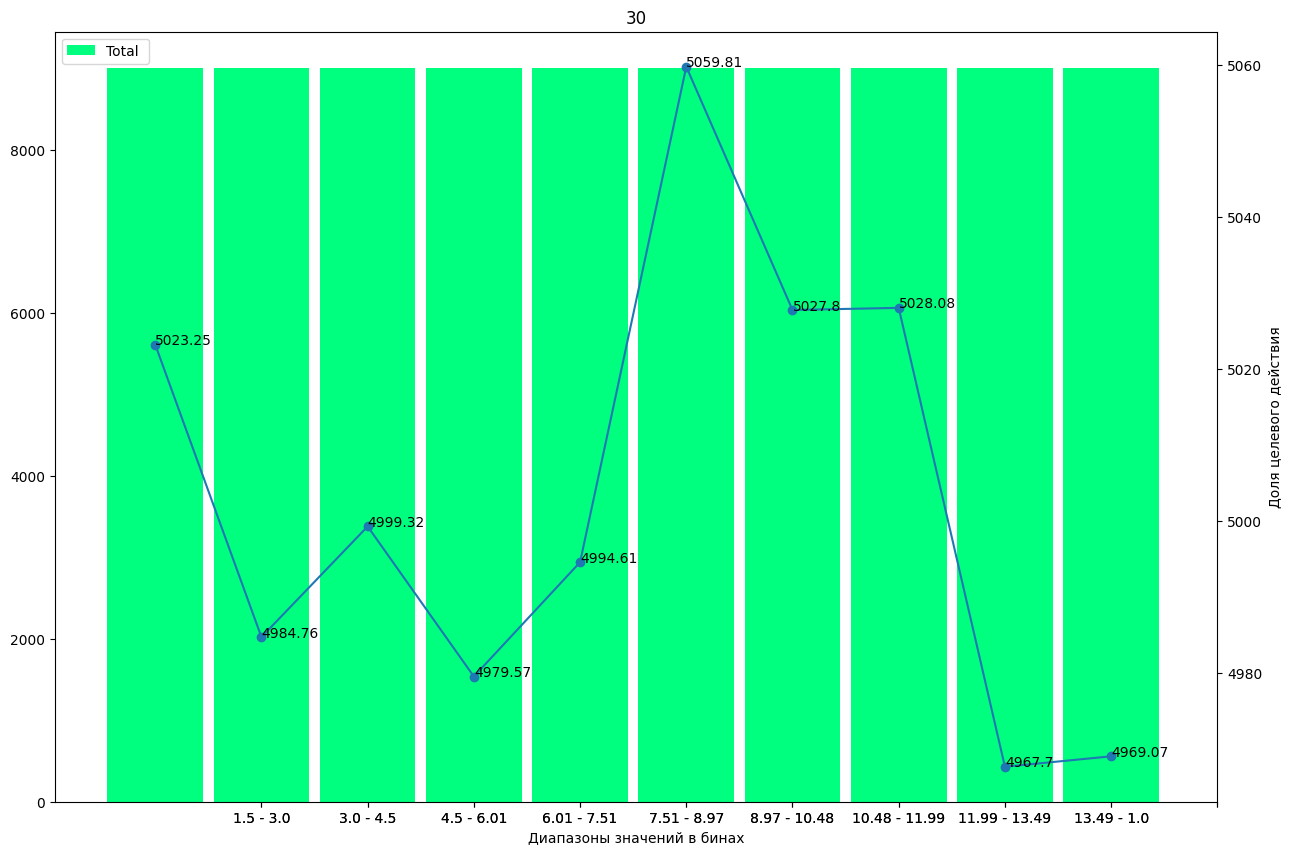

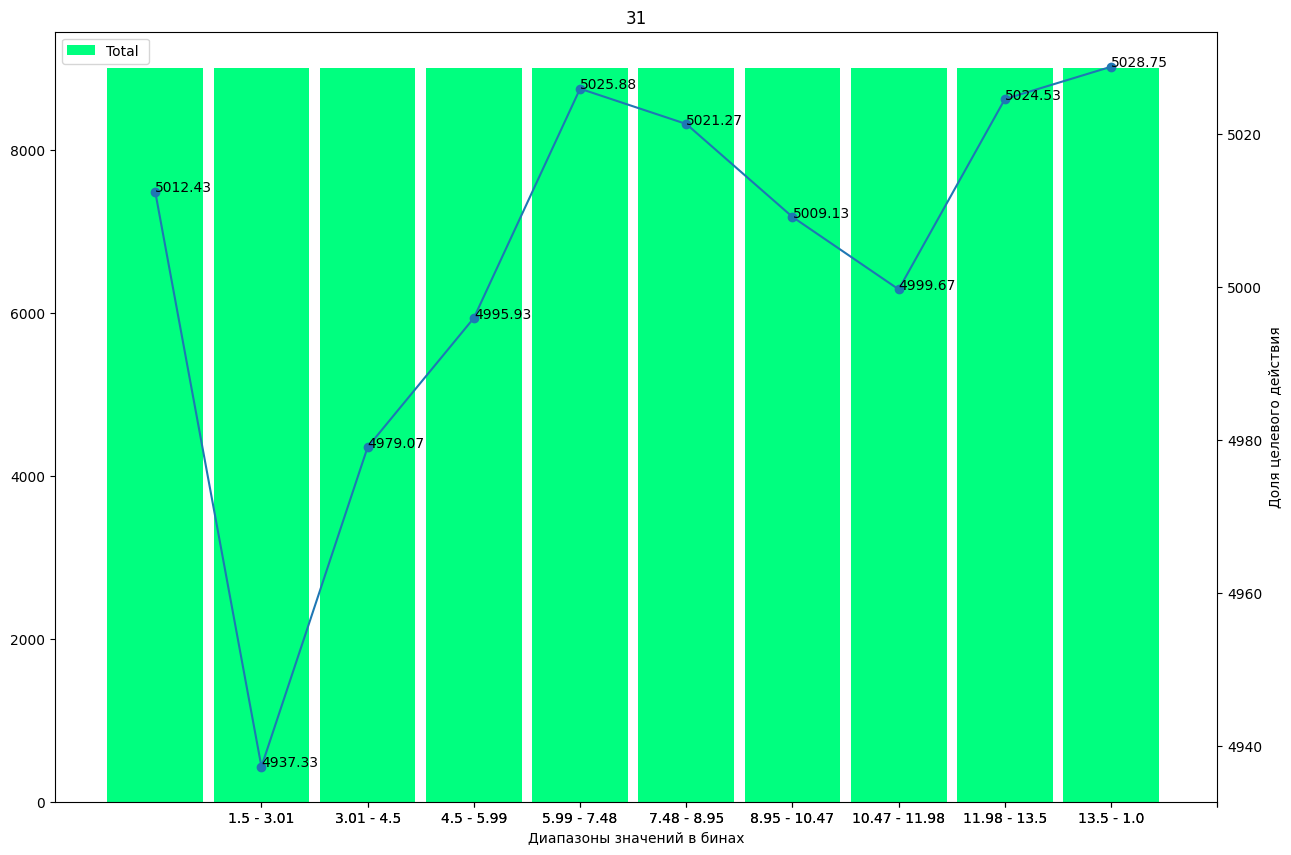

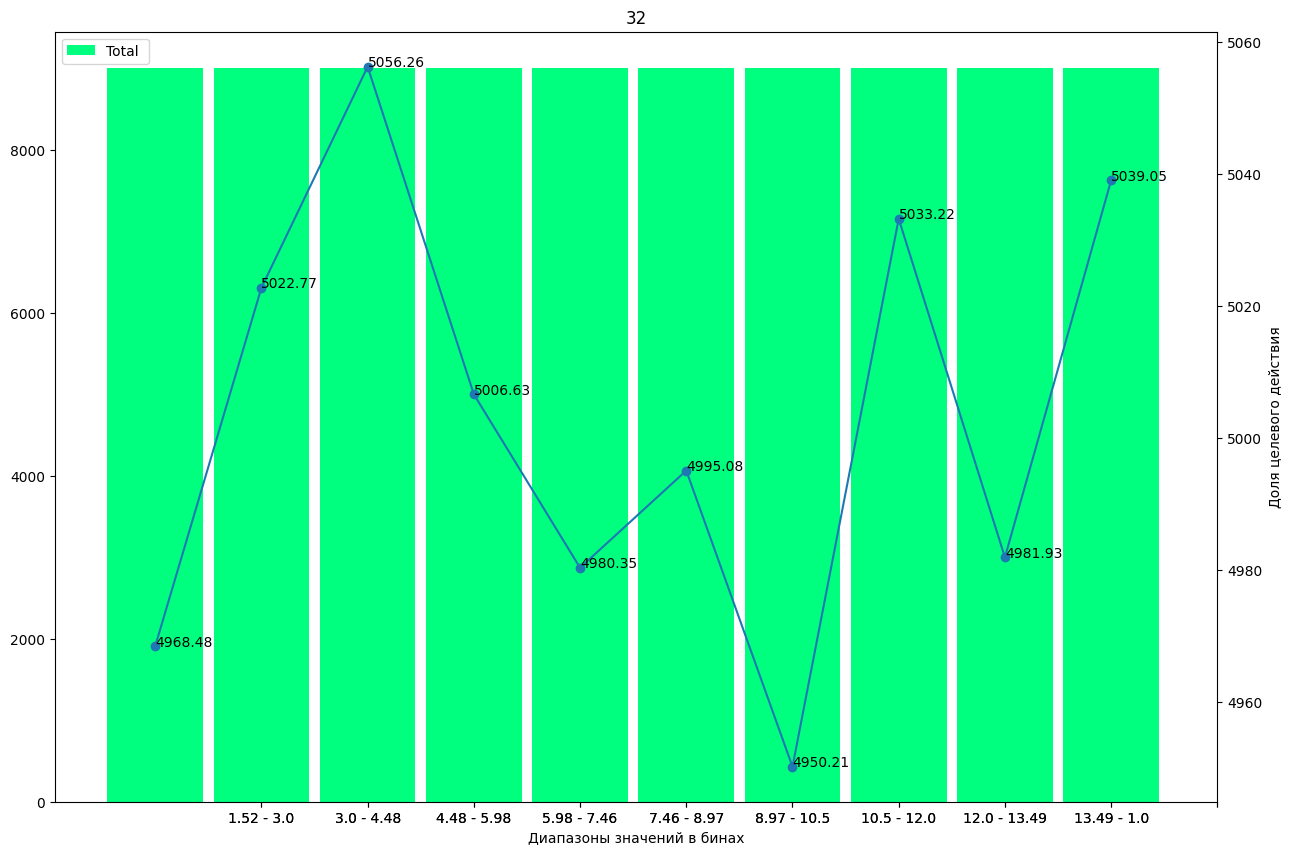

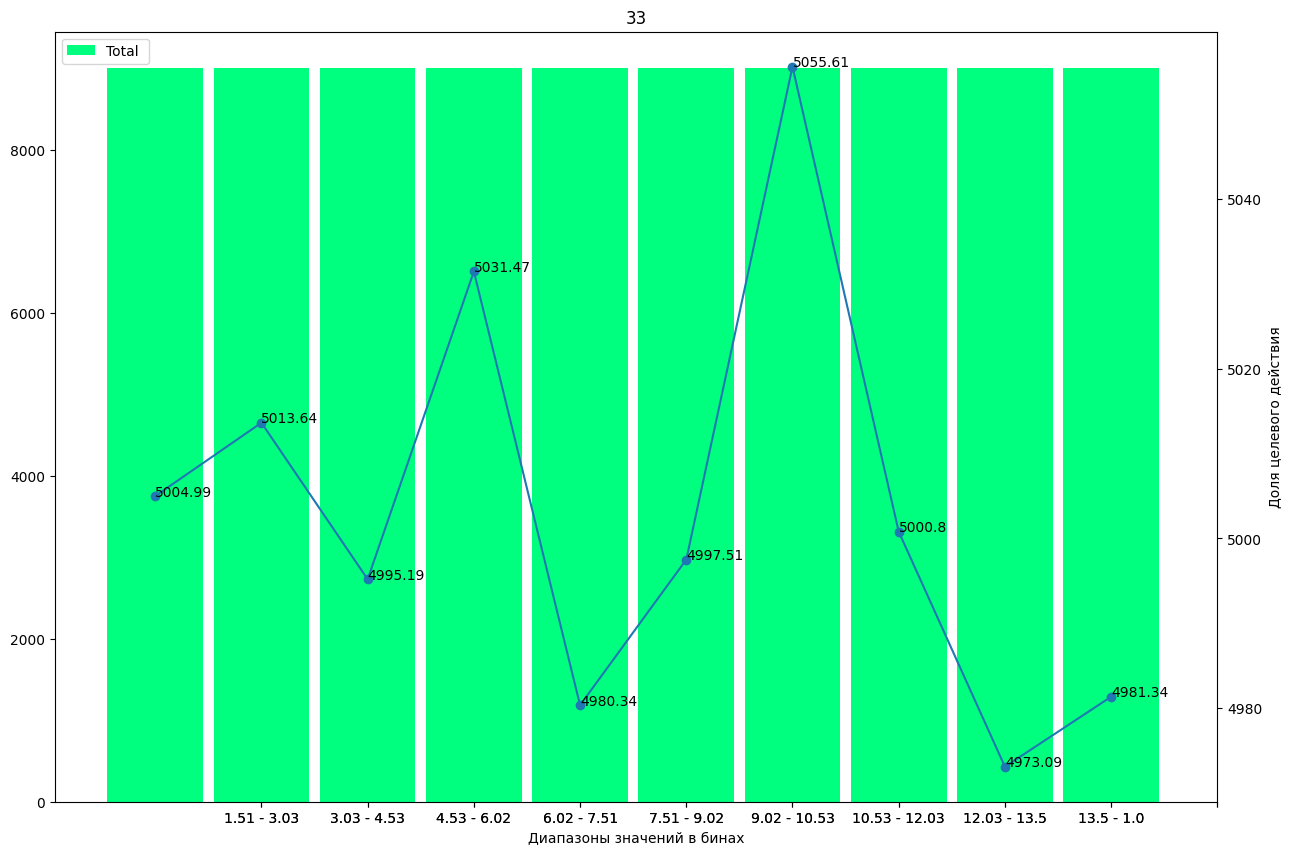

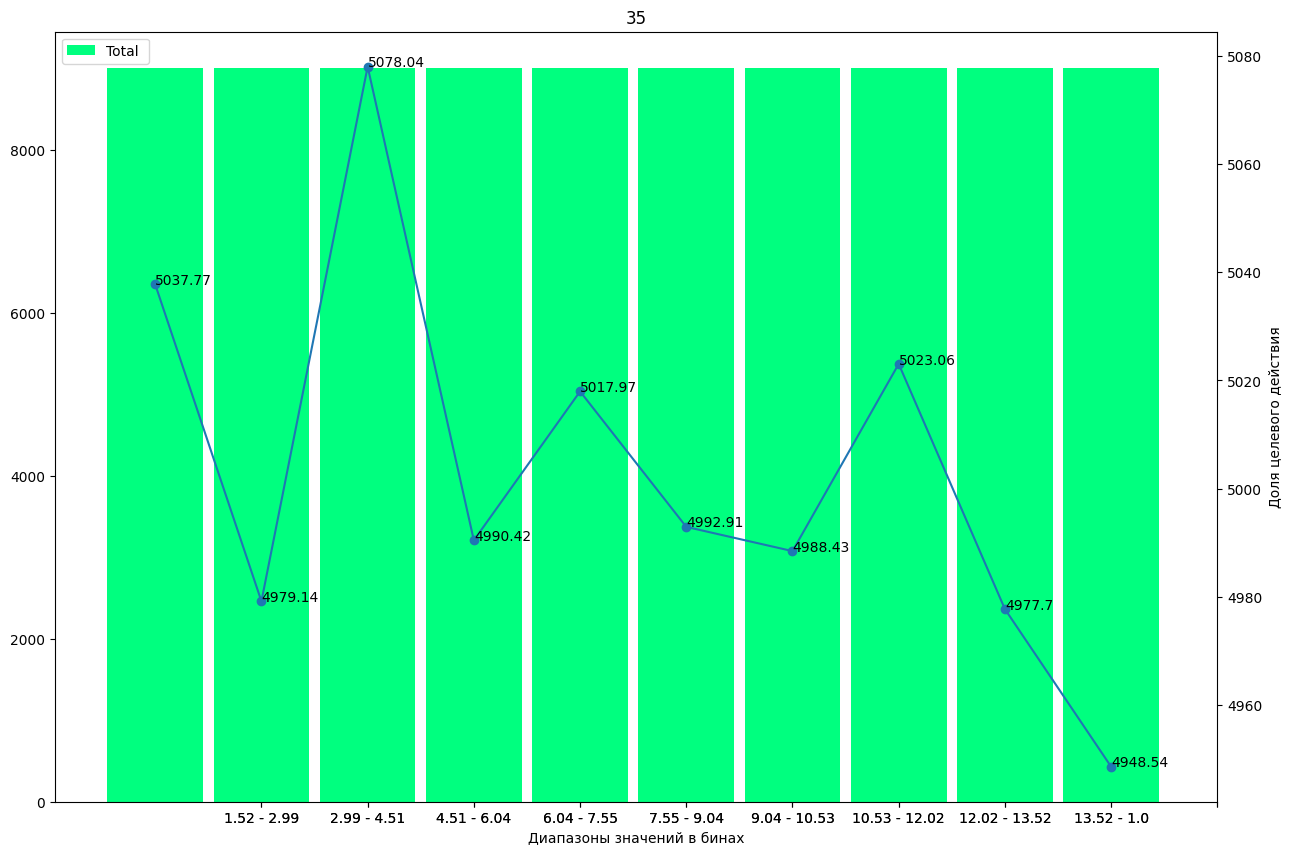

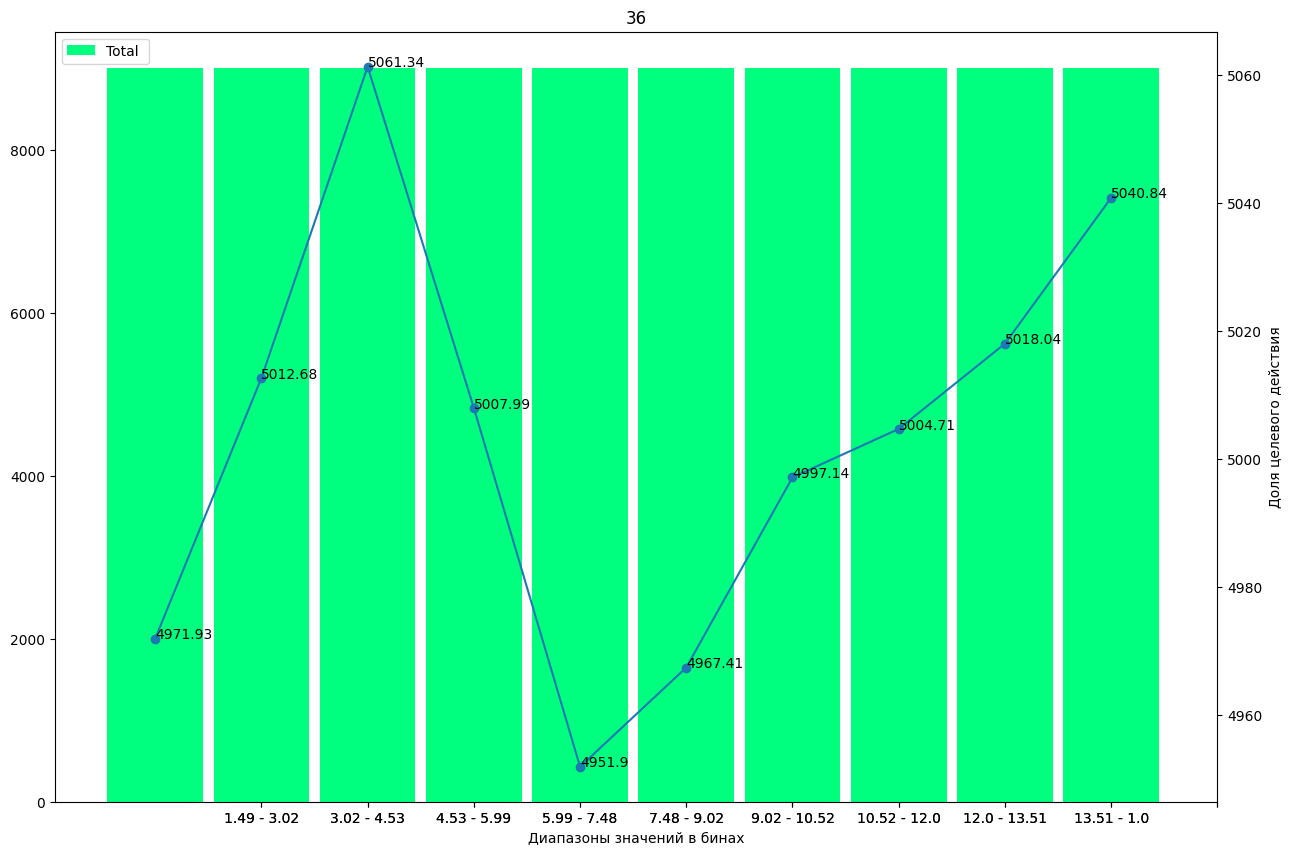

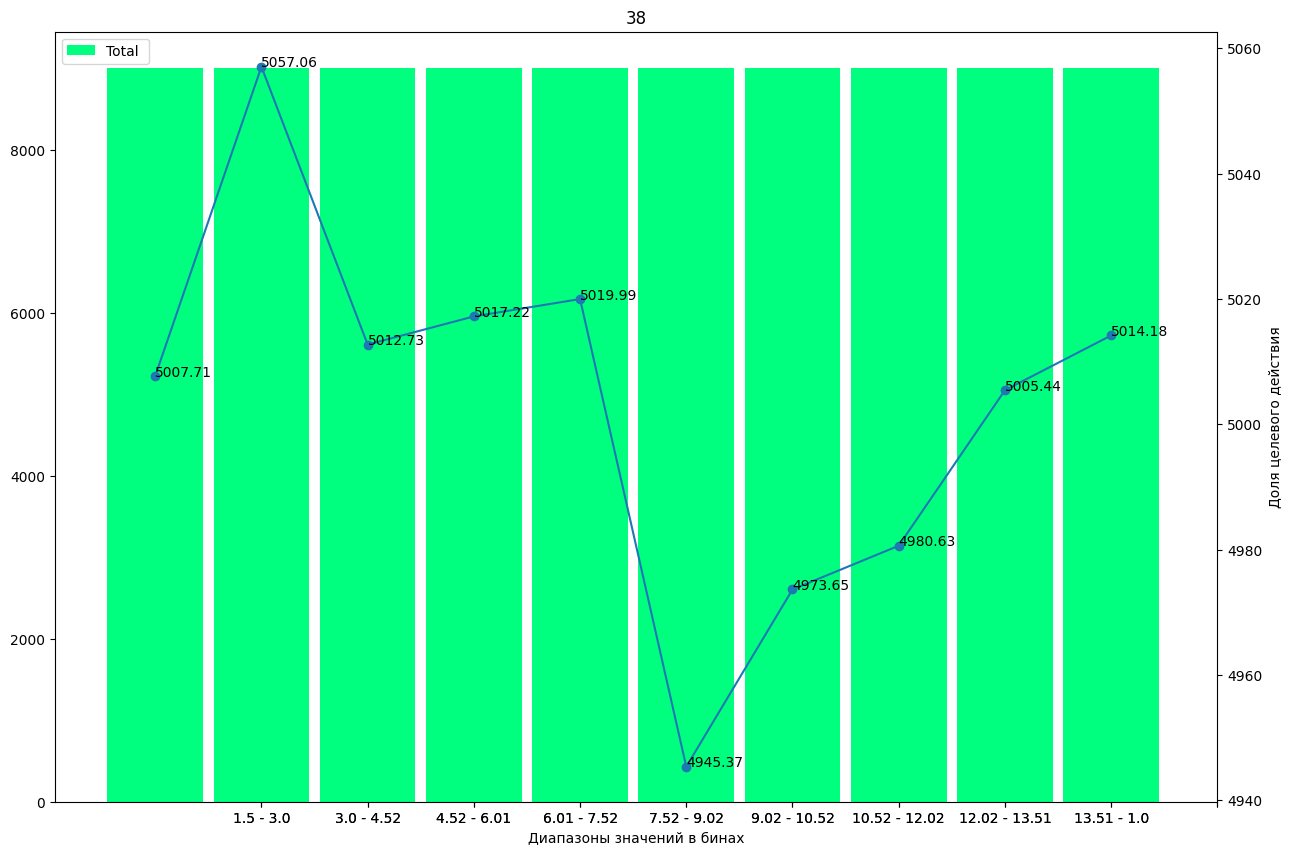

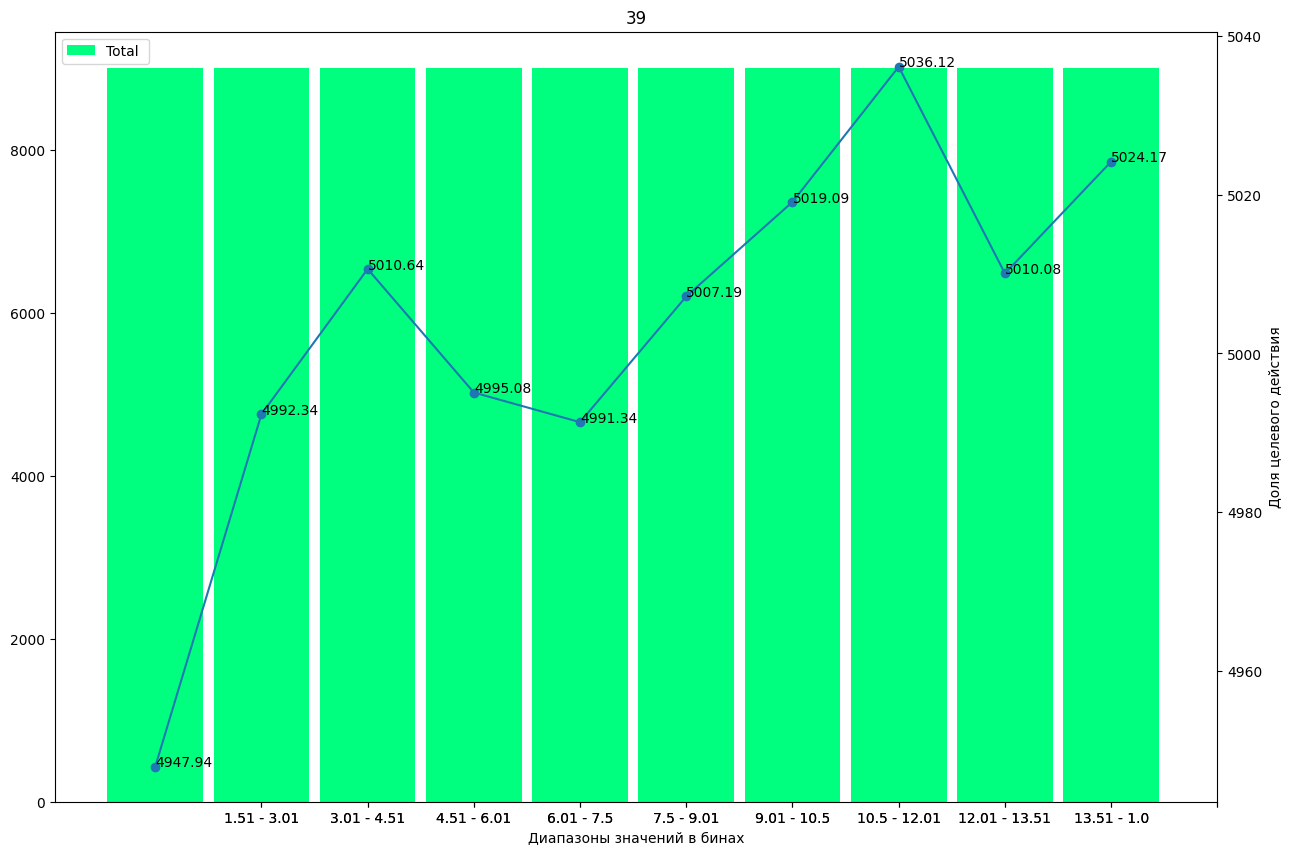

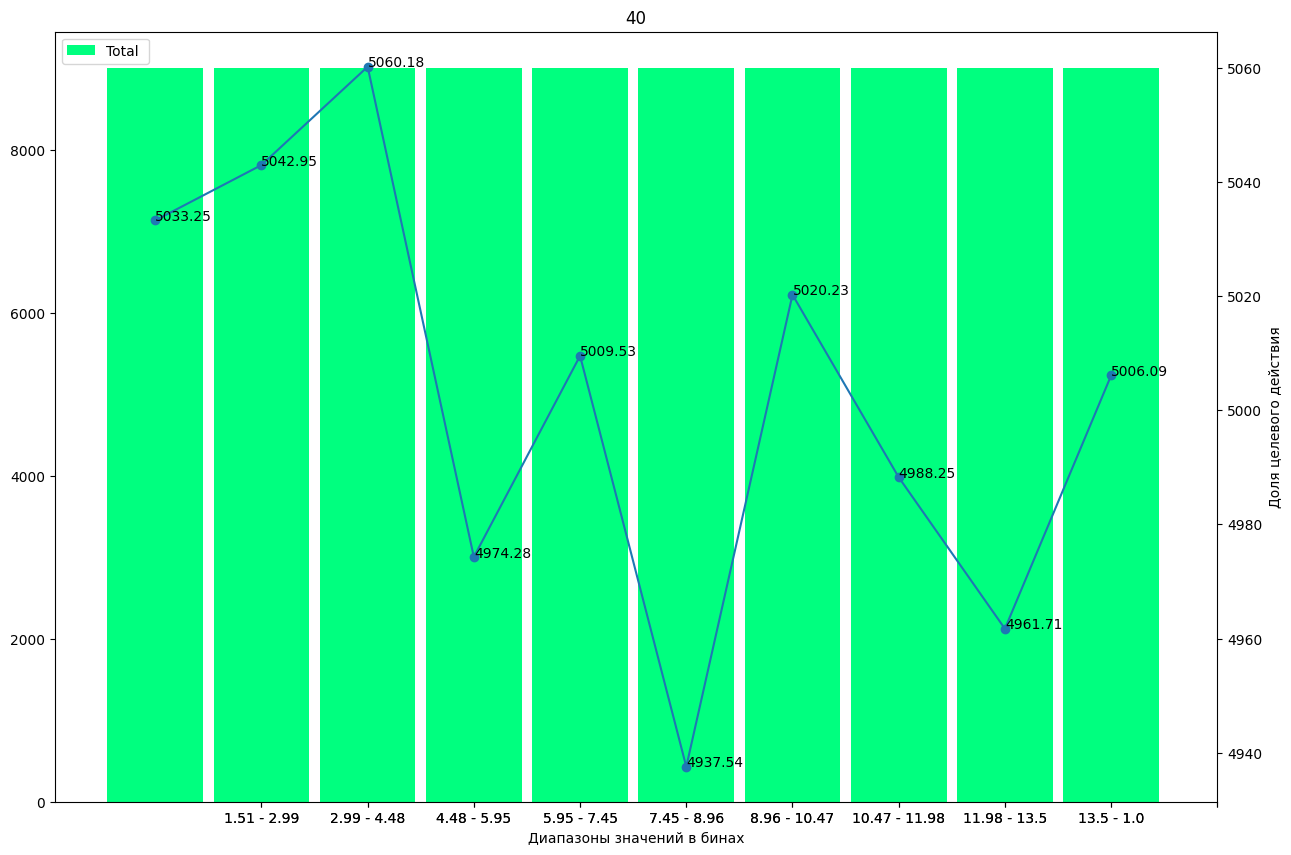

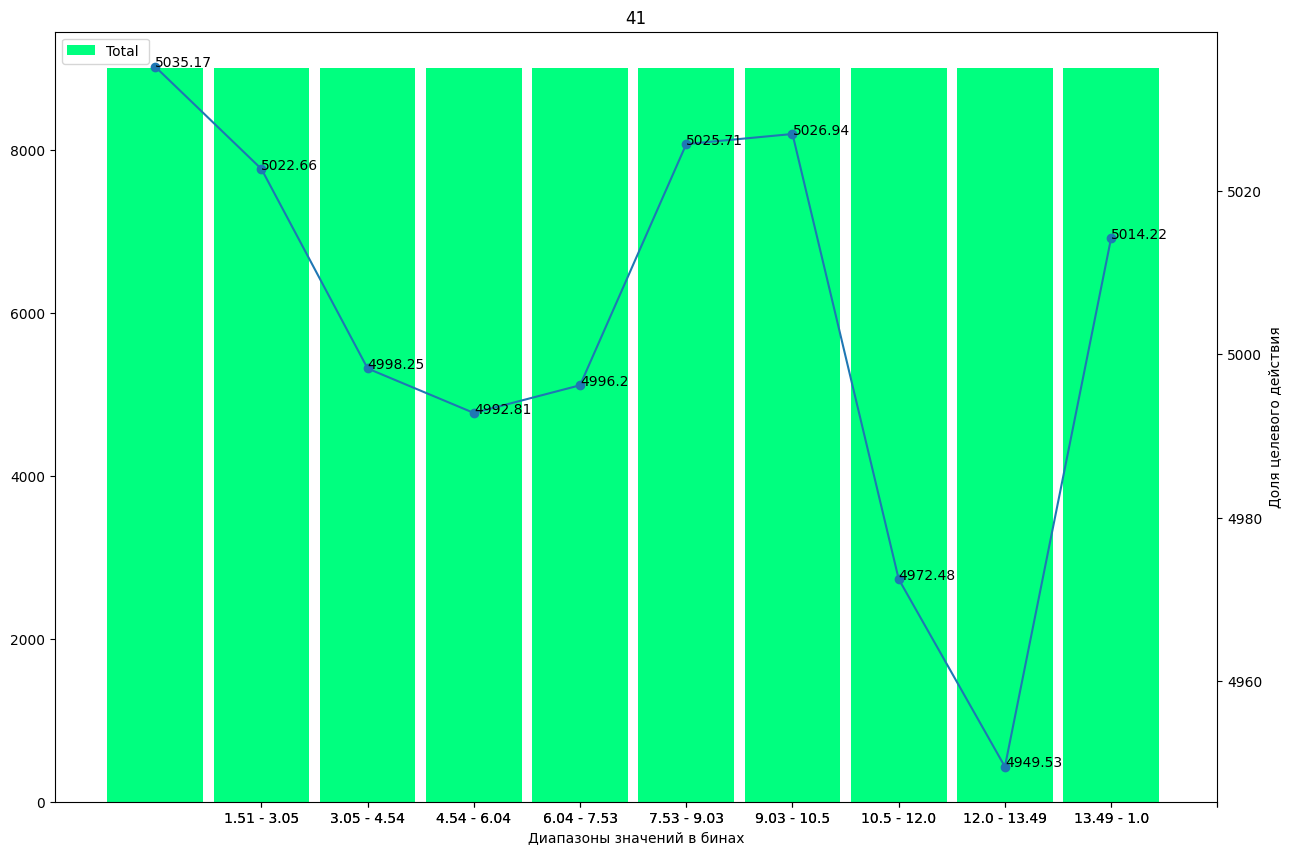

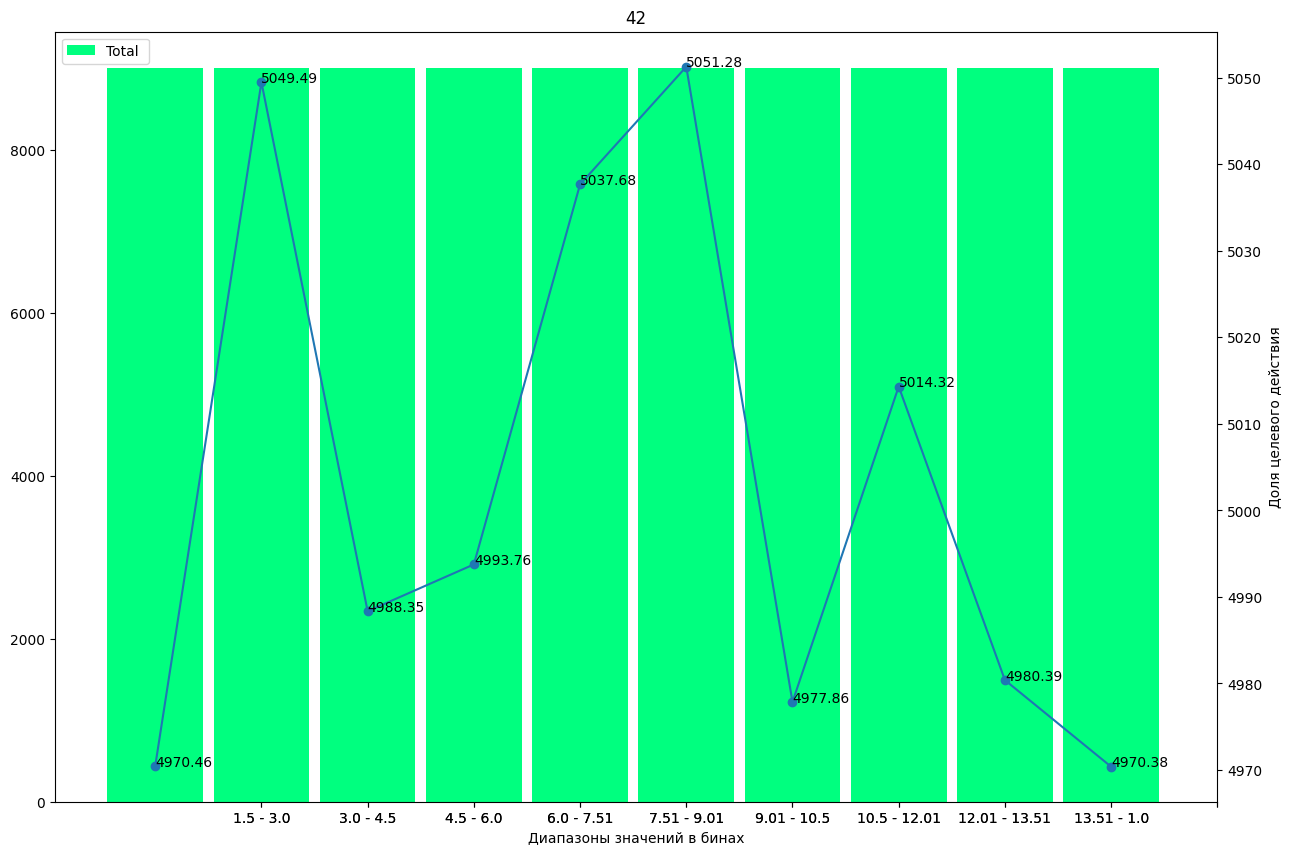

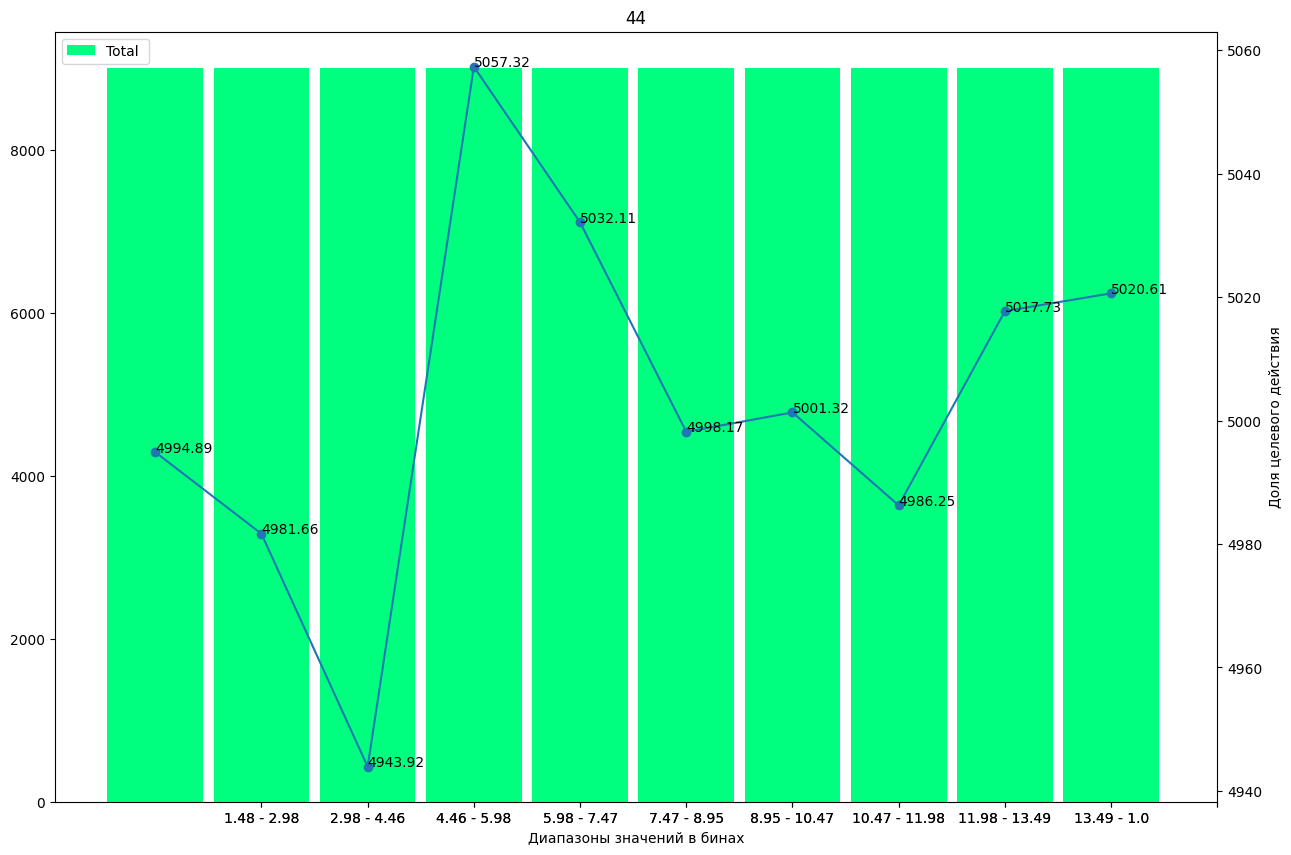

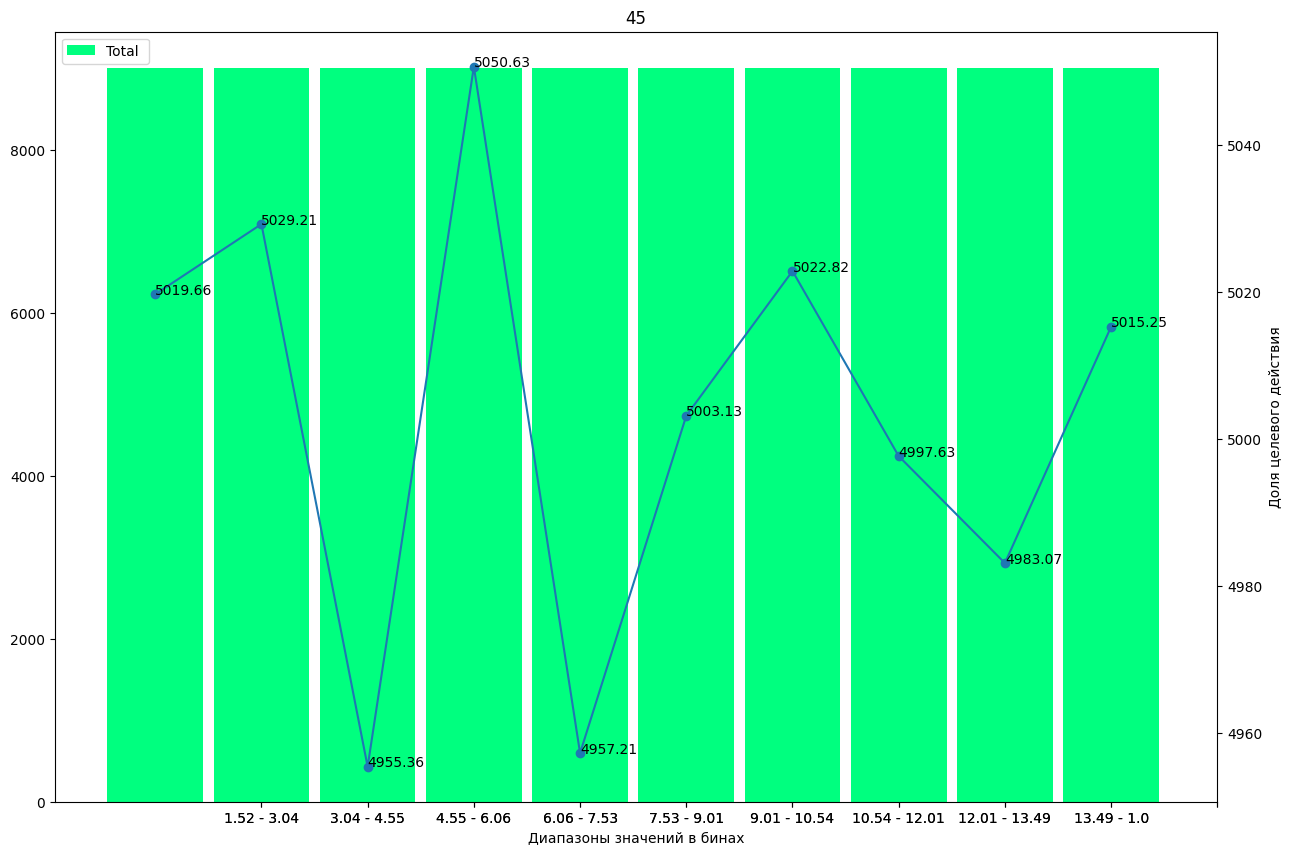

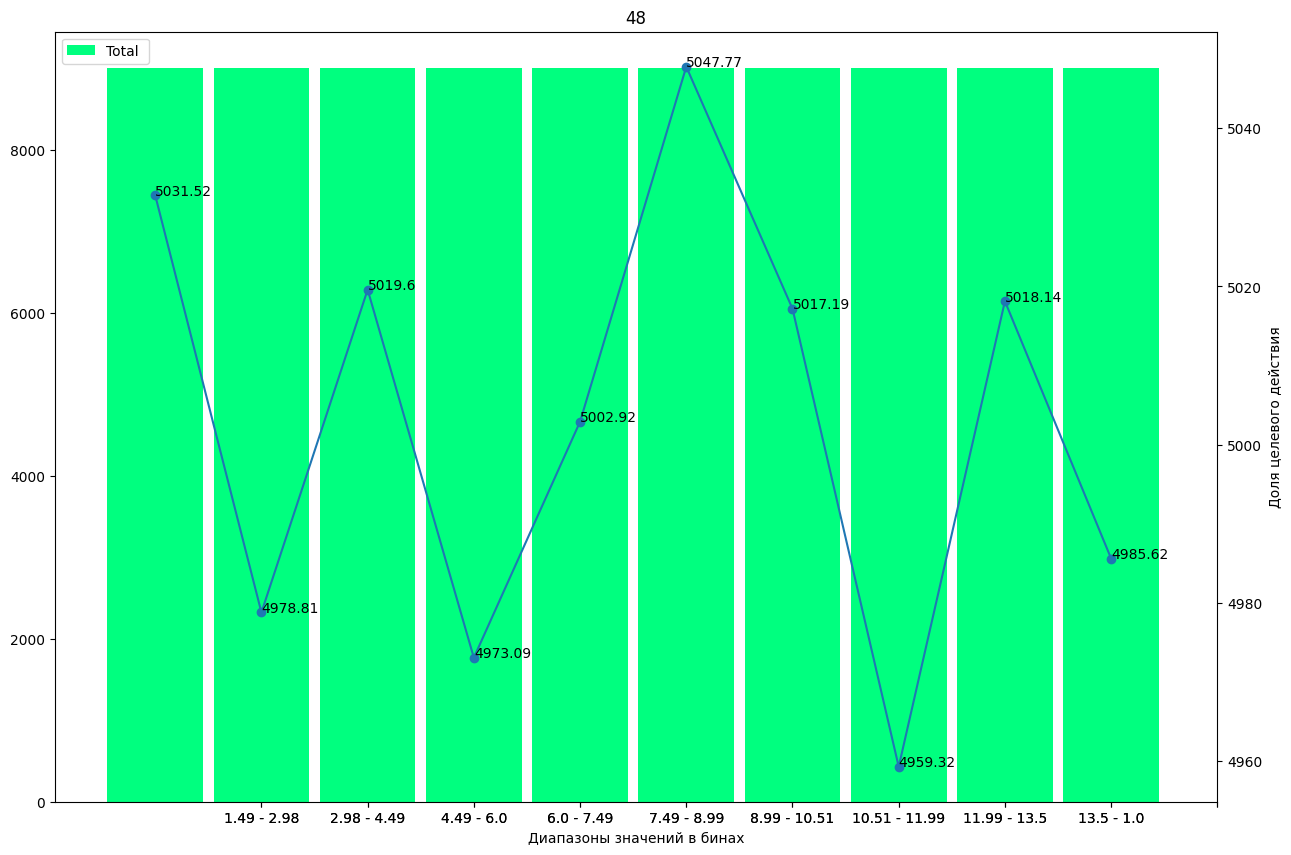

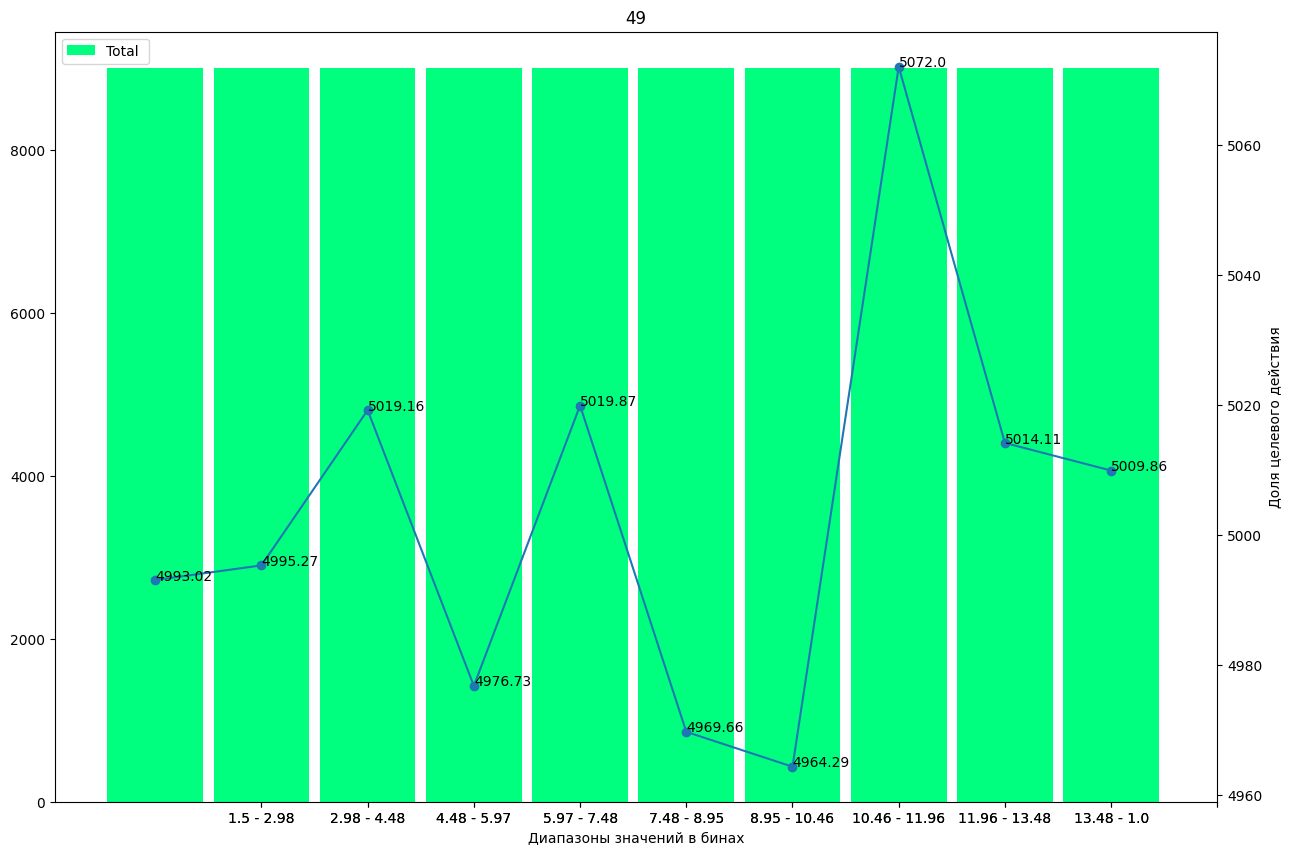

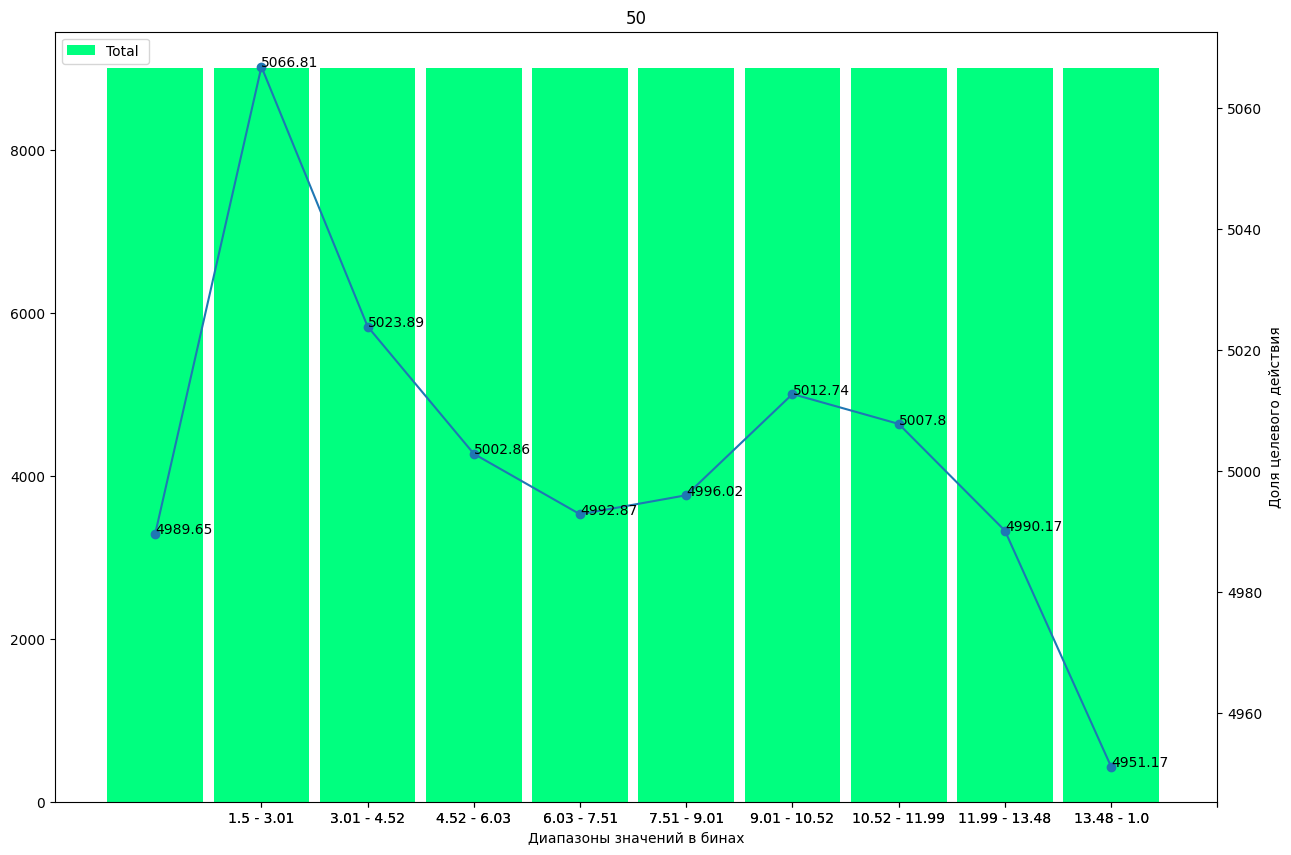

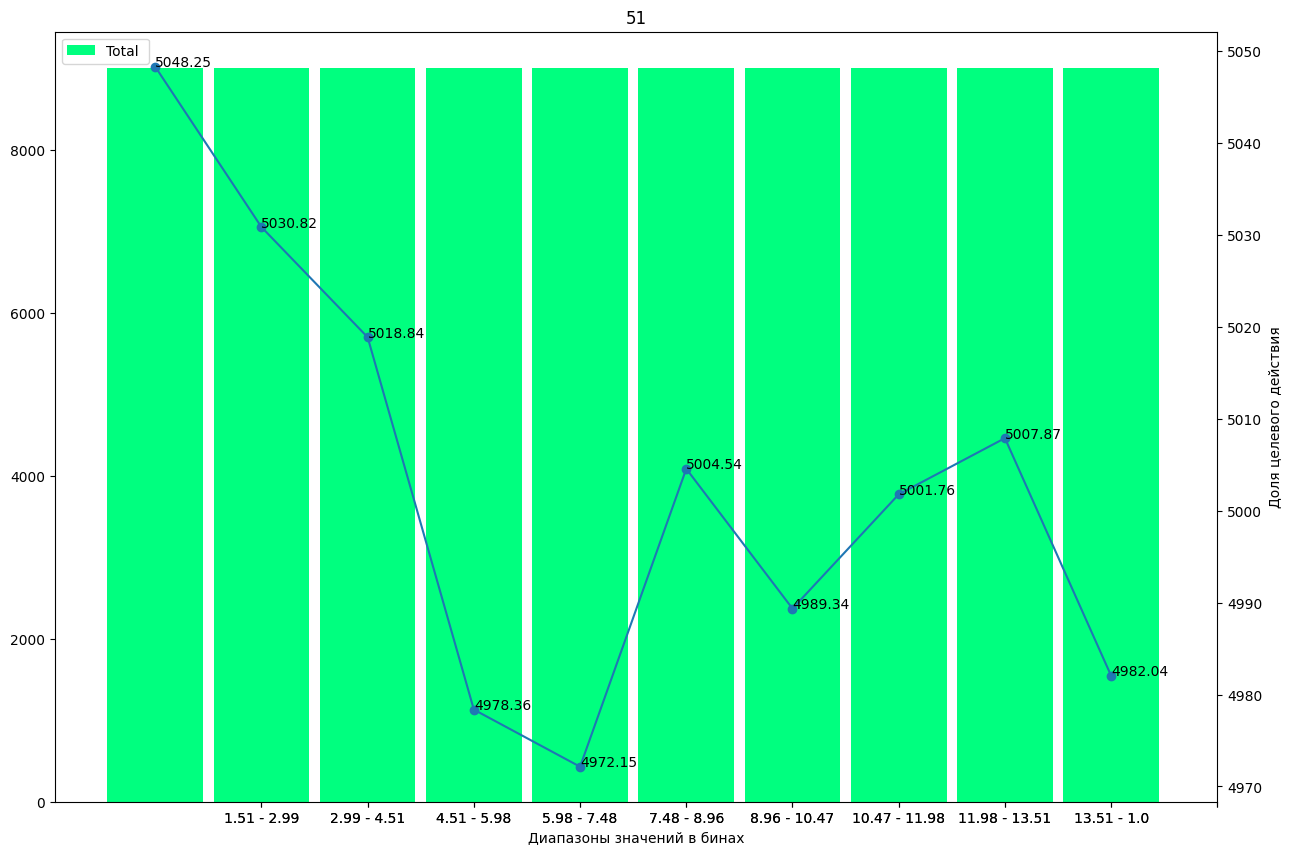

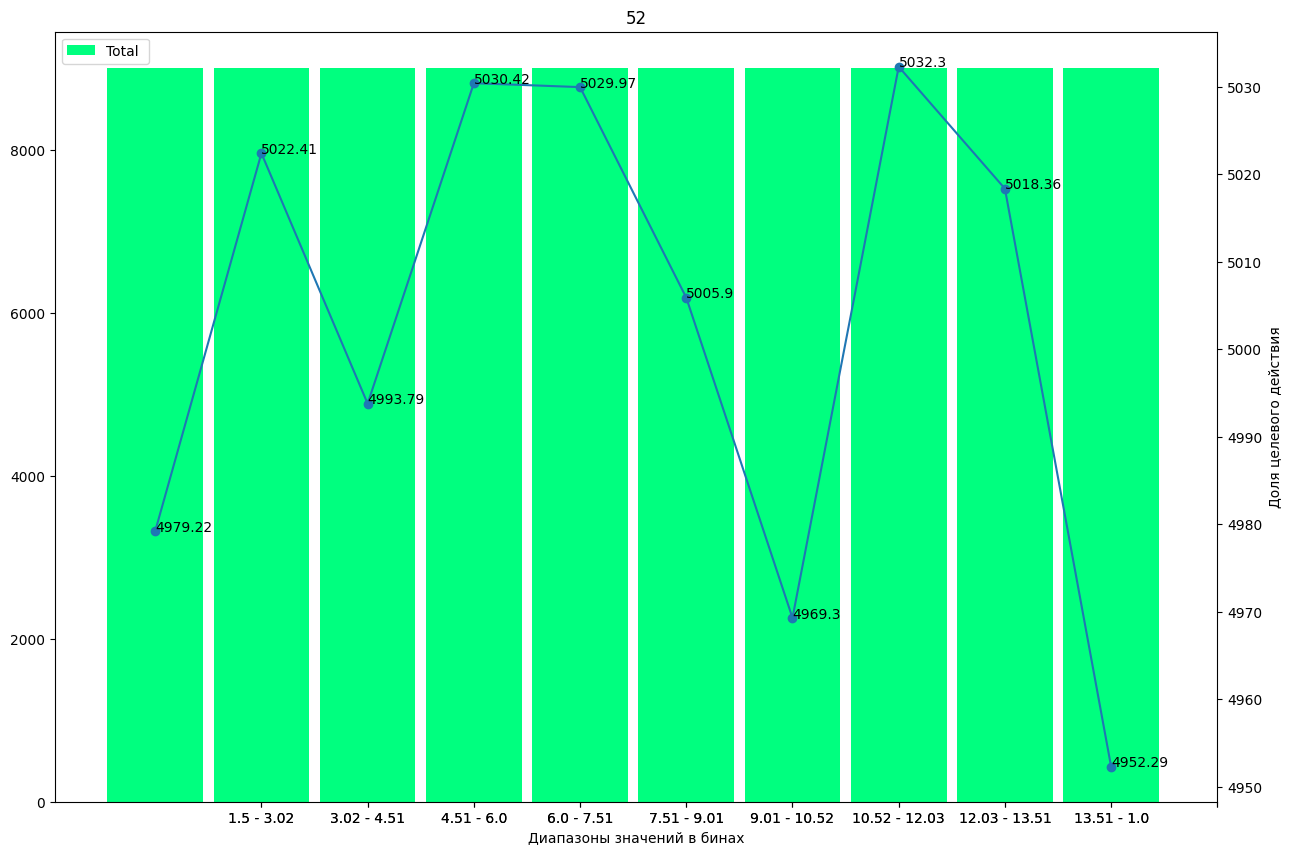

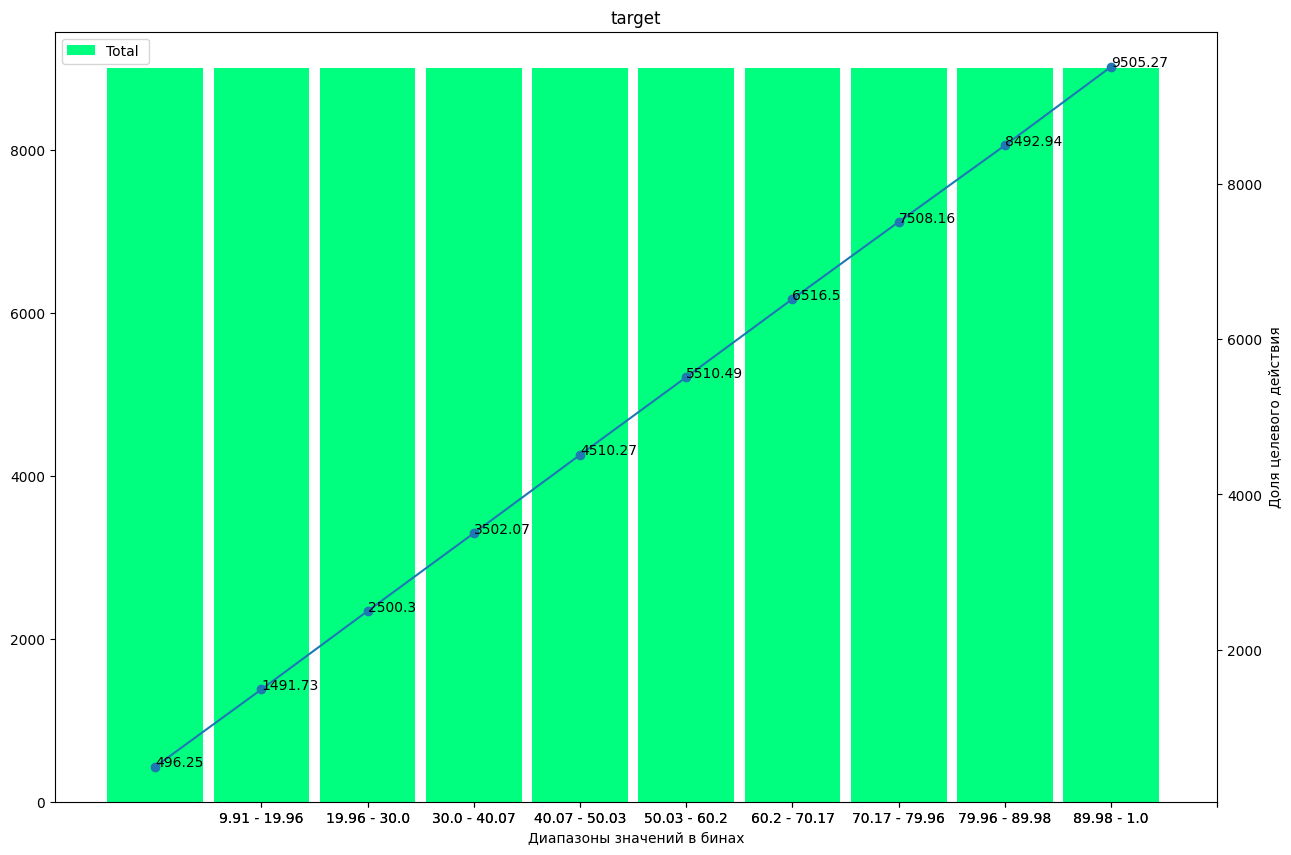

In [53]:
#цикл по всім фічам

for feature_name in df.columns:
    bins_cnt = 10
    (decile, _tmp_df2) = get_feature_stat(df, feature_name, bins_cnt)
    plot_deciles(_tmp_df2)
    plt.title(feature_name)
    plt.show()

1. Simple Linear Regression


In [54]:
from sklearn.linear_model import LinearRegression


In [56]:
X = df.iloc[:,0].values
y = df.iloc[:,1].values

# We are going to keep 20% of the dataset in test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=0)

In [57]:
linear_regressor = LinearRegression()
linear_regressor.fit(np.array(X_train.reshape(-1, 1)), y_train.reshape(-1, 1))

y_predict = linear_regressor.predict(X_test.reshape(-1, 1))

(array([546., 353., 527., 368., 536., 374., 492., 323., 554., 345., 514.,
        365., 557., 368., 540., 365., 551., 369., 592., 337., 475., 341.,
        548., 337., 494., 349., 546., 355., 535., 332., 535., 380., 533.,
        347., 555., 385., 522., 369., 518., 364., 501., 369., 507., 356.,
        535., 326., 537., 353., 554., 345., 513., 367., 515., 370., 554.,
        352., 586., 350., 561., 365., 569., 360., 579., 346., 555., 359.,
        513., 308., 555., 354., 544., 358., 548., 356., 558., 369., 586.,
        352., 535., 340., 524., 337., 553., 345., 554., 362., 527., 365.,
        533., 381., 533., 387., 554., 364., 562., 365., 558., 363., 510.,
        359., 382., 539., 394., 503., 348., 535., 367., 540., 360., 576.,
        354., 574., 371., 535., 373., 553., 378., 517., 351., 567., 332.,
        556., 354., 500., 393., 574., 372., 531., 371., 585., 357., 546.,
        371., 535., 323., 549., 396., 530., 355., 527., 351., 546., 360.,
        502., 356., 537., 360., 533., 

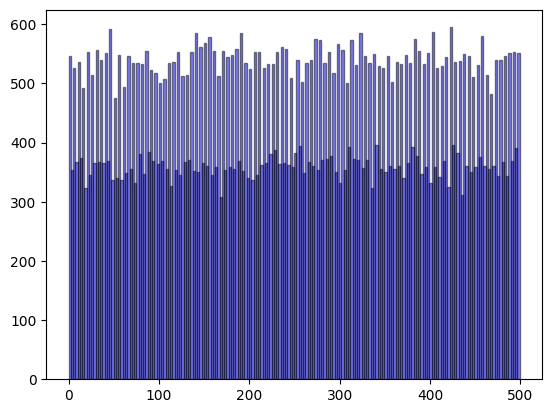

In [63]:
plt.hist(y, bins=200, alpha=0.5, label='y', color='blue', edgecolor='black')